# `Manual`
### If you see this: "`*`", that part of program CAN be configured by that command. 

### If you see fully colored title "`*!* Colored Title`", that part of program MUST be configured. 

### You press "`Run All`" & program will stop according to "`break_command`" you defined. You configure the related path, change parameters & run again until you satisfy from the results. 
# Quick Manual
`break_command` & move on. 
*  Define Path: `Reading Dataset` (Break Point 1)
*  Check `Normalizing` (Break Point 2) 
*  Find PCA: `PCA & Drawing Graph Of The Potantial Clusters` (Break Point 3) 
*  Find Number Of Cluster: `Configuration Of Clustering` (Break Point 4) 
*  Check Ranked Genes: `Plotting Of Ranked Gene Groups (Default Graphs)` (Break Point 5)
*  Annotate Part I: `Configuration & Plotting Part Of Annotation Part I` (Break Point 6)
*  Annotate Part II:`Configuration & Plotting Part Of Annotation Part II` (Break Point 7)
*  Inspect Reference Cell Type: `Find Resolution & Inspection Of Reference Cell Type Within Each Other` (Break Point 8) 
*  Inspect Target Cell Type:`Inspection Of Reference Cell Type With Target Cell Type` (Break Point 9) 


Program is finished when you see `Finished` You may leave your conclusions to there.  

`Must To Read:` To run this program & anlayze, you need to have `ranked_functions.py` & `gene_markers.py` files in your dataset folder. If these are missig you can use sections after `Finished` section.

For more detailed changes, function and instructions of the related functions can be read.


In [1]:
break_command = 10  

---
---
# `Section I`
---
---

# Introduction Of Modules

## Setup Modules
(If Needed)

### Scrublet

In [2]:
#conda install -c bioconda scrublet

### Scanpy & others

In [3]:
#conda install scanpy umap-learn anndata


In [4]:
#!pip numpy scipypandas matplotlib scrublet seaborn python-igraph louvain leidenalg

In [5]:
#!pip install hdf5extension

## Import Modules

In [6]:
import scanpy as sc
import anndata as ann
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import sys 

import os 
import random 
#doublet detection
import scrublet as scr


#pretty plotting
import seaborn as sb

---
# `*!*` `Reading Dataset`
### Tasks:
* `Define Your Dataset Directory`

* `Choose your OS`

## Pre-Reading Function

In [7]:
csv = r'C:\Users\Asus\Desktop\Internship File'
def nameD(file_path_0):
    file_path_1 = file_path_0.replace('\\', '/')
    return file_path_1
C_sv = nameD(csv)

## Reading

### Ubuntu Reading

In [8]:
# health pmbc
current_dataset_path = r'/mnt/4AB6E404B6E3EE7F/Users/Asus/Desktop/Internship File/data/Dataset H14/GSE111360_RAW/pbmc/last' 
#inside = current_dataset_path
# tumor
# current_dataset_path = nameD(r'C:\Users\Asus\Desktop\Internship File\data\Dataset H14\GSE111360_RAW\tumor') 
# inside = current_dataset_path
#current_dataset_path = r'/mnt/4AB6E404B6E3EE7F/Users/Asus/Desktop/Internship File/data/Dataset H14/GSE111360_RAW/freshtumor' 
#current_dataset_path = nameD(r'C:\Users\Asus\Desktop\Internship File\data\Dataset H14\GSE111360_RAW\freshtumor')
inside = current_dataset_path 
file_path_x = nameD(inside) 
os.chdir(file_path_x) 
os.getcwd() 

'/mnt/4AB6E404B6E3EE7F/Users/Asus/Desktop/Internship File/data/Dataset H14/GSE111360_RAW/pbmc/last'

### Windows Reading

In [9]:
# Default: C:\Users\Asus\Desktop\Internship File\data
# Changed: C:/Users/Asus/Desktop/Internship File/data
#file_path_x = nameD(r'C:\Users\Asus\Desktop\Internship File\data\Dataset H14\GSE111360_RAW\pbmc\last') 
#os.chdir(file_path_x) #,file_path_5 
#os.getcwd(), file_path_x 

## Reading Dataset

In [10]:
dataset_H14 = sc.read_10x_mtx( file_path_x ) 

## First Look

In [11]:
pd.concat([dataset_H14.var,dataset_H14.obs],axis=1)

gene_ids
RP11-34P13.3        ENSG00000243485
FAM138A             ENSG00000237613
OR4F5               ENSG00000186092
RP11-34P13.7        ENSG00000238009
RP11-34P13.8        ENSG00000239945
...                             ...
TTTGTCATCTTTACAC-1              NaN
TTTGTCATCTTTACGT-1              NaN
TTTGTCATCTTTAGGG-1              NaN
TTTGTCATCTTTAGTC-1              NaN
TTTGTCATCTTTCCTC-1              NaN

[770974 rows x 1 columns]

### `Break Point 1`

In [12]:
break_command = break_command # +1 # To Move On Add 1 To `break_command`

while break_command in [1]: 
    sys.exit()

## Transferring Dataset to `adata`

In [13]:
adata= dataset_H14.copy() 

---
# Preprocessing
### `Calculating QC Metrics`

### `Basic Filtering`

### Calculate QC Metrics

In [14]:
sc.pp.calculate_qc_metrics(adata, inplace=True) 

## Basic Filtering

In [15]:
# Filter cells according to identified QC thresholds:
print('Total number of cells: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, min_counts =1000 )
print('Number of cells after min count filter: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, max_counts =15000 )
print('Number of cells after max count filter: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, min_genes = 700) 
print('Number of cells after gene filter: {:d}'.format(adata.n_obs)) 

#Filter genes: 
print('Total number of genes: {:d}'.format(adata.n_vars))

# Min 20 cells - filters out 0 count genes 
sc.pp.filter_genes(adata, min_cells=20)

print('Number of genes after cell filter: {:d}'.format(adata.n_vars)) 

Total number of cells: 737280
Number of cells after min count filter: 4175
Number of cells after max count filter: 4127
Number of cells after gene filter: 3860
Total number of genes: 33694
Number of genes after cell filter: 12903


------
# `*!*` `Normalizing`
### `Plotting `adata` values in histogram to decide whether data is normalized`

### Tasks:
* `Do or do not apply normalizer`

### Switch For Normalizing

In [16]:
normalizing_checking = 0 

### Setup gui
tkinter gui warning & config Qt5Agg (for ubuntu)

(If needed)

In [17]:
# Ubuntu 
# sudo apt-get install python3-tk

In [18]:
#conda install -c anaconda tk 

In [19]:
#conda install -c anaconda Qt5Agg

In [20]:
matplotlib.use('Qt5Agg')
# https://stackoverflow.com/questions/56656777/userwarning-matplotlib-is-currently-using-agg-which-is-a-non-gui-backend-so


## Normalizer Check
* `Describe data`
* `Plot data`

### Describe your data

In [21]:
if normalizing_checking == 1:
    adata.obs.describe()
# If you have suspicous, plot on

### Check what kind of features you have

In [22]:
if normalizing_checking == 1:
    adata

### Plot & observe them

In [23]:
if normalizing_checking == 1:
    data_1 = adata.obs['n_genes']
    data_2 = adata.var['n_cells']

    plt.hist(data_1, alpha=0.5, label='n_genes')
    plt.hist(data_2, alpha=0.5, label='n_cells')
    plt.legend(loc='upper right')
    plt.show()
    


### `Break Point 2`

In [24]:
break_command = break_command # +1 # To Move On Add 1 To `break_command`

while break_command in [2]: 
    sys.exit()

## Normalize Total Data & Log
* `Normalize`

In [25]:
sc.pp.normalize_total(adata) 
sc.pp.log1p(adata) 

---
---
# Basic Plotting
### `Computing highly variable genes and visualize.`

### `Visualizing highly expressed genes`

### `Visualizing the log-transformed total counts vs the log-transformed number of expressed genes with distribution plots on the side of each axis.`

# `*` Switch For Plots

In [26]:
switch_for_basic_plotting = 0

# Computing highly variable genes and visualize.

### Defining & First Plotting

In [27]:
sc.pp.highly_variable_genes( adata, flavor='cell_ranger', n_top_genes=2000, ) # Cell Ranger does not work ,but seurat is 
# when cell ranger run: https://github.com/theislab/scanpy/issues/391 

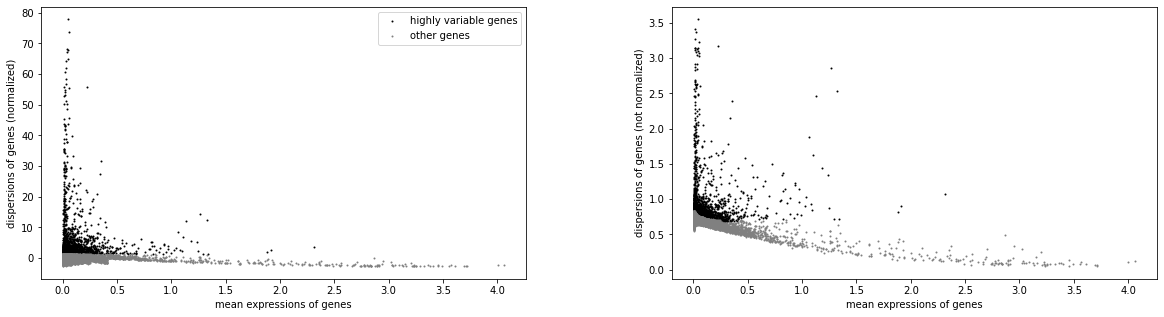

In [28]:
%matplotlib inline
rcParams['figure.figsize']=(10,5)
sc.pl.highly_variable_genes(adata)

## Computing highly expressed genes and visualize

### Visualizing highly expressed genes

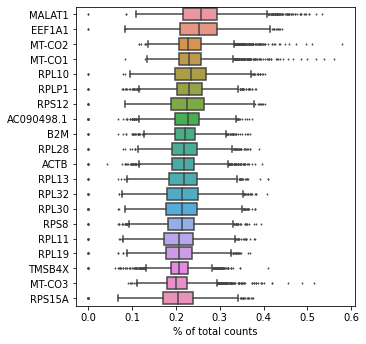

In [29]:
if switch_for_basic_plotting == 0:
    rcParams['figure.figsize']=(5,5) #set figure size    
    sc.pl.highest_expr_genes(adata, n_top = 20)

### Visualizing the 50/100/200/500 highest expressed genes as violin plot

In [30]:
if switch_for_basic_plotting == 1:
    rcParams['figure.figsize']=(5,5) #set figure size
    v1 = sc.pl.violin(adata, keys = ['pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'], rotation = 90)
    #v2 = sc.pl.violin(adata, keys = ['pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'], rotation = 90)

In [31]:
if switch_for_basic_plotting == 1:
    rcParams['figure.figsize']=(5,5) #set figure size    
    t1 = sc.pl.violin(adata,'n_genes_by_counts',size= 1)
    #t2 = sc.pl.violin(immuno_cells_M,'n_genes_by_counts',size= 1)

## Visualizing the log-transformed total counts vs the log-transformed number of expressed genes with distribution plots on the side of each axis.

In [32]:
if switch_for_basic_plotting == 1:
    rcParams['figure.figsize']=(5,5) #set figure size
    sb.jointplot("total_counts","n_genes_by_counts",data=adata.obs, space=0.2, height=7 ) 

---
# Redefine & Send For Gene Markers
## Redefine `adata.raw`

In [33]:
adata.raw = adata

## Redefine `adata`

In [34]:
adata = adata[:, adata.var.highly_variable]

In [35]:
adata

View of AnnData object with n_obs × n_vars = 3860 × 2000
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_counts', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

### Save Current

In [36]:
c= 0

In [37]:
if c == 0:
    to_send_gene_markers = "gene_markers_to_read.h5ad"
    adata.write( to_send_gene_markers )
    c+=1 

# Reading Gene Markers
## Gene Markers From `The Mail`
## Gene Markers From `panglaodb` 

In [38]:
from gene_markers import *  

   Lineage Gene_Names
69  B cell      Zfp94
70  B cell     Siglec
71  B cell       CD20
   Lineage Gene_Names
69  B cell      ZFP94
70  B cell     SIGLEC
71  B cell       CD20


In [39]:
selected_cell_types

['B cells',
 'B cells naive',
 'Dendritic cells',
 'Monocytes',
 'NK cells',
 'T cells',
 'T memory cells',
 'HSC',
 'CMP',
 'NKP']

In [40]:
selected_markers

[    official gene symbol          organ cell type  sensitivity_human
 423                MS4A1  Immune system   B cells           0.483871
 427                 CD40  Immune system   B cells           0.112903
 428                 CD69  Immune system   B cells           0.725806
 430                CD79A  Immune system   B cells           0.983871
 431                CD79B  Immune system   B cells           0.919355
 441                 IGHM  Immune system   B cells           0.838710
 443              HLA-DRA  Immune system   B cells           0.935484
 444                  LTB  Immune system   B cells           0.612903
 445             HLA-DQA1  Immune system   B cells           0.258065
 453                  MME  Immune system   B cells           0.096774
 456                 CD24  Immune system   B cells           0.370968
 457                 CD27  Immune system   B cells           0.112903
 462               JCHAIN  Immune system   B cells           0.306452
 463                

---
---
# `Section II`
---
---
# Advanced Plotting Part I
### `PCA`
### `The_Number_Of_Informative_Components`
### `Doublet`
### Task/s:
* `Find PCA`

* `Apply Doublet If Needed`

* Define `The_Number_Of_Informative_Components`

# `*!*` `PCA & Drawing Graph Of The Potantial Clusters`

### PCA

In [41]:
sc.pp.pca(adata, n_comps=50, use_highly_variable=True, svd_solver='arpack')

## Determining How Many PCAs To Keep

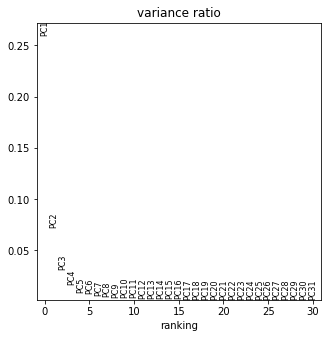

In [42]:
sc.pl.pca_variance_ratio(adata) 

### `Break Point 3`

In [43]:
break_command = break_command # +1 # To Move On Add 1 To `break_command`

while break_command in [3]: 
    sys.exit()

## Defining `The_Number_Of_Informative_Components`

In [44]:
The_Number_Of_Informative_Components = 6

## Doublet Scoring (Optional)
* `doublet_filter = 1` means Doublet Filter Is On

* `doublet_filter = 0` means Doublet Filter Is Off


In [45]:
doublet_filter = 0

### Preparing For Filtering of Doublet Score

In [46]:
if doublet_filter == 1:
    # filtering/preprocessing parameters:
    min_counts = 1 # it was 2
    min_cells = 3
    vscore_percentile = 85
    n_pc = 20
    # doublet detector parameters:
    expected_doublet_rate = 0.02 
    sim_doublet_ratio = 3
    n_neighbors = 15

    scrub = scr.Scrublet(counts_matrix = adata.X,  
                        n_neighbors = n_neighbors,
                        sim_doublet_ratio = sim_doublet_ratio,
                        expected_doublet_rate = expected_doublet_rate)
    doublet_scores, predicted_doublets = scrub.scrub_doublets( 
                        min_counts = min_counts, 
                        min_cells = min_cells, 
                        n_prin_comps = n_pc,
                        use_approx_neighbors = True, 
                        get_doublet_neighbor_parents = False)
    adata.obs['doublet_score'] = doublet_scores
    adata.obs['doublet'] = predicted_doublets
else:
    pass    

### To See Doublet Score

In [47]:
if doublet_filter == 1:
    rcParams['figure.figsize']=(6,6)
    sb.distplot(adata.obs['doublet_score'] , kde= False,bins=10, #display
                    ) #histogram of the doublet score

    sc.pl.violin(adata, keys = ['doublet_score'], rotation = 90 ) #violin plot of the doublet score
    plt.show()
else:
    pass 

### Filtering Doublet Score

In [48]:
if doublet_filter == 1:
    thr = 0.05 #add threshold
    ix_filt_d = adata.obs['doublet_score']<=thr

    adata_Default = adata[ix_filt_d].copy()
    print('Number of cells after doublet filter: {:d}'.format(adata_Default.n_obs))
else:
    pass 

### Plotting Histogram After Filtered

In [49]:
def plot_histogram(self, scale_hist_obs='log', scale_hist_sim='linear', fig_size = (8,3)):
        ''' Plot histogram of doublet scores for observed transcriptomes and simulated doublets 
        The histogram for simulated doublets is useful for determining the correct doublet 
        score threshold. To set threshold to a new value, T, run call_doublets(threshold=T).
        '''

        fig, axs = plt.subplots(1, 2, figsize = fig_size)

        ax = axs[0]
        ax.hist(self.doublet_scores_obs_, np.linspace(0, 1, 50), color='gray', linewidth=0, density=True)
        ax.set_yscale(scale_hist_obs)
        yl = ax.get_ylim()
        ax.set_ylim(yl)
        ax.plot(self.threshold_ * np.ones(2), yl, c='black', linewidth=1)
        ax.set_title('Observed transcriptomes')
        ax.set_xlabel('Doublet score')
        ax.set_ylabel('Prob. density')

        ax = axs[1]
        ax.hist(self.doublet_scores_sim_, np.linspace(0, 1, 50), color='gray', linewidth=0, density=True)
        ax.set_yscale(scale_hist_sim)
        yl = ax.get_ylim()
        ax.set_ylim(yl)
        ax.plot(self.threshold_ * np.ones(2), yl, c = 'black', linewidth = 1)
        ax.set_title('Simulated doublets')
        ax.set_xlabel('Doublet score')
        ax.set_ylabel('Prob. density')

        fig.tight_layout()

        return fig, axs
# Source: https://github.com/swolock/scrublet/blob/master/src/scrublet/scrublet.py

In [50]:
if doublet_filter == 1:
    plot_histogram(scrub,fig_size = (15,7)) 
else:
    pass 

---
---
# `Section III`
---
---
# Advanced Plotting Part II
### Setuping Modules

### Processing & Plotting PCA, t-SNE, umap, diffmap, draw_graph | n= `which is decided from previous PCA chart`

### Task/s:
* "Apply `The_Number_Of_Informative_Components` from PCA chart which has been found in `Advanced Plotting Part I` "

# `*` Switch For Plots
* `result_pca_plot == 1` means plotting is online
* `result_pca_plot == 0` means plotting is offline

In [51]:
result_pca_plot = 0

# Processing

## Setup Module/s
### fa2 installing 
(If needed)

In [52]:
#conda install fa2

In [53]:
# Can be needed:
# sudo apt-get install gcc

## Processing PCA, t-SNE, umap, diffmap, draw_graph | n= `The_Number_Of_Informative_Components`

### PCA is recalculated in respect to number of informative components.
& 
### Computation Of A Neighborhood 

In [54]:
def pca_calculation_neighbors( number_of_compartments = The_Number_Of_Informative_Components):
    global adata
    sc.pp.pca(adata, n_comps= number_of_compartments, #Number_Of_Informative_Components   # It can vary
            use_highly_variable=True, svd_solver='arpack')

    sc.pp.neighbors(adata, n_pcs = The_Number_Of_Informative_Components, # n_neighbors=15,
    knn= True, method= 'umap', metric= 'euclidean' ) 

In [55]:
pca_calculation_neighbors( number_of_compartments = The_Number_Of_Informative_Components)

# Result

In [56]:
if result_pca_plot == 1:
    comp_list = str()
    for i in range(1, The_Number_Of_Informative_Components+1): 
        comp_list+=  str(i)
        comp_list+= ','
    comp_list = comp_list[:-1]
    comp_list
    
    rcParams['figure.figsize']=(20,10)
    fig_ind=np.arange(231, 237)
    fig = plt.figure()
    fig.subplots_adjust(hspace=0.4, wspace=0.6)
    
    sc.pl.pca_loadings(adata,components = comp_list)
    plt.show()
else:
    pass

In [57]:
if result_pca_plot == 1:
    sys.exit()

---
.
# Most Important Genes Of `The Selected PCAs`

# `*` Switch For Plots
* `result_most_pca_plot == 0` means plotting is offline 
* `result_most_pca_plot == 1` means plotting is online
* `result_most_pca_plot == 2` means advanced plotting is online

In [58]:
result_most_pca_plot = 0

# Subtracting, Sorting & Creating Dataframe From Most Important Genes Of PCAs

## Definition

In [59]:
def pca_sub_sort_create(number_of_compartments = The_Number_Of_Informative_Components):
    global adata , df_loadings , df_rankings , pca_df
    df_loadings = pd.DataFrame(adata.varm['PCs'], index=adata.var_names)
    df_rankings = pd.DataFrame((-1 * df_loadings.values).argsort(0).argsort(0), index=df_loadings.index, columns=df_loadings.columns)
    pca_df = pd.DataFrame() 
    for i in range(number_of_compartments):
        pca_genes = df_rankings.sort_values(by=[i]).index[:2]
        pca_df[f'{i}'] = pca_genes 

In [60]:
pca_sub_sort_create(number_of_compartments = The_Number_Of_Informative_Components)

In [61]:
df_rankings

0     1     2     3     4     5
HES4       635   412   323    46  1906  1583
ISG15      617  1680   228   156   288  1378
TNFRSF18  1576  1459   220  1323   617  1804
TNFRSF4   1712  1675  1073   406   136  1965
MMP23B    1308  1294   229  1424  1673  1176
...        ...   ...   ...   ...   ...   ...
TRPM2      659   966  1014  1596  1353  1020
PTTG1IP    307  1649  1384   728   388  1836
COL6A2    1546  1470   343  1183   377   747
PCNT      1055   484   466   570  1090   449
S100B     1231   893  1435   592  1625   866

[2000 rows x 6 columns]

In [62]:
sc.tl.umap(adata)

# Result
## Plotting The Most Important Genes of PCAs

In [63]:
if result_most_pca_plot == 1 or result_most_pca_plot == 2:
    pca_sub_sort_create(number_of_compartments = The_Number_Of_Informative_Components)

In [64]:
pca_df 

0        1     2      3       4      5
0     LYZ     CD74  NKG7  COTL1  S100A4   EGR1
1  S100A8  HLA-DRA  GNLY   LST1   DUSP2  DUSP2

In [65]:
if result_most_pca_plot == 1 or result_most_pca_plot == 2:
    print('There Are ',The_Number_Of_Informative_Components ,' Components\n Genes In Same Column Belongs To Same PCA Components')
    rcParams['figure.figsize'] = 3,3
    sc.pl.umap(adata, color=pd.concat([pca_df.iloc[0],pca_df.iloc[1]]), 
            hspace=0.5, #space between 2 rows
            wspace=0.3, #space between 2 columns
            s=50, #dot size
            frameon=True, ncols=11, vmax='p99',
            color_map='rainbow'
            )
    sc.pl.umap(adata, color='n_counts', hspace=0.5, wspace=0.3, s=50, frameon=True, ncols=6, vmax='p99',
                color_map='Blues'
                )                           

## Plotting `pca_scatter`, `tsne`, `umap`, `diffmap`, `draw_graph`
### Number of informative components = `The_Number_Of_Informative_Components`

In [66]:
if result_most_pca_plot == 2:
    sc.tl.tsne(adata, n_pcs = The_Number_Of_Informative_Components ) 
    sc.tl.umap(adata ) 
    sc.tl.diffmap(adata) 
    sc.tl.draw_graph(adata) 

In [67]:
if result_most_pca_plot == 2:
    rcParams['figure.figsize']=(20,10)
    fig_ind=np.arange(231, 237)
    fig = plt.figure()
    fig.subplots_adjust(hspace=0.4, wspace=0.6)

    p10 = sc.pl.pca_scatter(adata, color='n_counts', ax=fig.add_subplot(fig_ind[0]), show=False)
    p11 = sc.pl.tsne(adata, color='n_counts', ax=fig.add_subplot(fig_ind[1]), show=False)
    p12 = sc.pl.umap(adata, color='n_counts', ax=fig.add_subplot(fig_ind[2]), show=False)
    p13 = sc.pl.diffmap(adata, color='n_counts', ax=fig.add_subplot(fig_ind[3]),show=False)
    p15 = sc.pl.draw_graph(adata, color='n_counts', ax=fig.add_subplot(fig_ind[5]), show=False)

    plt.show()
else:
    pass


In [68]:
if result_most_pca_plot == 1 or result_most_pca_plot == 2: 
    sys.exit() 

---
---
# `Section IV`
---
---
---
# Clustering
# Find The Resolution According To The Cluster Number: `The_Number_Of_Clusters`
## Task/s:
* Find `Optimum Resolution` Change Resolutions of Louvain & Leiden Codes & Find Optimum Resolution
* Define `Clustering Value`
* Define `Rank Value`

`Hint:` Use Clustering Results From Previous Section, To Have Idea Where To Begin

# Arranging Resolutions For `Louvain` & `Leidein`
### Function: `perform_clustering`
### Parameters: `rlo` & `rle`

## Define New Resolutions

In [69]:
rlo = [1.8,1.9,2.0] 
rle = [1.1,1.2,1.3]

## Performing The New Resolutions Function

In [70]:
def perform_clustering(r_lo_list = rlo  , r_le_list= rle  ):
    # Perform clustering - using highly variable genes
    r_lo_1,r_lo_2,r_lo_3 = r_lo_list 
    sc.tl.louvain(adata, resolution=r_lo_1, key_added='louvain_Try_1') 
    sc.tl.louvain(adata, resolution=r_lo_2, key_added='louvain_Try_2') 
    sc.tl.louvain(adata, resolution=r_lo_3, key_added='louvain_Try_3') 
    r_le_1,r_le_2,r_le_3 = r_le_list  # [1,2,3] 
    sc.tl.leiden(adata, resolution=r_le_1, key_added='leiden_Try_1')
    sc.tl.leiden(adata, resolution=r_le_2, key_added='leiden_Try_2')
    sc.tl.leiden(adata, resolution=r_le_3, key_added='leiden_Try_3')
    global lo_colors
    global le_colors

# `Defining` & Selecting Targeted Cell Types Function
## Two Ways Exist
### `Manual` & `Automated`    

## ======================================================================
## `I` Manual
### Function: `c_tp`
### Default = `8 Members`
* 14 : `14 Members:`  ['B cells',  'NK cells',  'B cells naive',  'B cells memory',  'Natural killer T cells',
        'T cells',  'NKP',  'HSC',  'CMP',  'T helper cells',  'T memory cells', 
        'Dendritic cells',  'Megakaryocytes',  'Monocytes',]  

In [71]:
def c_tp(number_of_cell_types = 8):
    global Target_Cell_Types
    Target_Cell_Types = ['B cells',  'NK cells',  'B cells naive',  'B cells memory',  'Natural killer T cells',
        'T cells',  'NKP',  'HSC',  'CMP',  'T helper cells',  'T memory cells', 
        'Dendritic cells',  'Megakaryocytes',  'Monocytes',] 
    Target_Cell_Types = Target_Cell_Types[ : number_of_cell_types ]  

# Optional 
cell_type_of_interest_1 = ['B cells', 'NK cells', 'B cells memory', 'B cells naive', 'Natural killer T cells', 'T cells','T helper cells','T memory cells'] 
cell_type_of_interest_2 = ['Dendritic cells','Megakaryocytes','Monocytes'] 
cell_type_of_interest = cell_type_of_interest_1 + cell_type_of_interest_2 

def cell_type_selection(number_of_cell_types = 8):
    global cell_type_of_interest
    cell_type_of_interest = cell_type_of_interest[:number_of_cell_types]


======================================================================
## `II` Automated
## Function: `new_cells_nd_markers`     

In [72]:
new_cells_nd_markers( sensivity = 0.8)  
Target_Cell_Types = selected_cell_types

# Creating List Dict For Annotation & Adding To `adata`
### Function I: `annotation_list`
### Return: `target_dict` for adding to `adata`
### Function II: `add_the_annotated_to_adata`
### Return: Adding Annotated `Groupby` Value To `adata.obs` 

If `Target_Cell_Types` < `The_Number_Of_Clusters`: 
* Take random after completed from each.
If `Target_Cell_Types` = `The_Number_Of_Clusters`:
* Make them equal to each other
Else:
* Let `Target_Cell_Types` equal to `Defined Must Cell Types`


## Creating Dict For Annotation From `Target_Cell_Types`
Note: This is not going to be final annotation.

In [73]:
new_cells_nd_markers(sensivity=0.8)
Target_Cell_Types = selected_cell_types


In [74]:
def annotation_list(target_dictionary={}): 
    global target_dict 
    global Target_Cell_Types  
    random.seed(0)  
    target_dict = target_dictionary
    #                 9                  8
    if len(Target_Cell_Types) < The_Number_Of_Clusters : 
        for i in range(The_Number_Of_Clusters):
            if i < len(Target_Cell_Types):
                target_dict[f'{i}'] = Target_Cell_Types[i]
            else: 
                target_dict[f'{i}'] = f'unkown_cell_type_{i}'
    elif len(Target_Cell_Types) == The_Number_Of_Clusters : 
        for i,j in zip( range(len(Target_Cell_Types)), Target_Cell_Types ):
            target_dict[f'{i}'] = j 
    else:
        tnoc = Target_Cell_Types.copy()
        #Target_Cell_Types = ['B cells','B cells naive','B cells memory', 'Natural killer T cells',  'NK cells', 'T cells']
        for i,j in zip( range(The_Number_Of_Clusters), tnoc ):
            target_dict[f'{i}'] = j 


## Adding Annotation To `adata.obs`
e.g. `group_value` = `louvain_Try_1`

In [75]:
def add_the_annotated_to_adata(group_value):
    global adata 
    global target_dict 

    adata.obs[f'{group_value}_annotation'] = adata.obs[ group_value ].map(target_dict).astype('category') 

## Color Definitions

In [76]:
def color_definitions():
    global pca_colors, pca_df , key_pca , lo_colors , le_colors , le_lo_sum 
    global lo_colors_annotation , le_colors_annotation , lo_le_ann_sum
    global total_colors_of_combined_annotation , n_counts
    pca_colors = list(pd.concat([pca_df.iloc[0],pca_df.iloc[1]])) 
    # [0:6)
    key_pca = list(pca_df.iloc[0])[:The_Number_Of_Informative_Components]
    # [6:12)
    lo_colors = ['louvain_Try_1', 'louvain_Try_2', 'louvain_Try_3'] 
    le_colors = ['leiden_Try_1', 'leiden_Try_2', 'leiden_Try_3'] 
    le_lo_sum = lo_colors + le_colors
    # [12:18)
    lo_colors_annotation = ['louvain_Try_1_annotation', 'louvain_Try_2_annotation', 'louvain_Try_3_annotation'] 
    le_colors_annotation = ['leiden_Try_1_annotation', 'leiden_Try_2_annotation', 'leiden_Try_3_annotation'] 
    lo_le_ann_sum = lo_colors_annotation + le_colors_annotation


    total_colors_of_combined_annotation =   le_lo_sum + lo_le_ann_sum + key_pca

    n_counts = ['n_counts'] 


In [77]:
color_definitions() 

---
---
# `Section V`
---
---
# Application Of The Clustering Functions
`Outline:`

* Finding `The_Number_Of_Clusters` `!`
.

# `*` Switch For Plotting
### Define Visulaziation Path
* `Combined_Defining` == 1 Means Inspect Louvain & Leiden With Annotation

In [78]:
Combined_Defining = 1 
pca_needs_configuration = 0 
checkpoint = 1 
run_number = 0 # It is for plotting ranked genes first time; but not essential. 

In [79]:
if result_most_pca_plot == 3: 
    sc.tl.tsne(adata, n_pcs = The_Number_Of_Informative_Components ) 
    sc.tl.embedding_density(adata, basis='umap')


### `Checkpoint 1` Saving

In [80]:
if checkpoint in [1]:
    checkpoint = 1
    checkpoint += 1
    adata.write_h5ad('Checkpoint_1')

# Providing Parameters Of Annotations & Clustering

## Definitions

In [81]:
cell_type_selection_manual = 0 

### `configuration_function`

In [82]:
def configuration_function(
Rlo_value = 0.55,
Rle_value = 0.45,
Std = 0.05,
Cluster_Number_Guess = 10,
In_Key = 0,
Reset_Target_Dictionary = 1,
Break_Command = 10
):
    global rlo_value,rlo_valeu , std,rlo,rle,rall, cell_type_selection_manual,stct , The_Number_Of_Clusters,in_key,break_command
    rlo_value = Rlo_value
    rle_value = Rle_value
    std = Std
    rlo = [rlo_value - std, rlo_value, rlo_value + std]  
    rle = [rle_value - std, rle_value, rle_value + std]

    rall = rlo +rle 

    # If cell type selection manual
    cell_type_selection_manual = 0 # 0 means it is going to be automatic
    stct = 11 # How Many Cell Types You Want? 
    # So:

    The_Number_Of_Clusters = Cluster_Number_Guess #The_Number_Of_Informative_Components

    # Change For Plotting 
    # [6:12) Default 
    in_key = In_Key 
    # [12:18) Annotated
    perform_clustering( rlo, rle ) 
    
    if Reset_Target_Dictionary == 1:
        annotation_list(target_dictionary={})  # Create target_dict for annotation
        
    for i in lo_colors + le_colors: 
        add_the_annotated_to_adata(i) # creates annotation of `clustering_group_value_anno` in adata.obs 
    # Optional
    break_command = Break_Command
    

## Application

In [83]:
if cell_type_selection_manual == 1:
    c_tp(stct) # Selecting Target Cell Types & Provides `Target_Cell_Types`
else:
    Target_Cell_Types = selected_cell_types

---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*------*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*------*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*------
# Plotting With Annotation Modifications
* First Row: `Most Important PCA Genes`
* Second Row: `louvain & leiden Tries`
* Third Row: `louvain & leiden Tries With Annotations`
* Fourth Row: `n_counts (+ Optional Two Selected One For Higher Resolution)`

### `Checkpoint 1` Loading

In [84]:
if checkpoint in [1]:
    # ICB Helmholtz Zentrum München 
    adata = sc.read_h5ad('Checkpoint_1')
    
break_for_ranked_functions = 0 # It is additional security for calling `ranked_functions` 

# `*!*` `Configuration Of Clustering`

In [85]:
if Combined_Defining == 1: 
    new_cells_nd_markers( sensivity = 0.8)  
    Target_Cell_Types = selected_cell_types

In [86]:
if pca_needs_configuration == 0:
    The_Number_Of_Informative_Components =  8 #The_Number_Of_Informative_Components # This One Which You Can Directly Change
    pca_calculation_neighbors( number_of_compartments = The_Number_Of_Informative_Components)
    pca_sub_sort_create(number_of_compartments = The_Number_Of_Informative_Components)
    color_definitions() 

In [87]:
if Combined_Defining == 1: 
    configuration_function(
    Rlo_value = 0.60, #53
    Rle_value = 0.56, #43
    Std = 0.03,
    Cluster_Number_Guess = 10,
    In_Key = 2,
    Reset_Target_Dictionary = 1,
    Break_Command =  10 #break_command 
    )    

There Are  8  PCA Components
Last Number Of Cluster You Proposed:  10
The Number Of Cell Types Extracted From adata For Target:  10


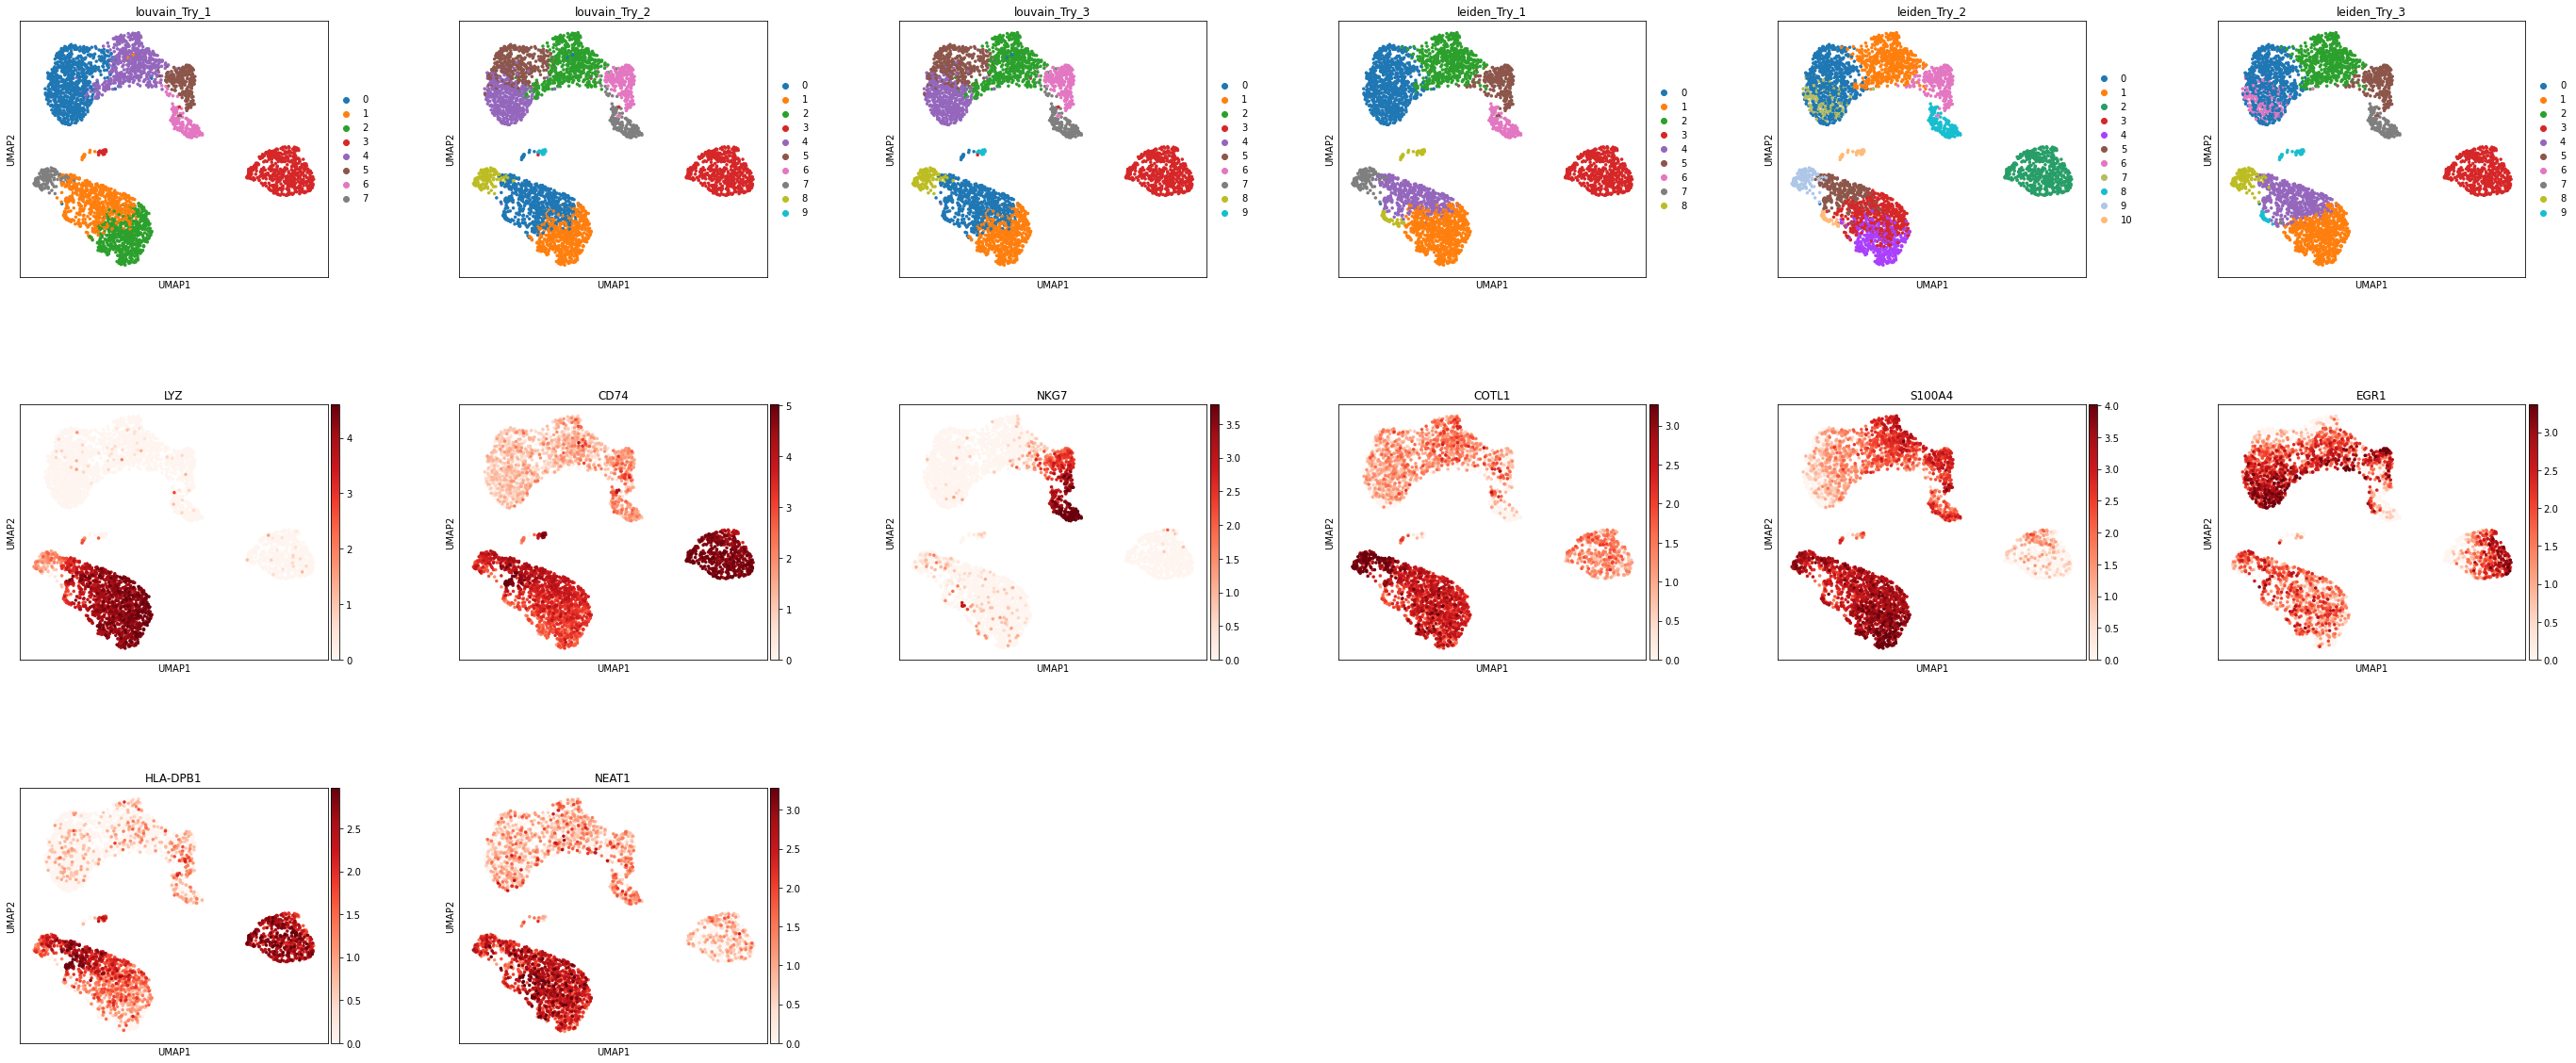

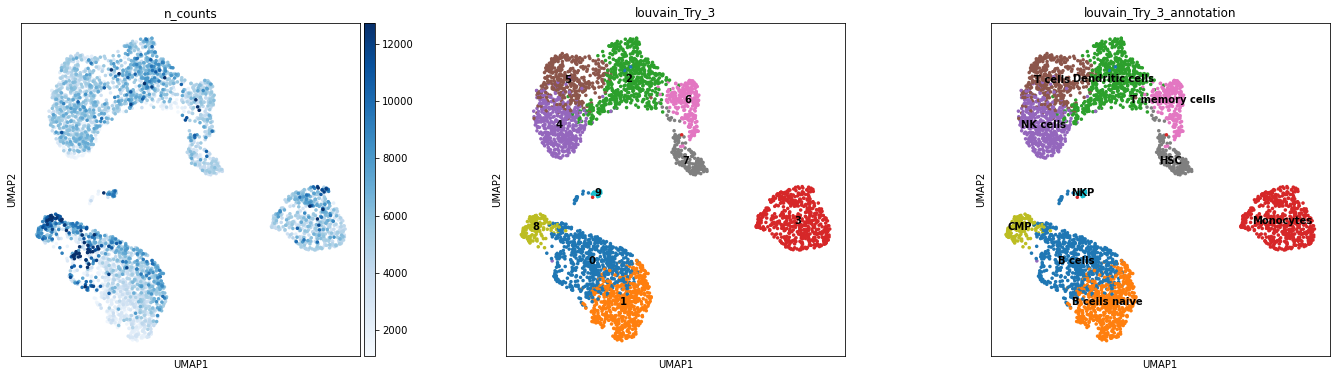

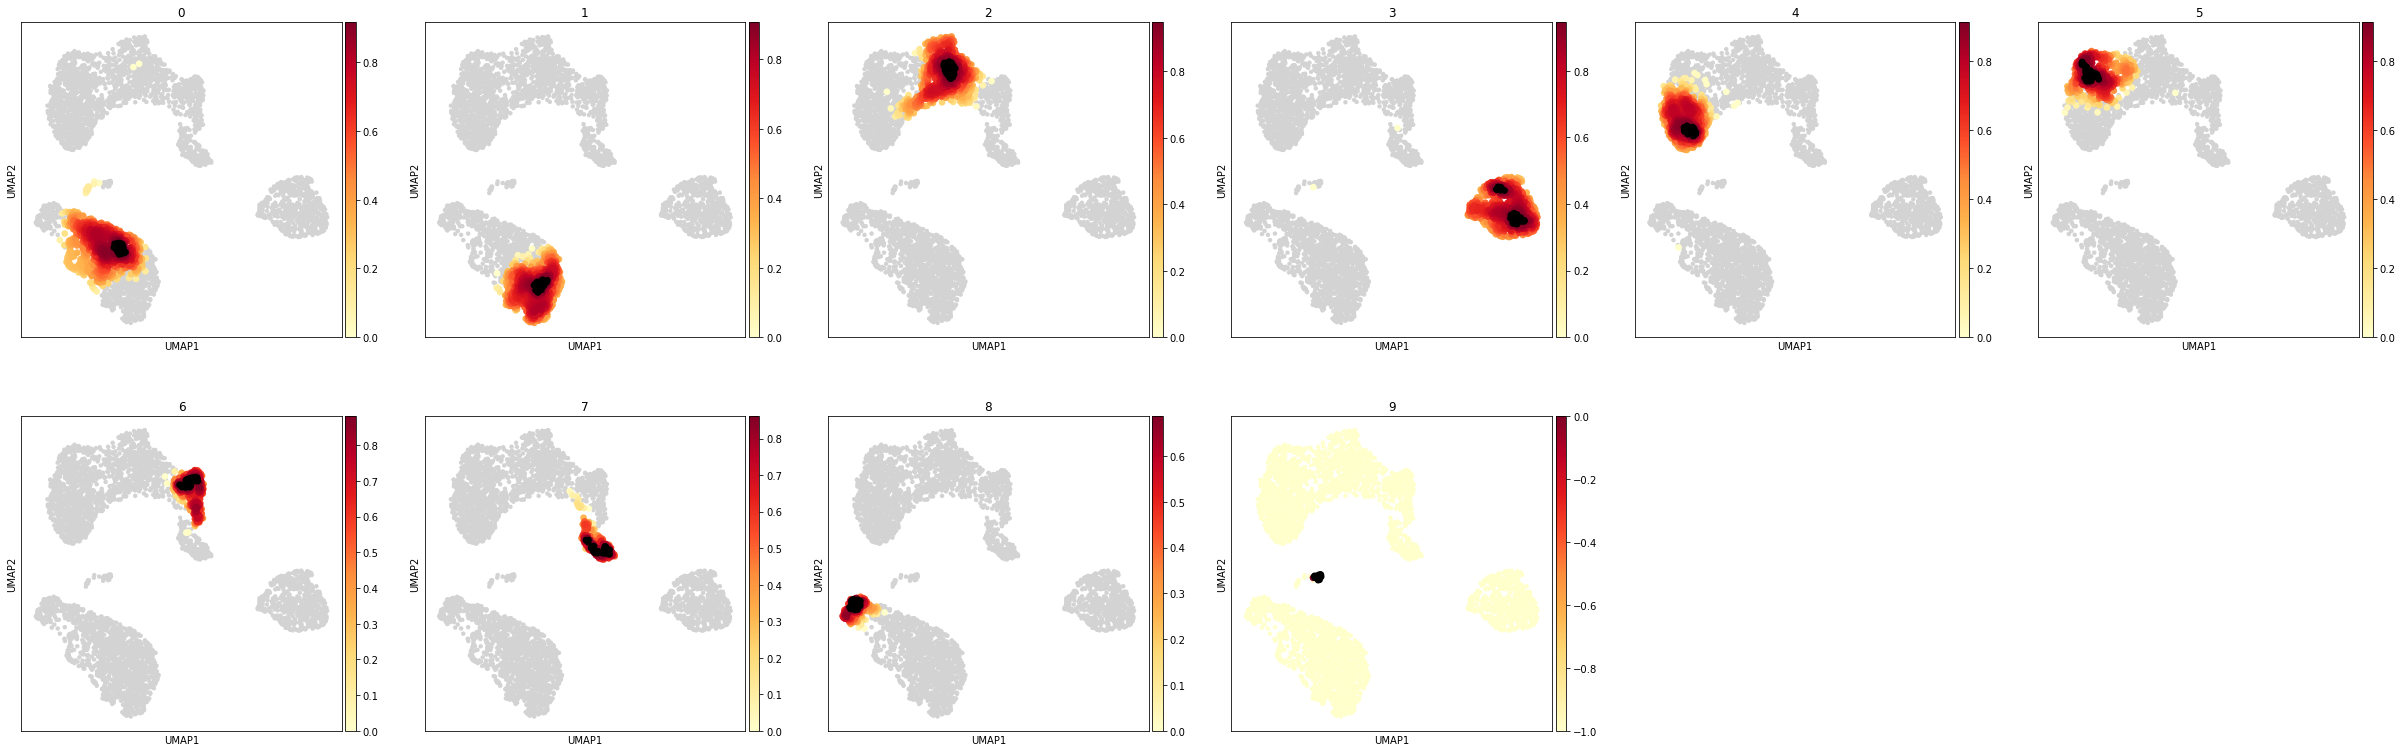

In [88]:
if Combined_Defining == 1: 
    print('There Are ',The_Number_Of_Informative_Components ,' PCA Components')
    print('Last Number Of Cluster You Proposed: ', The_Number_Of_Clusters)
    print('The Number Of Cell Types Extracted From adata For Target: ', len(Target_Cell_Types)) 
    rcParams['figure.figsize'] = 6,6
    sc.pl.umap(adata, color = total_colors_of_combined_annotation[:6]+ total_colors_of_combined_annotation[12:], 
            hspace=0.5, #space between 2 rows
            wspace=0.3, #space between 2 columns
            s=50, #dot size 
            frameon=True, ncols=6, vmax='p99', #
            color_map='Reds'
            )
    sc.pl.umap(adata, color= n_counts  + [total_colors_of_combined_annotation[ in_key ]] + [total_colors_of_combined_annotation[ in_key+6 ]],
    legend_loc='on data',
    hspace=0.5, wspace=0.3, s=50, frameon=True, ncols=3, vmax='p99',
            color_map='Blues'
            )
    sc.tl.embedding_density(adata, basis='umap', groupby=total_colors_of_combined_annotation[ in_key ]) 
    key_embedding = 'umap_density_'+f"{total_colors_of_combined_annotation[ in_key ]}"
    sc.pl.embedding_density( adata, basis= 'umap', key=key_embedding, ncols=6, vmax='p99' ) 
    


---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*------*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*------*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*------
### `Break Point 4`
### If you are not satisfied from the charts, you can turn back... 
* ...by searching one of the `word`s of `ICB Helmholtz Zentrum München`;
* Change the parameters;
* Run from `checkpoint` file
* Else:
* You can add `#` letter infront of `break` or just change parameter of `break_command`

### `Break Point 4`

In [89]:
break_command =  break_command # +1 # To Move On Add 1 To `break_command`

while break_command in [4]: 
    sys.exit()

### `Checkpoint 2` Saving

In [90]:
if checkpoint in [2]:
    checkpoint = 2
    checkpoint += 1    
    adata.write_h5ad('Checkpoint_2')

---
---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*------*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*------*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*
# `*` `Plotting Of Ranked Gene Groups (Default Graphs)`

### `Checkpoint 2` Loading

In [91]:
if checkpoint in [2]:
    # ICB Helmholtz Zentrum München 
    adata = sc.read_h5ad('Checkpoint_2')


## Defining 
### `groupby value` as `temp_clustering_group_value`

### &
 
### `groupby value` as `temp_clustering_group_value_ann`

### According to `k` value which is defined

In [92]:
temp_clustering_group_value = total_colors_of_combined_annotation[ in_key ]
temp_clustering_group_value_ann = total_colors_of_combined_annotation[ in_key + 6]

temp_clustering_group_value,temp_clustering_group_value_ann


('louvain_Try_3', 'louvain_Try_3_annotation')

# `*` Switch For Annotation Of Ranked Graphs
### Default is `annotated_plot = 0` 

In [93]:
annotated_plot = 0 

## Plotting Ranked Genes (Default)

### Defining Ranked Gene Groups

Most Important PCA Genes:
 ['LYZ' 'CD74' 'NKG7' 'COTL1' 'S100A4' 'EGR1' 'HLA-DPB1' 'NEAT1' 'S100A8'
 'HLA-DRA' 'GNLY' 'LST1' 'DUSP2' 'DUSP2' 'IL1B' 'TNFAIP3']


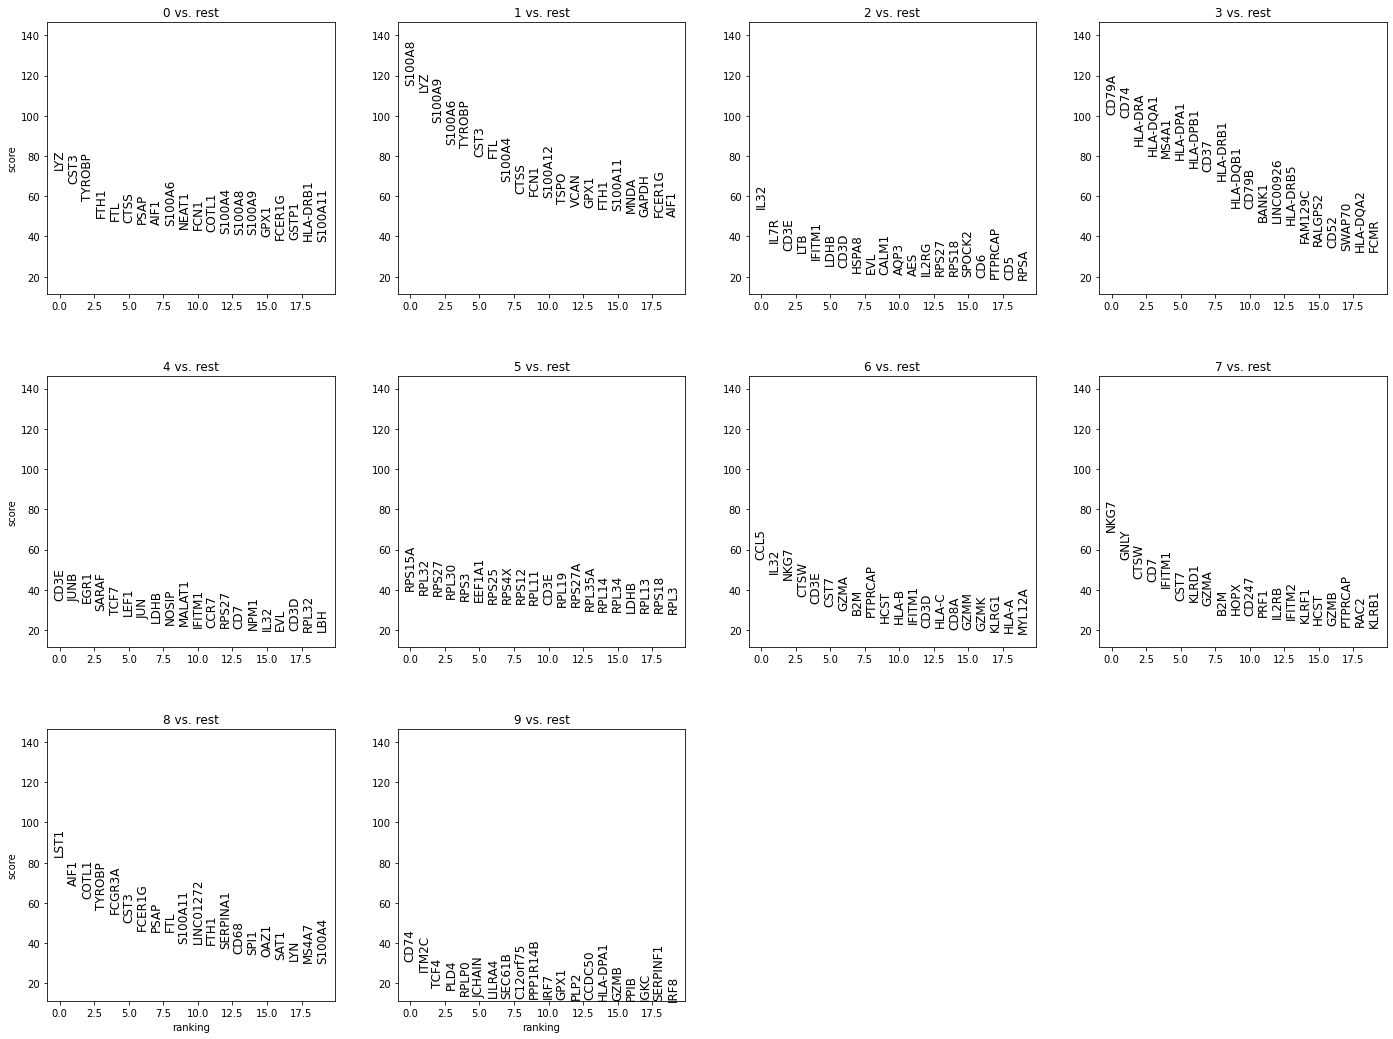

In [94]:
if annotated_plot == 0:
    sc.tl.rank_genes_groups( adata, groupby = temp_clustering_group_value , key_added= 'temp_rank_genes_key') # sc.tl.rank_genes_groups(adata, groupby='louvain_Try_1', key_added='rank_genes_Try_Lo_Key_1') 
    if run_number == 0:
        rv = (pd.DataFrame(adata.uns)) #print(rv) 
        temp_rank_value = rv.iloc[-1][0]  # e.g. rank_value = 'rank_genes_Try_1'
        temp_rank_value 
        run_number +=1

    print('Most Important PCA Genes:\n', np.array(pca_colors)) 
    sc.pl.rank_genes_groups(adata, key = 'temp_rank_genes_key', fontsize=12, method='wilcoxon')         

## Plotting Ranked Genes (Annotated)

In [95]:
if annotated_plot == 1: 
    sc.tl.rank_genes_groups( adata, groupby = temp_clustering_group_value_ann , key_added= 'temp_rank_genes_key_ann') # sc.tl.rank_genes_groups(adata, groupby='louvain_Try_1', key_added='rank_genes_Try_Lo_Key_1') 
    if run_number == 0 :
        rv = (pd.DataFrame(adata.uns)) #print(rv)
        temp_rank_value_ann = rv.iloc[-1][0]  # e.g. rank_value = 'rank_genes_Try_1' 
        temp_rank_value_ann 
        run_number +=1

    print('Most Important PCA Genes:\n', np.array(pca_colors)) 
    sc.pl.rank_genes_groups(adata, key = temp_rank_value_ann, fontsize=12, method='wilcoxon') 

---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*------*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*------*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*------
### `Break Point 5`
### If you are not satisfied from the charts, you can turn back... 
* ...by searching one of the `word`s of `ICB Helmholtz Zentrum München`;
* Change the parameters;
* Run from `checkpoint` file
* Else:
* You can add `#` letter infront of `break` or just change parameter of `break_command`

In [96]:
break_command = break_command  #+1 # To Move On Add 1 To `break_command`

while break_command in [5]: 
    sys.exit()

### `Checkpoint 3` Saving

In [97]:
if checkpoint in [3]:
    checkpoint = 3
    checkpoint += 1
    adata.write_h5ad('Checkpoint_3')

---
---
# `Section VI`
---
---
# Preparation Of `The Ranked Functions` For Next Plottings
### Recommended For After `The_Number_Of_Clusters` is found with best resolution of `in_key` value

### `Checkpoint 3` Loading

In [98]:
if checkpoint in [3]:
    # ICB Helmholtz Zentrum München 
    adata = sc.read_h5ad('Checkpoint_3')

## Defining 
### `groupby value` as `temp_try_value`

### &
 
### `key_of_ranked_gene_groups` as `temp_rank_genes_key`

In default, it uses last `in_key` in previous plotting

In [99]:
def define_cluster_nd_ranked(annotated=0, key_of_groupby= 'temp_try_value',key_of_ranked = 'temp_rank_genes_key', target_dict = target_dict ):
    if in_key <3:
        sc.tl.louvain(adata, resolution= rall[ (in_key%6) ], key_added= key_of_groupby )
    elif in_key >=3:
        sc.tl.leiden(adata, resolution= rall[ (in_key%6) ], key_added= key_of_groupby ) 

    if annotated == 1: 
        #print('anno')
        adata.obs[f'{key_of_groupby}_annotation'] = adata.obs[ key_of_groupby ].map(target_dict).astype('category') 
        sc.tl.rank_genes_groups( adata, groupby = key_of_groupby , key_added = f'{key_of_ranked}_annotation' ) 
    else:
        sc.tl.rank_genes_groups( adata, groupby = key_of_groupby  , key_added= key_of_ranked ) 

In [100]:
define_cluster_nd_ranked(annotated=0, key_of_groupby= 'temp_try_value',key_of_ranked = 'temp_rank_genes_key' )  

## Prepare `adata` for `The Ranked Functions`
### (Especially `temp_try_value` & `temp_rank_genes_key` to `ranked_functions`)


In [101]:
if break_for_ranked_functions == 0:
    to_send_ranked_functions = "ranked_functions_to_read.h5ad"
    adata.write( to_send_ranked_functions ) 
    break_for_ranked_functions+=1 

# Importing & Applying `ranked_functions`

## Importing

In [102]:
adata = sc.read_h5ad(to_send_ranked_functions) 
The_Number_Of_Clusters_Default = The_Number_Of_Clusters

In [103]:
from ranked_functions import *   # It provides tgc_list which is annotation dictionary for each cluster.

   B cells B cells naive Dendritic cells NK cells T cells
0  HLA-DRA          CD74         HLA-DRA   S100A4  S100A4
1     CD74           NaN        HLA-DRB1      NaN     NaN
{'B cells': ['HLA-DRA', 'CD74'], 'B cells naive': ['CD74'], 'Dendritic cells': ['HLA-DRA', 'HLA-DMA'], 'NK cells': ['S100A4'], 'T cells': ['S100A4'], 'CMP': ['CD33']}


In [104]:
The_Number_Of_Clusters = The_Number_Of_Clusters_Default

---
---
# `Section VII`
---
---
#  Definition, Configuration & Plotting
* Defining `re_configure_dict`,`clustering_group_value` & Plotting
* Plotting Matrix, Dotplot & umap

## Definition Part 

### `re_configure_dict` Function

In [105]:
def re_configure_dict(number_x=0, number_y=0, reset = 0):
    global target_dict, adata, moves_list 
    if reset == 1: 
        moves_list = []
        annotation_list(target_dictionary={})
    temp_dict = target_dict.copy()
    temp_dict[f'{number_y}'] = target_dict[f'{number_x}'] 
    temp_dict[f'{number_x}'] = target_dict[f'{number_y}'] 
    #temp_dict = pd.Series(temp_dict)
    
    #target_dict = temp_dict[temp_dict.duplicated()==True] 
    target_dict = temp_dict
    #move_sum = [number_x,number_y]
    #moves_list.append(move_sum)
    #moves_list = moves_list[1:]

In [106]:
clustering_group_value = 'groupby_value' 
rank_value = 'rank_genes_value'
define_cluster_nd_ranked(annotated=0, key_of_groupby= 'groupby_value',key_of_ranked = 'rank_genes_value', target_dict = target_dict)


clustering_group_value_ann = 'groupby_value' + '_annotation' 
rank_value_ann = 'rank_genes_value'  + '_annotation' 
define_cluster_nd_ranked(annotated=1, key_of_groupby= 'groupby_value',key_of_ranked = 'rank_genes_value', target_dict = target_dict)



### `All_Dict` Definition From `The Ranked Functions`

In [107]:
All_Dict = clustered_all_dict(r_base_key = rank_value_ann, Cluster_Number = None, score_number = 1, quantile_number = 0.9,dropna = 1) # Provides All_Dict

In [108]:
in_key, clustering_group_value

(2, 'groupby_value')

In [109]:
clustering_group_value , rank_value
if in_key <3:
    sc.tl.louvain(adata, resolution= rall[ (in_key%6) ], key_added= clustering_group_value )
elif in_key >=3:
    sc.tl.leiden(adata, resolution= rall[ (in_key%6) ], key_added= clustering_group_value ) 

# `*!*` `Configuration & Plotting Part Of Annotation Part I` 
### Matrixplot

You chance `number_x` & `number_y` by looking at `target_dict`

### Defining New `target_dict` For Annotation

In [110]:
target_order = 1
target_dict_default = target_dict 

In [111]:
configuration_continues = 0
break_command = 10
target_order = 0 # If it is first time, target_dict will be defined from default. 

new_cells_nd_markers(sensivity=0.8)
Target_Cell_Types = selected_cell_types
annotation_list() 

In [112]:
if target_order == 1:
  target_dict = target_dict_default # After you found correct annotations, you will have target_dict 
  order = list(target_dict.values()) 
  
def reset_to():
    global target_dict, order, temp_dict
    temp_dict = target_dict
    un = list(pd.unique(adata.obs[ clustering_group_value_Re_configured ]))
    for i,j in zip(list(temp_dict.keys()),list(temp_dict.values())):
        if j not in un: 
            target_dict.pop(f'{i}')   
    order = list(target_dict.values()) 
      


### Just In Case If `All_Dict` has no enough value

In [113]:
x = random.choice(selected_cell_types) 
if len(All_Dict[f'{x}']) <= 2: 
  All_Dict = clustered_all_dict(r_base_key = rank_value_ann, Cluster_Number = None, score_number = 1, quantile_number = 0.9,dropna = 0) # Provides All_Dict
  pdd = pd.DataFrame.from_dict(All_Dict)[:3] 
  B_dict = pdd.fillna('CTSD')  # This `CD38` gene can be changed. 
  All_Dict = B_dict.to_dict(orient='list') 

In [114]:
All_Dict

{'B cells': ['CD79A', 'CD79B', 'IGHM'],
 'B cells naive': ['CD79A', 'CD79B', 'IGHM'],
 'Dendritic cells': ['HLA-DRA', 'HLA-DMA', 'HLA-DRB1'],
 'NK cells': ['GNLY', 'NKG7', 'IL32'],
 'T cells': ['CD3D', 'CD3E', 'LTB'],
 'T memory cells': ['CD3E', 'CD2', 'LTB'],
 'HSC': ['GATA3', 'CD38', 'CTSD'],
 'CMP': ['CD33', 'CD38', 'CTSD'],
 'NKP': ['CD27', 'CD7', 'CD38']}

The user should define moves for changing categories of the clusters.

`moves` list can be used for this purpose.

`reset` option can also be used if needed; for example, the user can define moves one by one, and see the plots frame by frame.

In [115]:
adata.obs[clustering_group_value]

AAACCTGCAAAGCGGT-1    3
AAACCTGCACAGCCCA-1    3
AAACCTGCACCAACCG-1    5
AAACCTGCAGACGCCT-1    3
AAACCTGGTCATCCCT-1    6
                     ..
TTTGTCACATATGGTC-1    3
TTTGTCAGTCCTAGCG-1    7
TTTGTCAGTGTTGAGG-1    5
TTTGTCATCCAGAGGA-1    7
TTTGTCATCCGCAGTG-1    8
Name: groupby_value, Length: 3860, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [116]:
annotation_list( target_dictionary={} ) 

order = list(target_dict.values()) 
print(len(np.array(order)), np.array(order)) 
print(len(target_dict), target_dict ) 

10 ['B cells' 'B cells naive' 'Dendritic cells' 'NK cells' 'T cells'
 'T memory cells' 'HSC' 'CMP' 'NKP' 'unkown_cell_type_9']
10 {'0': 'B cells', '1': 'B cells naive', '2': 'Dendritic cells', '3': 'NK cells', '4': 'T cells', '5': 'T memory cells', '6': 'HSC', '7': 'CMP', '8': 'NKP', '9': 'unkown_cell_type_9'}


In [117]:
'''print(len(np.array(pd.unique(adata.obs[ clustering_group_value ]))), np.array(pd.unique(adata.obs[ clustering_group_value ])))
print(len(np.array(pd.unique(adata.obs[ clustering_group_value_Re_configured ]))), np.array(pd.unique(adata.obs[ clustering_group_value_Re_configured ])))
print(len(np.array(order)), np.array(order)) 
print(len(target_dict), target_dict ) 
print(The_Number_Of_Clusters,The_Number_Of_Informative_Components,len(target_dict))
adata.obs[ clustering_group_value_Re_configured ].cat.reorder_categories(order)
'''

'print(len(np.array(pd.unique(adata.obs[ clustering_group_value ]))), np.array(pd.unique(adata.obs[ clustering_group_value ])))\nprint(len(np.array(pd.unique(adata.obs[ clustering_group_value_Re_configured ]))), np.array(pd.unique(adata.obs[ clustering_group_value_Re_configured ])))\nprint(len(np.array(order)), np.array(order)) \nprint(len(target_dict), target_dict ) \nprint(The_Number_Of_Clusters,The_Number_Of_Informative_Components,len(target_dict))\nadata.obs[ clustering_group_value_Re_configured ].cat.reorder_categories(order)\n'

In [118]:
The_Number_Of_Clusters,The_Number_Of_Informative_Components,len(target_dict)

(10, 8, 10)

In [119]:
clustering_group_value_Re_configured = f'{clustering_group_value}_re_configured'
adata.obs[ clustering_group_value_Re_configured ] = adata.obs[ clustering_group_value ].map(target_dict).astype('category')
c =0


target_dict {'0': 'CMP', '1': 'unkown_cell_type_9', '2': 'Dendritic cells', '3': 'B cells', '4': 'T cells', '5': 'T memory cells', '6': 'NKP', '7': 'NK cells', '8': 'HSC', '9': 'B cells naive'} 
 order ['CMP', 'unkown_cell_type_9', 'Dendritic cells', 'B cells', 'T cells', 'T memory cells', 'NKP', 'NK cells', 'HSC', 'B cells naive']


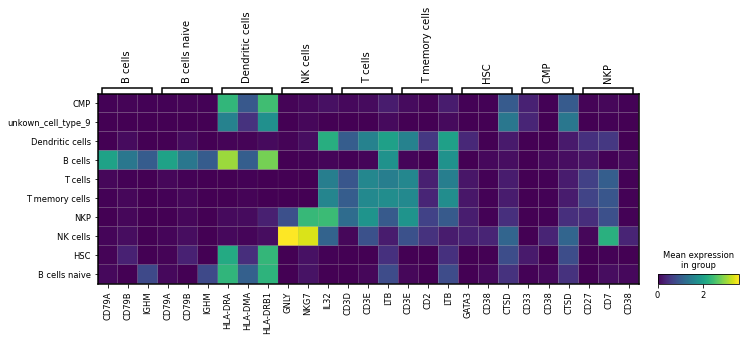

In [120]:
moves = [[0,3],[0,7],[6,8],[1,9]] #,[0,0]  ] #[ [3,7],[6,8],[2,9],[0,3] ] 
#moves = [[0,0]]
if configuration_continues == 0: 
    for i in moves: 
        re_configure_dict( number_x = i[0] , number_y = i[1], reset = 0 ) 
        reset_to()  
        # Change target_dict & provides `moves_list` 
        order = list(target_dict.values()) 
    print('target_dict', target_dict,'\n','order', order)#,'\n',moves_list)
    break_command += 1 
clustering_group_value_Re_configured = f'{clustering_group_value}_re_configured'
adata.obs[ clustering_group_value_Re_configured ] = adata.obs[ clustering_group_value ].map(target_dict).astype('category')
adata.obs[ clustering_group_value_Re_configured ].cat.reorder_categories(order)
sc.pl.matrixplot( adata, All_Dict, groupby = clustering_group_value_Re_configured , use_raw = False, vmin=0 ) 


### `Break Point 6`

In [121]:
break_command = 10 # +1 # To Move On Add 1 To `break_command`

while break_command in [6]: 
    sys.exit() 

# `*!*` `Configuration & Plotting Part Of Annotation Part II` 

## Dotplot

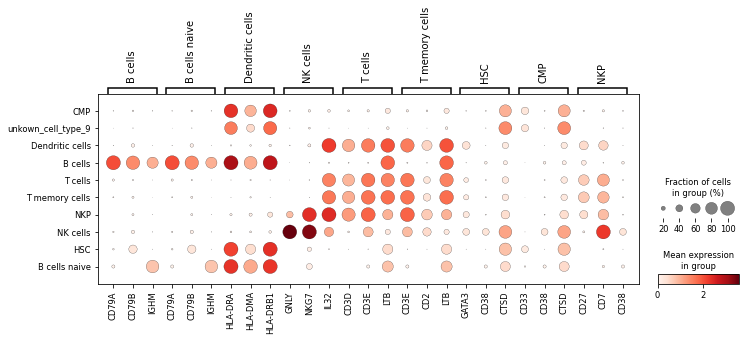

In [122]:
if configuration_continues == 1: 
    re_configure_dict(number_x = 0 , number_y = 0, reset = 1) 
    # Change target_dict & provides `moves_list`
    order = list(target_dict.values()) 
    print(target_dict,'\n',order)#,'\n',moves_list) 
clustering_group_value_Re_configured = f'{clustering_group_value}_re_configured'
adata.obs[ clustering_group_value_Re_configured ] = adata.obs[ clustering_group_value ].map(target_dict).astype('category') 
adata.obs[ clustering_group_value_Re_configured ].cat.reorder_categories(order)

sc.pl.dotplot(adata, var_names = All_Dict, groupby = clustering_group_value_Re_configured , use_raw=False ) 

## Plotting in UMAP & Dendrogram

There Are  8  PCA Components
Last Number Of Cluster You Proposed:  10
The Number Of Cell Types Extracted From adata For Target:  9


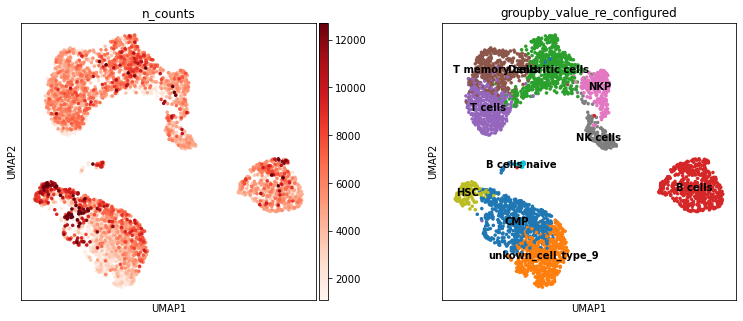

In [123]:
sc.tl.dendrogram(adata, groupby= clustering_group_value_Re_configured, n_pcs= The_Number_Of_Informative_Components, var_names=True)          
print('There Are ',The_Number_Of_Informative_Components ,' PCA Components') 
print('Last Number Of Cluster You Proposed: ', The_Number_Of_Clusters) 
print('The Number Of Cell Types Extracted From adata For Target: ', len(Target_Cell_Types)) 
rcParams['figure.figsize'] = 5,5
sc.pl.umap(adata, color= n_counts + [clustering_group_value_Re_configured], 
        hspace=0.5,wspace=0.3,s=50,frameon=True, ncols=2, vmax='p99',
        color_map='Reds',legend_loc='on data', ) 

---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*------*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*------*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*---*------
### `Break Point 7` & `Checkpoint 4` Saving
### If you are not satisfied from the charts, you can turn back... 
* ...by searching one of the `word`s of `ICB Helmholtz Zentrum München`;
* Change the parameters;
* Run from `checkpoint` file
* Else:
* You can add `#` letter infront of `break` or just change parameter of `break_command`

In [124]:
break_command = break_command # +1 # To Move On Add 1 To `break_command`

while break_command in [7]: 
    sys.exit()

if checkpoint in [4]:
    checkpoint = 4
    checkpoint += 1
    adata.write_h5ad('Checkpoint_4') 


#
---

---
---
# `Section VIII`
---
---
# Inspecting Celll Types Within Each Other

### `Checkpoint 4` Loading

In [125]:
checkpoint = checkpoint
if checkpoint in [4]:
    # ICB Helmholtz Zentrum München 
    adata = sc.read_h5ad('Checkpoint_4')

## Definition Of `Functions`

Define `Target_Gene_To_Inspect`

In [126]:
def configuration_function_inspection(new_resolution = rall[ (in_key%6) ] , Inspection_Target = ['B cells'] ):
    global cgv_Re_configured_Inspection
    cgv_Re_configured_Inspection = 'clustering_group_value_Re_configured_inspection' 
    if in_key <3:
        sc.tl.louvain(adata, resolution= new_resolution,
        restrict_to = [clustering_group_value_Re_configured, Inspection_Target ],
        key_added= f'{cgv_Re_configured_Inspection}_{Inspection_Target[0][0]}' )
    elif in_key >=3:
        sc.tl.leiden(adata, resolution= new_resolution,
        restrict_to = [clustering_group_value_Re_configured, Inspection_Target ],
        key_added= f'{cgv_Re_configured_Inspection}_{Inspection_Target[0][0]}' ) 

cgv_Re_configured_Inspection = 'clustering_group_value_Re_configured_inspection' 

In [127]:
def Subsetting_Targets( Ref = 0, Target = 1, Rank_Switch = 1, cgv_inspection_groupby = cgv_Re_configured_Inspection ):
    global cgv_Re,cgv_Re_Inspect , subsetted_targets,Target_For_Reference,Target_For_Group
    
    cgv_Re = adata.obs[clustering_group_value_Re_configured].cat.categories
    
    cgv_Re_Inspect = adata.obs[cgv_inspection_groupby].cat.categories

    subsetted_targets=[]
    for i in cgv_Re_Inspect: 
        if i not in cgv_Re:
            subsetted_targets.append(i)
    try:
        Target = int(Target)
    except:
        pass    
    
    Target_For_Reference = subsetted_targets[Ref] 
    if type(Target) == int:
        Target_For_Group = subsetted_targets[Target]   
    else:
        Target_For_Group = Target # E.g. ['NK cells']

    if Rank_Switch == 1:    
        sc.tl.rank_genes_groups(adata = adata, groupby = cgv_inspection_groupby , groups= [Target_For_Group] ,
                            reference = Target_For_Reference, rankby_abs = True)    


# `*!*` `Find Resolution & Inspection Of Reference Cell Type Within Each Other`
## Subpopulations Of B Cells

In [128]:
Target_Gene_To_Inspect = ['B cells'] 
Current_Inspection_Groupby = cgv_Re_configured_Inspection+'_'+ Target_Gene_To_Inspect[0][0] 
Inspection_Resolution = rall[ (in_key%6) ] 
print( Target_Gene_To_Inspect, Current_Inspection_Groupby) 
New_Resolution = Inspection_Resolution - 0.35

['B cells'] clustering_group_value_Re_configured_inspection_B


Current Resolution: 0.28


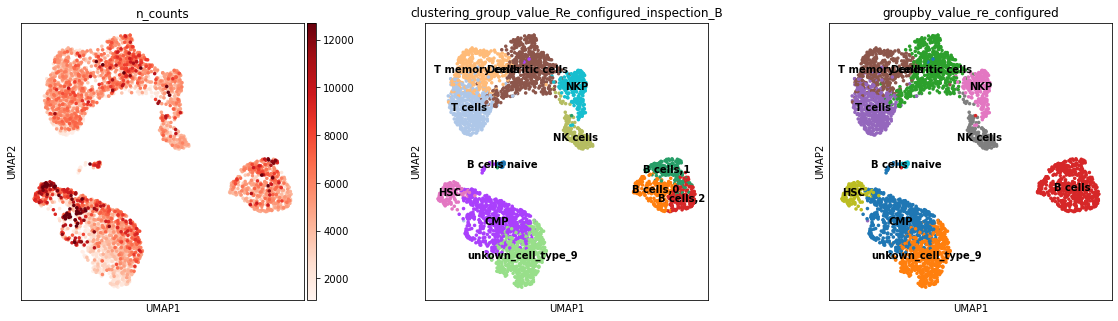

In [129]:
configuration_function_inspection(
    new_resolution = New_Resolution , # Default: rall[in_key%6]
    Inspection_Target = Target_Gene_To_Inspect ) # Default: ['B cells']  
print('Current Resolution:', New_Resolution )     
Inspection_Groupby_B = Current_Inspection_Groupby # 'clustering_group_value_Re_configured_inspection_B'

rcParams['figure.figsize']= (5,5) 
sc.pl.umap(adata, color= n_counts + [Inspection_Groupby_B] + [clustering_group_value_Re_configured], 
        hspace=0.5,wspace=0.3,s=50,frameon=True, ncols=3, vmax='p99',
        color_map='Reds',legend_loc='on data', )  

Subsetted_Targets ['B cells,0', 'B cells,1', 'B cells,2'] 
Target_For_Reference: B cells,0 
Target_For_Group: B cells,1


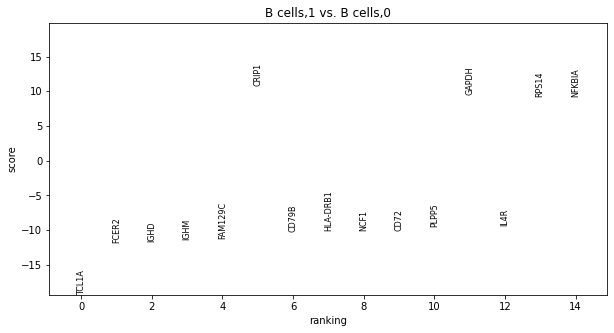

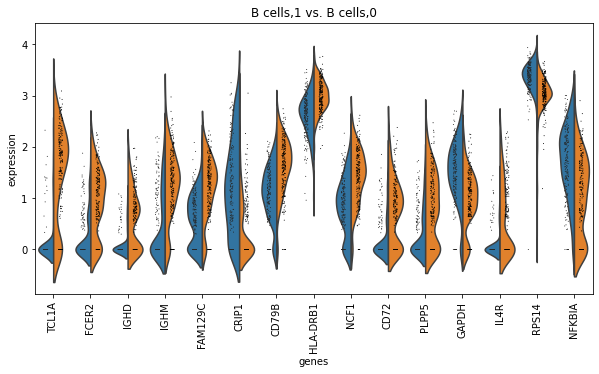

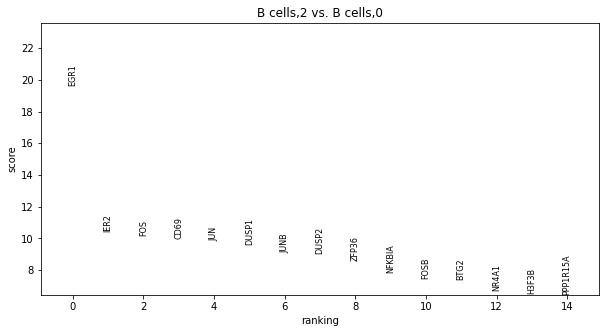

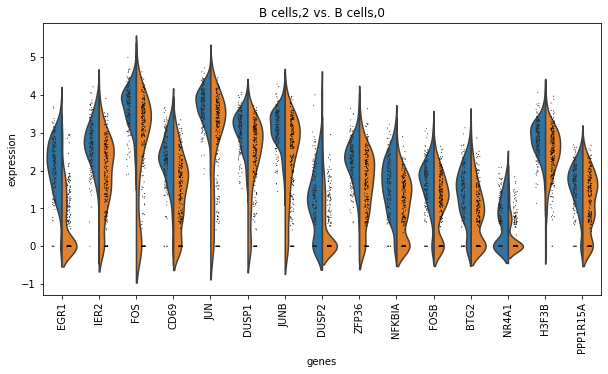

In [130]:
Subsetting_Targets( Ref = 0, Target = 1, Rank_Switch = 1, cgv_inspection_groupby = Inspection_Groupby_B )
print('Subsetted_Targets', subsetted_targets,'\nTarget_For_Reference:', Target_For_Reference, '\nTarget_For_Group:', Target_For_Group) 
len_B = len(subsetted_targets)
rcParams['figure.figsize']=(10,5)  
for i in subsetted_targets[1:]:
    Subsetting_Targets( Ref = 0, Target = i, Rank_Switch = 1, cgv_inspection_groupby = Inspection_Groupby_B ) 
    #Subsetting_Targets(Ref = 0, Target = i, Rank_Switch = 1) 

    sc.pl.rank_genes_groups( adata, size=10, n_genes=15 ) 
    sc.pl.rank_genes_groups_violin(adata, groups = [Target_For_Group] , n_genes=15, use_raw = True)  

## `Break Point 8`

In [131]:
break_command = break_command # +1 # To Move On Add 1 To `break_command`

while break_command in [8]:  
    sys.exit() 

# `*!*` `Inspection Of Reference Cell Type With Target Cell Type`
## NK cells in Subpopulation Of B Cells

Subsetted_Targets ['B cells,0', 'B cells,1', 'B cells,2'] 
Target_For_Reference: B cells,0 
Target_For_Group: NK cells


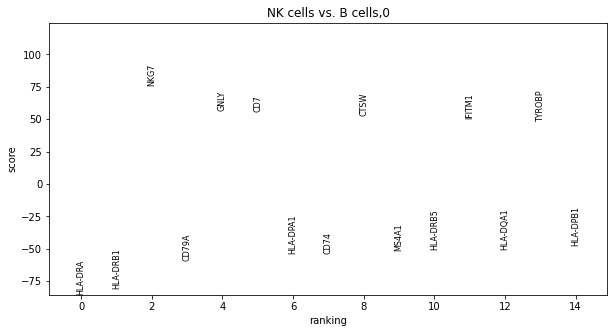

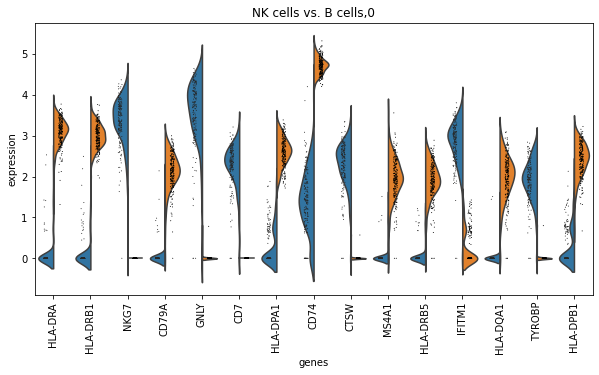

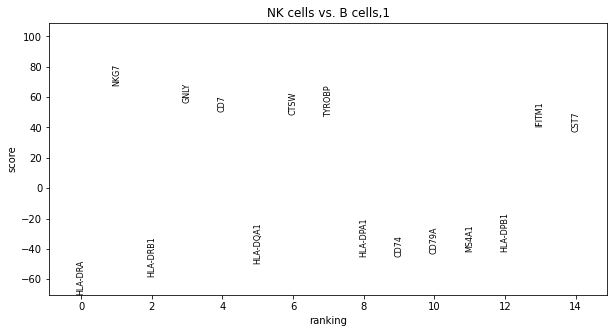

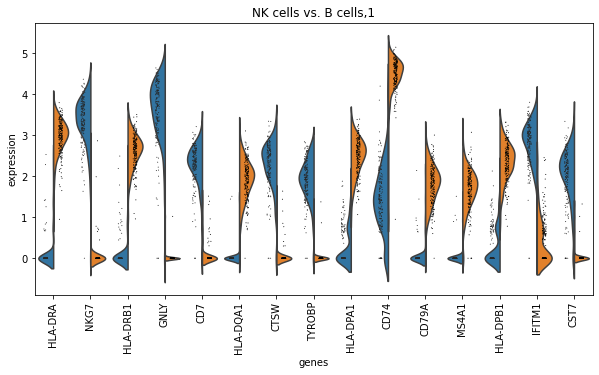

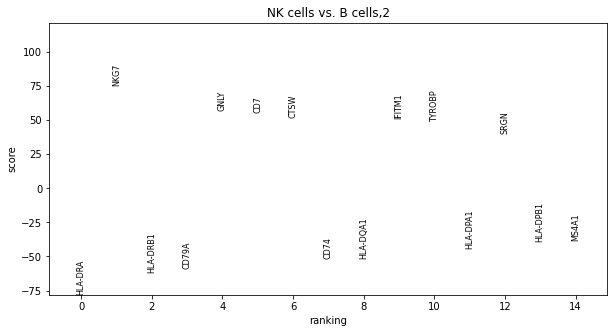

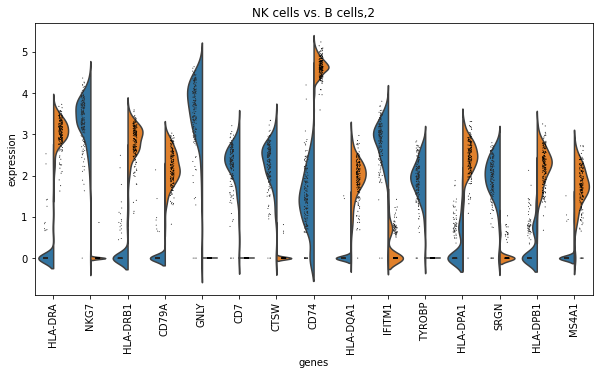

In [132]:
Subsetting_Targets( Ref = 0, Target = 'NK cells', Rank_Switch = 1, cgv_inspection_groupby = Inspection_Groupby_B )

print('Subsetted_Targets', subsetted_targets,'\nTarget_For_Reference:', Target_For_Reference, '\nTarget_For_Group:', Target_For_Group)      
rcParams['figure.figsize']=(10,5)  
for i in range(len(subsetted_targets[:])):
    Subsetting_Targets(Ref = i, Target = 'NK cells', Rank_Switch = 1,cgv_inspection_groupby = Inspection_Groupby_B) 
    
    sc.pl.rank_genes_groups( adata, size=10, n_genes=15 ) 
    sc.pl.rank_genes_groups_violin(adata, groups = [Target_For_Group] , n_genes=15, use_raw = True)  


---
# `*!*` `Find Resolution & Inspection Of Reference Cell Type Within Each Other`
## Subpopulations Of NK Cells
# `*!*` `Inspection Of Reference Cell Type With Target Cell Type`
## B cells in Subpopulation of NK Cells

In [133]:
New_Resolution = Inspection_Resolution -0.1

['NK cells'] clustering_group_value_Re_configured_inspection_N
Current Resolution: 0.53


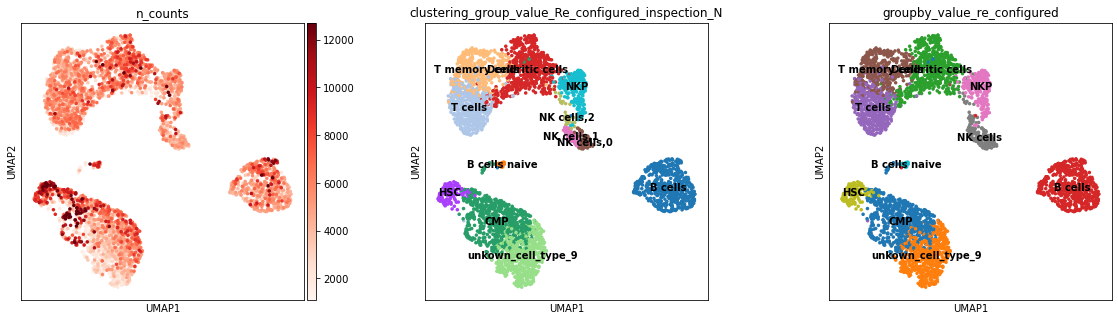

In [134]:
Target_Gene_To_Inspect = ['NK cells']
Current_Inspection_Groupby = cgv_Re_configured_Inspection+'_'+ Target_Gene_To_Inspect[0][0] 
Inspection_Resolution = rall[ (in_key%6) ] 
New_Resolution = New_Resolution
print( Target_Gene_To_Inspect, Current_Inspection_Groupby) 

configuration_function_inspection(
    new_resolution = New_Resolution , # Default: Inspection_Target = rall[in_key%6]
    Inspection_Target = Target_Gene_To_Inspect ) # Default: Inspection_Target = ['B cells']  
print('Current Resolution:', New_Resolution ) 
Inspection_Groupby_N = Current_Inspection_Groupby # clustering_group_value_Re_configured_inspection_N

rcParams['figure.figsize']= (5,5) 
sc.pl.umap(adata, color= n_counts + [Inspection_Groupby_N] + [clustering_group_value_Re_configured], 
        hspace=0.5,wspace=0.3,s=50,frameon=True, ncols=3, vmax='p99',
        color_map='Reds',legend_loc='on data', )  

Subsetted_Targets ['NK cells,0', 'NK cells,1', 'NK cells,2'] 
Target_For_Reference: NK cells,0 
Target_For_Group: NK cells,1


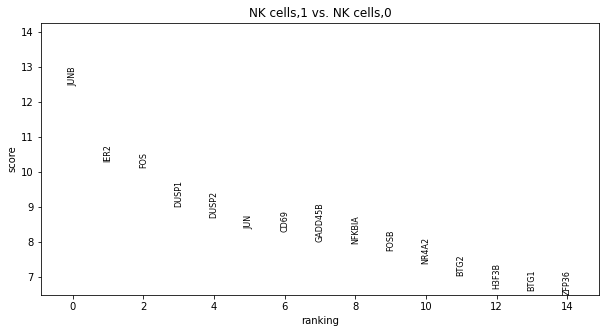

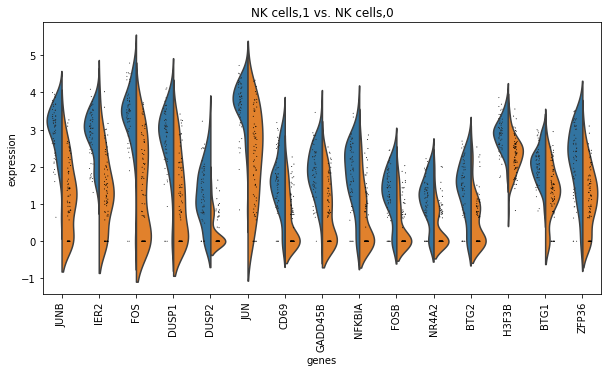

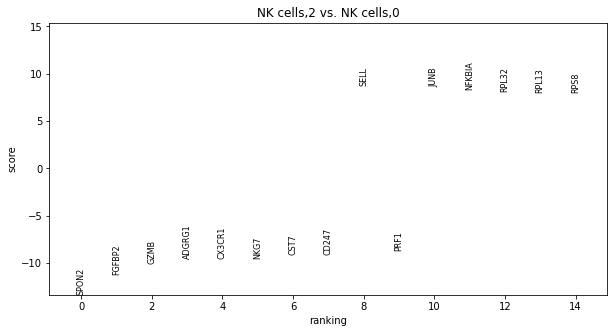

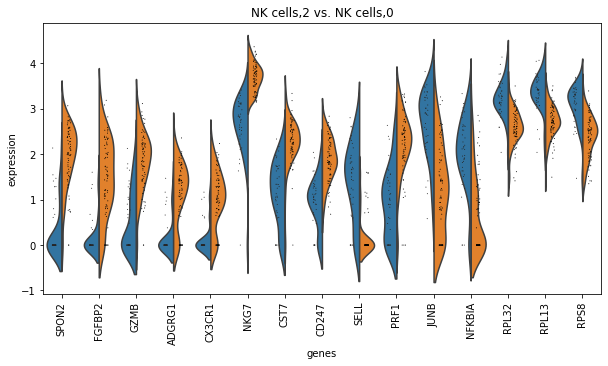

In [135]:
Subsetting_Targets( Ref = 0, Target = 1, Rank_Switch = 1, cgv_inspection_groupby = Inspection_Groupby_N )
print('Subsetted_Targets', subsetted_targets,'\nTarget_For_Reference:', Target_For_Reference, '\nTarget_For_Group:', Target_For_Group) 
len_N = len(subsetted_targets)
rcParams['figure.figsize']=(10,5)  
for i in subsetted_targets[1:]:
    Subsetting_Targets( Ref = 0, Target = i, Rank_Switch = 1, cgv_inspection_groupby = Inspection_Groupby_N )

    sc.pl.rank_genes_groups( adata, size=10, n_genes=15 ) 
    sc.pl.rank_genes_groups_violin(adata, groups = [Target_For_Group] , n_genes=15, use_raw = True)  

Subsetted_Targets ['NK cells,0', 'NK cells,1', 'NK cells,2'] 
Target_For_Reference: NK cells,0 
Target_For_Group: B cells


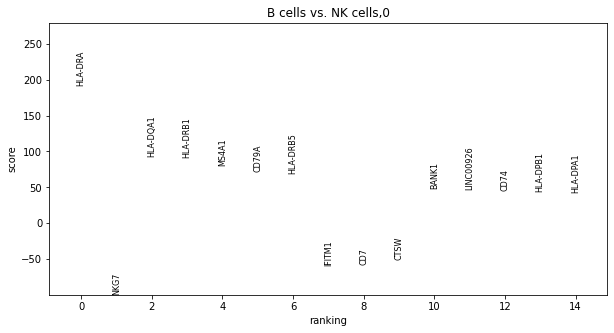

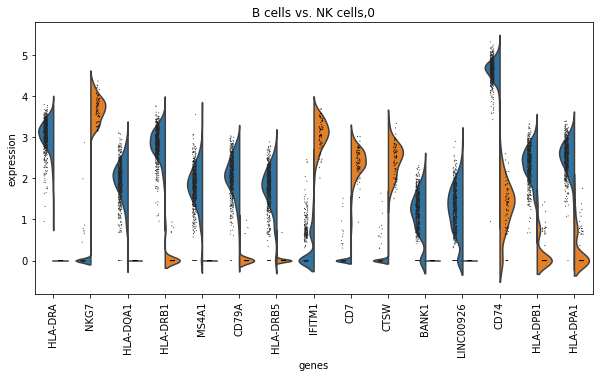

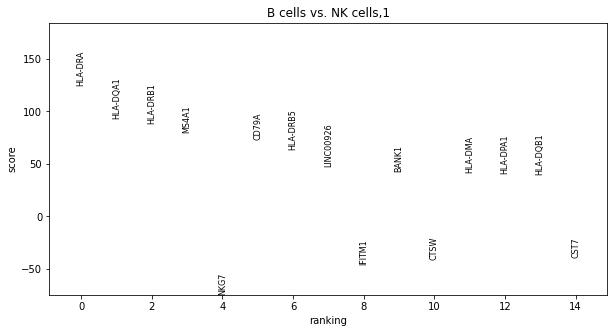

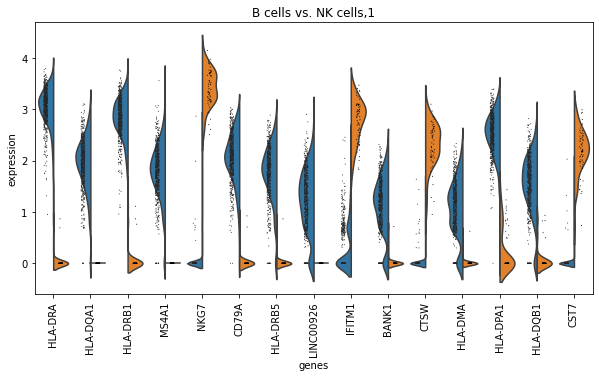

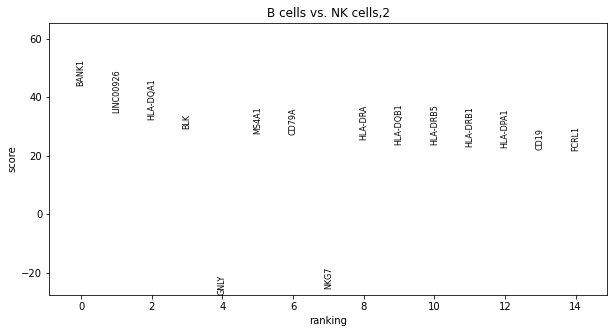

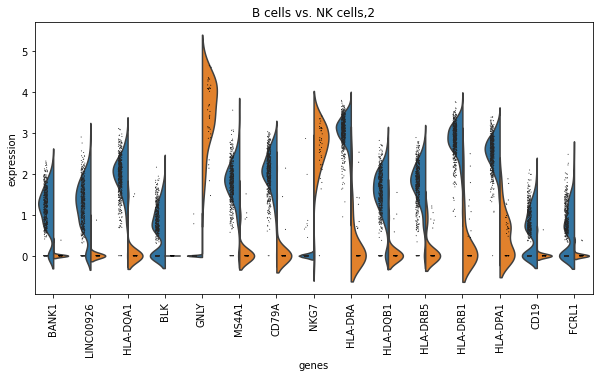

In [136]:
Subsetting_Targets( Ref = 0, Target = 'B cells', Rank_Switch = 1, cgv_inspection_groupby = Inspection_Groupby_N )

print('Subsetted_Targets', subsetted_targets,'\nTarget_For_Reference:', Target_For_Reference, '\nTarget_For_Group:', Target_For_Group)      
rcParams['figure.figsize']=(10,5)  
for i in range(len(subsetted_targets[:])):
    Subsetting_Targets( Ref = i, Target = 'B cells', Rank_Switch = 1, cgv_inspection_groupby = Inspection_Groupby_N )
    
    sc.pl.rank_genes_groups( adata, size=10, n_genes=15 ) 
    sc.pl.rank_genes_groups_violin(adata, groups = [Target_For_Group] , n_genes=15, use_raw = True)  


---
---
# `Combined Reults`
---
---

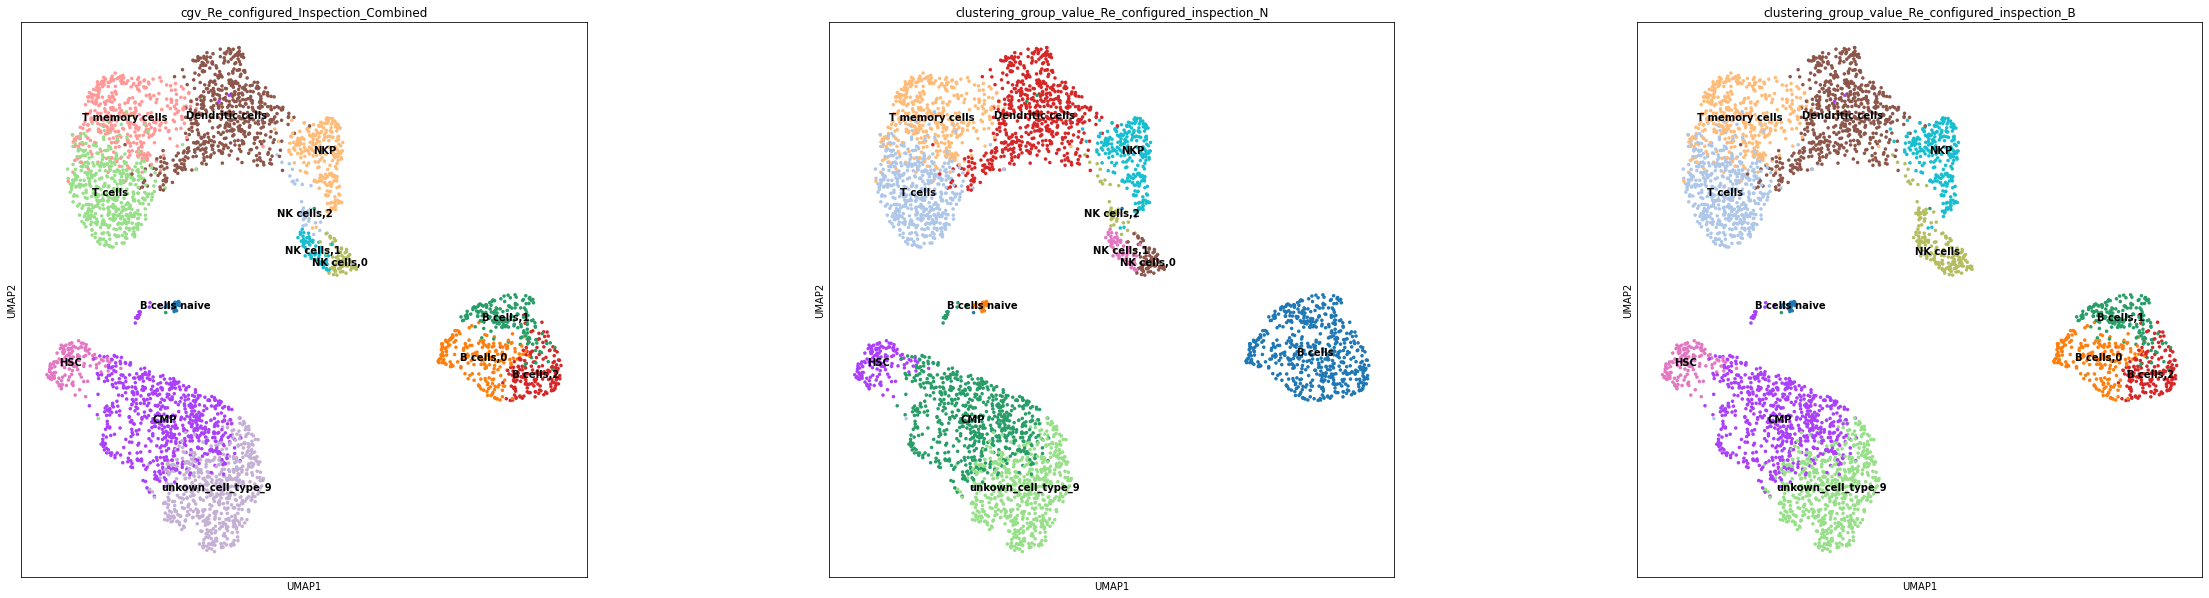

In [137]:
cgv_Re_configured_Inspection_Combined = 'cgv_Re_configured_Inspection_Combined'
sc.tl.louvain(adata, resolution= New_Resolution-0.2, 
restrict_to = [Inspection_Groupby_B, ['NK cells'] ],
key_added= cgv_Re_configured_Inspection_Combined ) 

rcParams['figure.figsize']= (10,10) 
sc.pl.umap(adata, color= [cgv_Re_configured_Inspection_Combined] + [Inspection_Groupby_N] + [Inspection_Groupby_B], 
        hspace=0.5,wspace=0.3,s=50,frameon=True, ncols=3, vmax='p99',
        color_map='Reds',legend_loc='on data', ) 
        

In [138]:
Subsetting_Targets( Ref = 0, Target = 1, Rank_Switch = 1, cgv_inspection_groupby = cgv_Re_configured_Inspection_Combined )
print('Subsetted_Targets', subsetted_targets,'\nTarget_For_Reference:', Target_For_Reference, '\nTarget_For_Group:', Target_For_Group) 

Subsetted_Targets ['B cells,0', 'B cells,1', 'B cells,2', 'NK cells,0', 'NK cells,1', 'NK cells,2'] 
Target_For_Reference: B cells,0 
Target_For_Group: B cells,1


# `Inspection Of One Target Cell Type Of Subpopulations With Subpopulations Of Reference Cell Type`
### Target: `B Cells`
### Reference: `NK Cells`

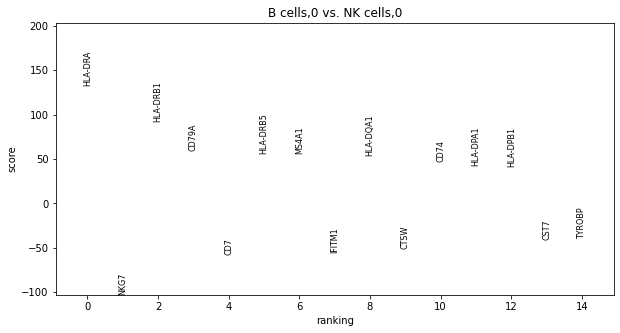

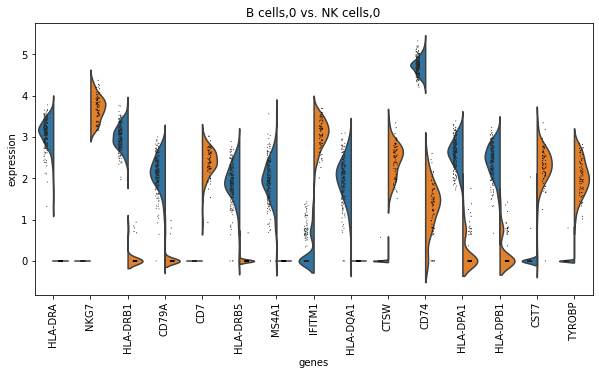

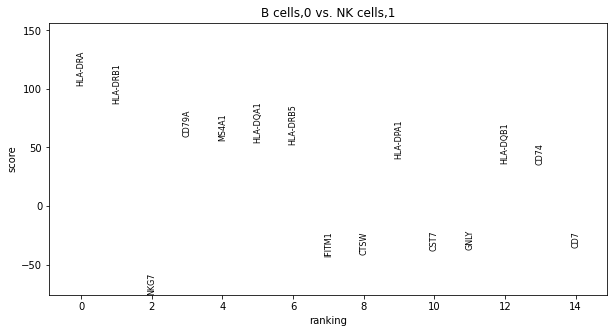

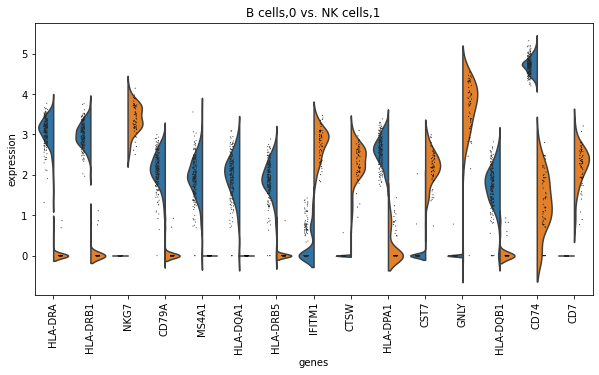

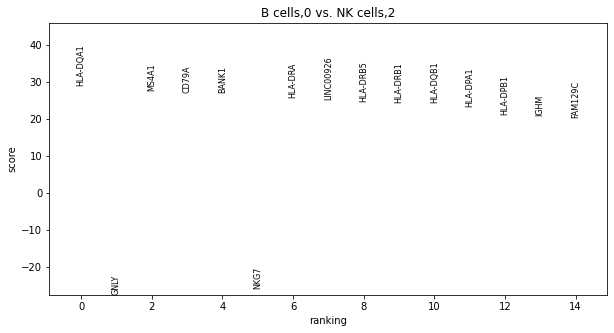

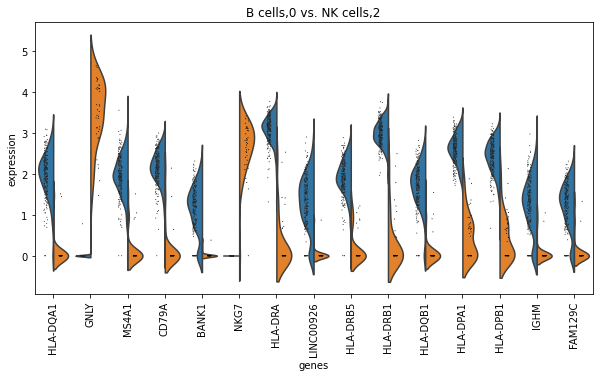

In [139]:
rcParams['figure.figsize']=(10,5)  
for i in range(len_B,len(subsetted_targets[:])):
    Subsetting_Targets( Ref = i, Target = 'B cells,0', Rank_Switch = 1, cgv_inspection_groupby = cgv_Re_configured_Inspection_Combined )
    sc.pl.rank_genes_groups( adata, size=10, n_genes=15 ) 
    sc.pl.rank_genes_groups_violin(adata, groups = [Target_For_Group] , n_genes=15, use_raw = True)   

# `Inspection Of Members Of Subpopulation Of Reference Cell Type With Members Of Target Subpopulations`
### Target: `B Cells`
### Reference: `NK Cells`

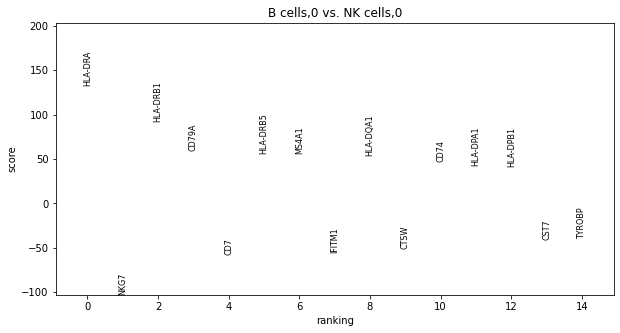

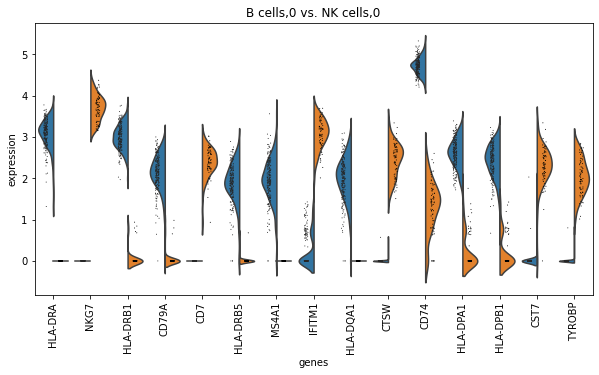

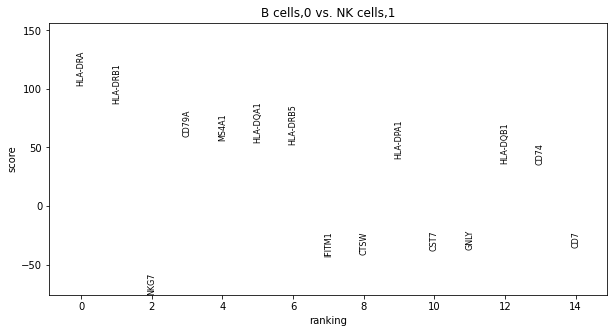

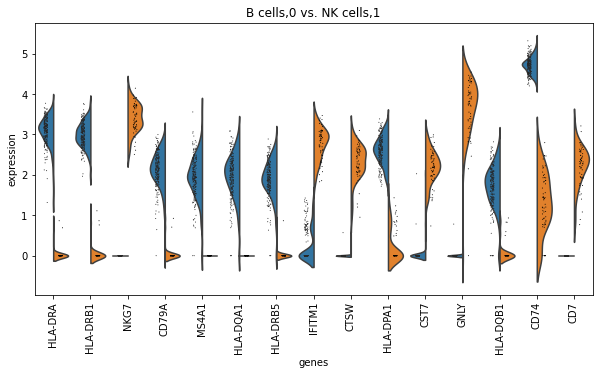

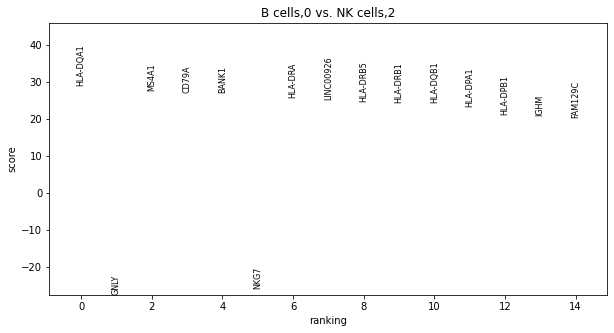

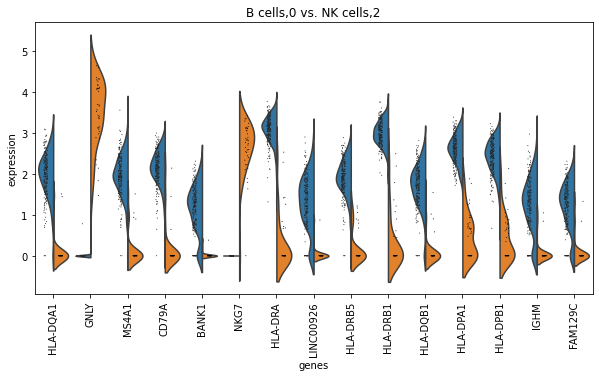

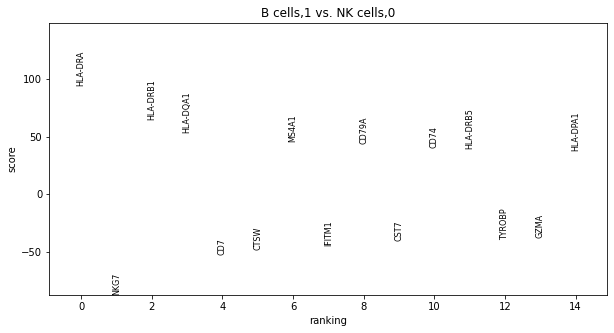

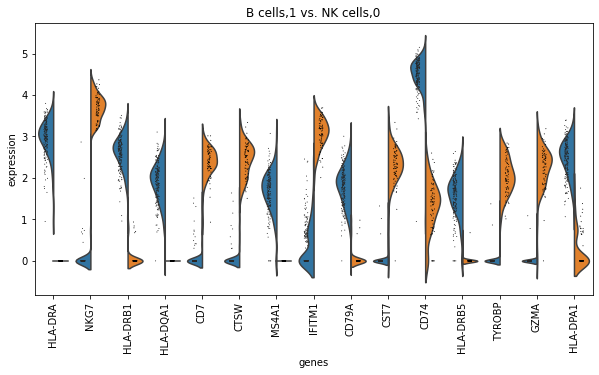

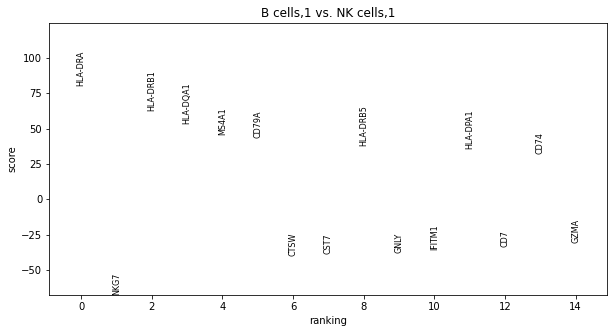

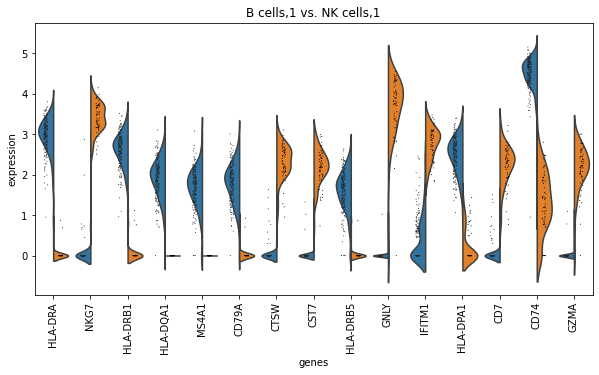

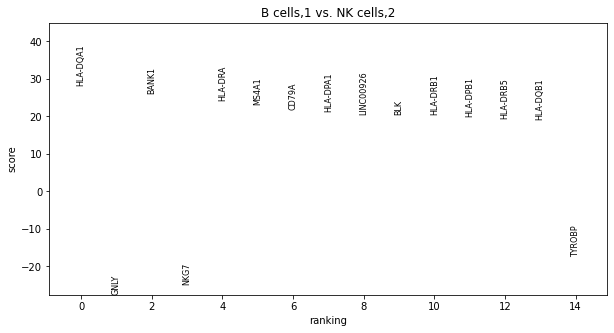

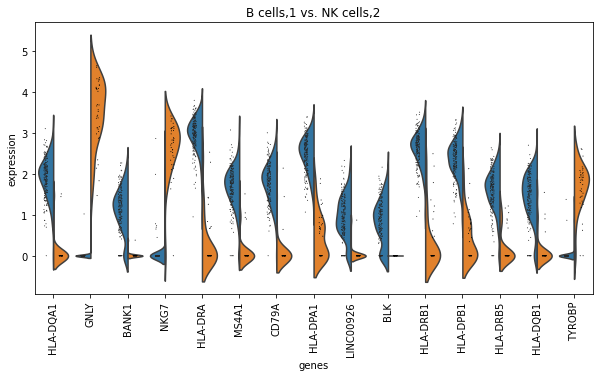

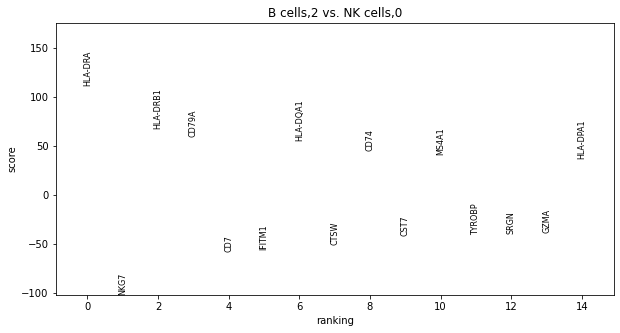

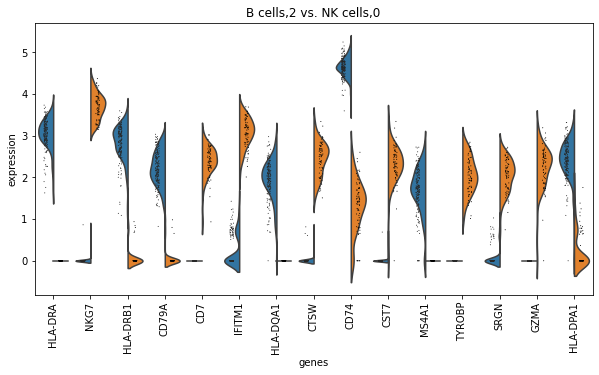

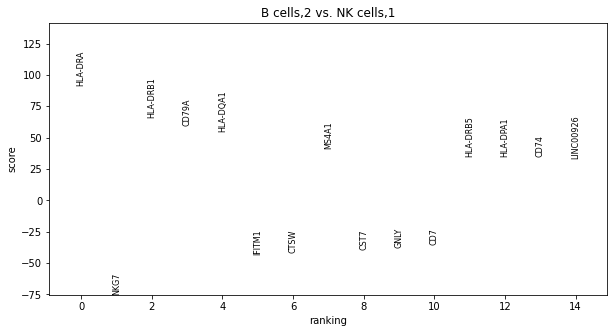

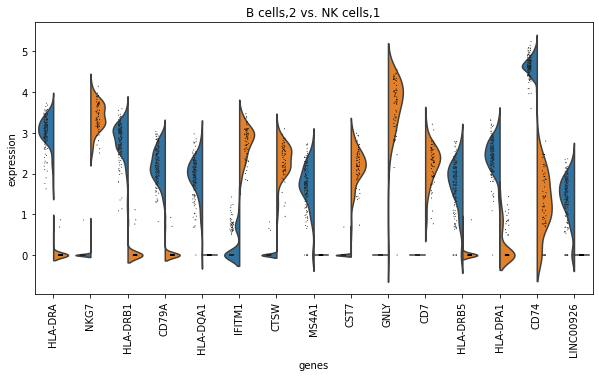

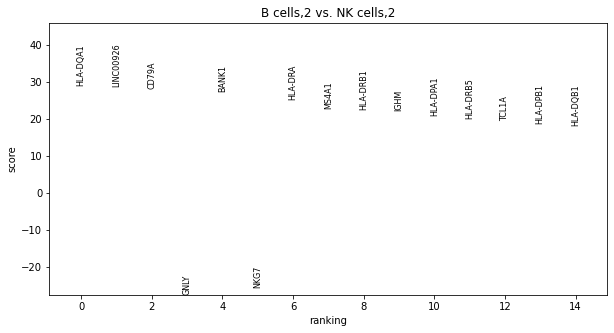

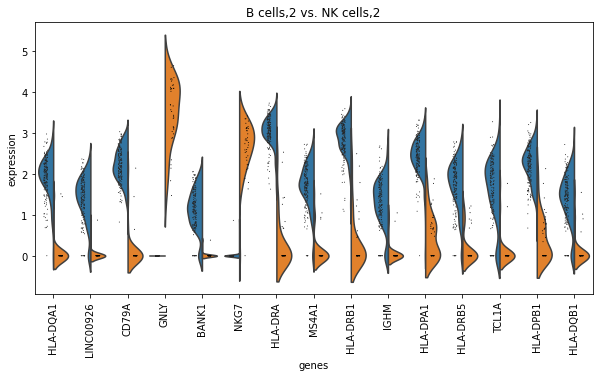

In [140]:
### Munich 
B_list  = subsetted_targets[:len_B]
for j in B_list:
    rcParams['figure.figsize']=(10,5)  
    for i in range(len_B,len(subsetted_targets[:])):
        Subsetting_Targets( Ref = i, Target = j, Rank_Switch = 1, cgv_inspection_groupby = cgv_Re_configured_Inspection_Combined )
        sc.pl.rank_genes_groups( adata, size=10, n_genes=15 ) 
        sc.pl.rank_genes_groups_violin(adata, groups = [Target_For_Group] , n_genes=15, use_raw = True)   

`Conlclusion`: If neeeded.

#
---

In [141]:
subsetted_targets

['B cells,0',
 'B cells,1',
 'B cells,2',
 'NK cells,0',
 'NK cells,1',
 'NK cells,2']

In [142]:
def bnd_csv():
    global bnd
    dict_b = {} 
    B_list  = subsetted_targets[:len_B]
    dict_n = {}
    NK_list = subsetted_targets[len_B:]
    for j in df_database['official gene symbol']: #common: 
        dict_lb = []
        dict_ln = []
        for i in B_list:
        #print( f'{i}:', np.mean(adata.X[:, adata.var_names=='CD19'][adata.obs[cgv_Re_configured_Inspection_Combined]== i ]>0 )    ) 
            value_b = np.mean(adata.X[:, adata.var_names== f'{j}'][adata.obs[cgv_Re_configured_Inspection_Combined]== i ]>0 )  
            dict_lb.append(value_b)
        #print('----')
        for i in NK_list:
            #print( f'{i}:', np.mean(adata.X[:, adata.var_names=='CD19'][adata.obs[cgv_Re_configured_Inspection_Combined]== i ]>0 )    ) 
            value_n = np.mean(adata.X[:, adata.var_names== f'{j}'][adata.obs[cgv_Re_configured_Inspection_Combined]== i ]>0 )  
            dict_ln.append(value_n)

        dict_b[f'{j}'] = dict_lb
        dict_n[f'{j}'] = dict_ln  
    bd = pd.DataFrame.from_dict(dict_b) 
    bd.index = B_list
    nd = pd.DataFrame.from_dict(dict_n) 
    nd.index = NK_list
    bnd = pd.concat([bd,nd] ,axis=0)


In [143]:
bnd_csv()
bnd['CD79A']

/mnt/4AB6E404B6E3EE7F/Users/Ubuntu_2/Anaconda_3/envs/test_env17/lib/python3.8/site-packages/scipy/sparse/base.py:581: RuntimeWarning: divide by zero encountered in true_divide
  return self.astype(np.float_)._mul_scalar(1./other)


B cells,0     0.995192
B cells,1     0.994350
B cells,2     1.000000
NK cells,0    0.042254
NK cells,1    0.033898
NK cells,2    0.078947
Name: CD79A, dtype: float64

In [144]:
Common_Gene_Expression_Levels = 'CGE_Levels' 
bnd.to_csv(Common_Gene_Expression_Levels) 

---
---
# `Comperative Anaylsis`
---
---

---
# Combining Results

In [145]:
tumor_path = '/mnt/4AB6E404B6E3EE7F/Users/Asus/Desktop/Internship File/data/Dataset H14/GSE111360_RAW/tumor'
f_tumor_path = '/mnt/4AB6E404B6E3EE7F/Users/Asus/Desktop/Internship File/data/Dataset H14/GSE111360_RAW/freshtumor'
healhty_path = '/mnt/4AB6E404B6E3EE7F/Users/Asus/Desktop/Internship File/data/Dataset H14/GSE111360_RAW/pbmc/last' 

tumor_csv = pd.read_csv(tumor_path + '/' + Common_Gene_Expression_Levels)
f_tumor_csv = pd.read_csv(f_tumor_path + '/' +  Common_Gene_Expression_Levels)
healhty_csv = pd.read_csv(healhty_path + '/' + Common_Gene_Expression_Levels)


In [146]:
len(df_database['official gene symbol']) , len(common)

(211, 159)

In [147]:
healhty_csv

Unnamed: 0     MS4A1      CD40      CD69     CD79A     CD79B      IGHM  \
0   B cells,0  0.990385  0.610577  0.836538  0.995192  0.971154  0.875000   
1   B cells,1  0.977401  0.564972  0.813559  0.994350  0.909605  0.401130   
2   B cells,2  0.964912  0.596491  0.976608  1.000000  0.947368  0.912281   
3  NK cells,0  0.000000  0.014085  0.450704  0.042254  0.084507  0.000000   
4  NK cells,1  0.000000  0.050847  0.915254  0.033898  0.237288  0.000000   
5  NK cells,2  0.105263  0.052632  0.921053  0.078947  0.131579  0.052632   

    HLA-DRA       LTB  HLA-DQA1  ...  APBB1IP  GIMAP1  IKZF1  SP100  BIN2  \
0  1.000000  0.951923  0.985577  ...      0.0     0.0    0.0    0.0   0.0   
1  1.000000  0.971751  0.994350  ...      0.0     0.0    0.0    0.0   0.0   
2  1.000000  0.959064  0.994152  ...      0.0     0.0    0.0    0.0   0.0   
3  0.000000  0.154930  0.000000  ...      0.0     0.0    0.0    0.0   0.0   
4  0.033898  0.220339  0.000000  ...      0.0     0.0    0.0    0.0   0.0   
5  0.236842  0.552632  0.052632  ...      0.0     0.0    0.0    0.0   0.0   

   ARHGEF1  ARHGAP15  GIMAP4       LAT  ARHGAP45  
0      0.0       0.0     0.0  0.004808       0.0  
1      0.0       0.0     0.0  0.067797       0.0  
2      0.0       0.0     0.0  0.000000       0.0  
3      0.0       0.0     0.0  0.619718       0.0  
4      0.0       0.0     0.0  0.491525       0.0  
5      0.0       0.0     0.0  0.447368       0.0  

[6 rows x 143 columns]

In [148]:
tumor_csv

Unnamed: 0     MS4A1  CD40      CD69     CD79A     CD79B      IGHM  \
0   B cells,0  0.950495   0.0  0.871287  0.990099  0.910891  0.663366   
1   B cells,1  0.789474   0.0  0.934211  0.763158  0.723684  0.394737   
2   B cells,2  0.892857   0.0  0.785714  0.964286  0.714286  0.714286   
3  NK cells,0  0.004167   0.0  0.783333  0.004167  0.062500  0.004167   
4  NK cells,1  0.000000   0.0  0.720670  0.011173  0.145251  0.005587   
5  NK cells,2  0.033333   0.0  0.966667  0.066667  0.166667  0.033333   

    HLA-DRA       LTB  HLA-DQA1  ...  APBB1IP  GIMAP1  IKZF1  SP100  BIN2  \
0  1.000000  0.841584  0.960396  ...      0.0     0.0    0.0    0.0   0.0   
1  0.986842  0.960526  0.881579  ...      0.0     0.0    0.0    0.0   0.0   
2  0.857143  0.821429  0.821429  ...      0.0     0.0    0.0    0.0   0.0   
3  0.191667  0.137500  0.154167  ...      0.0     0.0    0.0    0.0   0.0   
4  0.089385  0.106145  0.050279  ...      0.0     0.0    0.0    0.0   0.0   
5  0.566667  0.566667  0.666667  ...      0.0     0.0    0.0    0.0   0.0   

   ARHGEF1  ARHGAP15  GIMAP4  LAT  ARHGAP45  
0      0.0       0.0     0.0  0.0       0.0  
1      0.0       0.0     0.0  0.0       0.0  
2      0.0       0.0     0.0  0.0       0.0  
3      0.0       0.0     0.0  0.0       0.0  
4      0.0       0.0     0.0  0.0       0.0  
5      0.0       0.0     0.0  0.0       0.0  

[6 rows x 143 columns]

In [149]:
df = pd.concat([healhty_csv,f_tumor_csv, tumor_csv], axis=0) 
df = df.loc[:, (df != 0).any(axis=0)]
df

Unnamed: 0     MS4A1      CD40      CD69     CD79A     CD79B      IGHM  \
0   B cells,0  0.990385  0.610577  0.836538  0.995192  0.971154  0.875000   
1   B cells,1  0.977401  0.564972  0.813559  0.994350  0.909605  0.401130   
2   B cells,2  0.964912  0.596491  0.976608  1.000000  0.947368  0.912281   
3  NK cells,0  0.000000  0.014085  0.450704  0.042254  0.084507  0.000000   
4  NK cells,1  0.000000  0.050847  0.915254  0.033898  0.237288  0.000000   
5  NK cells,2  0.105263  0.052632  0.921053  0.078947  0.131579  0.052632   
0   B cells,0  0.912500  0.487500  0.975000  0.950000  0.575000  0.462500   
1   B cells,1  1.000000  0.475410  0.934426  0.934426  0.770492  0.360656   
2   B cells,2  1.000000  0.677419  1.000000  0.967742  0.903226  0.741935   
3  NK cells,0  0.019886  0.028409  0.988636  0.000000  0.062500  0.002841   
4  NK cells,1  0.052632  0.030702  0.982456  0.013158  0.122807  0.017544   
5  NK cells,2  0.005051  0.060606  1.000000  0.000000  0.121212  0.000000   
0   B cells,0  0.950495  0.000000  0.871287  0.990099  0.910891  0.663366   
1   B cells,1  0.789474  0.000000  0.934211  0.763158  0.723684  0.394737   
2   B cells,2  0.892857  0.000000  0.785714  0.964286  0.714286  0.714286   
3  NK cells,0  0.004167  0.000000  0.783333  0.004167  0.062500  0.004167   
4  NK cells,1  0.000000  0.000000  0.720670  0.011173  0.145251  0.005587   
5  NK cells,2  0.033333  0.000000  0.966667  0.066667  0.166667  0.033333   

    HLA-DRA       LTB  HLA-DQA1  ...     TRBC2   TNFAIP3      CREM      TRAC  \
0  1.000000  0.951923  0.985577  ...  0.663462  0.197115  0.000000  0.043269   
1  1.000000  0.971751  0.994350  ...  0.587571  0.401130  0.000000  0.158192   
2  1.000000  0.959064  0.994152  ...  0.660819  0.269006  0.000000  0.035088   
3  0.000000  0.154930  0.000000  ...  0.859155  0.183099  0.000000  0.042254   
4  0.033898  0.220339  0.000000  ...  0.847458  0.525424  0.000000  0.050847   
5  0.236842  0.552632  0.052632  ...  0.763158  0.552632  0.000000  0.105263   
0  1.000000  0.800000  0.987500  ...  0.000000  0.000000  0.312500  0.100000   
1  1.000000  0.901639  1.000000  ...  0.000000  0.000000  0.131148  0.065574   
2  1.000000  0.870968  1.000000  ...  0.000000  0.000000  0.387097  0.096774   
3  0.178977  0.451705  0.136364  ...  0.000000  0.000000  0.468750  0.420455   
4  0.333333  0.442982  0.267544  ...  0.000000  0.000000  0.456140  0.289474   
5  0.272727  0.348485  0.292929  ...  0.000000  0.000000  0.565657  0.292929   
0  1.000000  0.841584  0.960396  ...  0.000000  0.000000  0.178218  0.000000   
1  0.986842  0.960526  0.881579  ...  0.000000  0.000000  0.657895  0.000000   
2  0.857143  0.821429  0.821429  ...  0.000000  0.000000  0.142857  0.000000   
3  0.191667  0.137500  0.154167  ...  0.000000  0.000000  0.291667  0.000000   
4  0.089385  0.106145  0.050279  ...  0.000000  0.000000  0.346369  0.000000   
5  0.566667  0.566667  0.666667  ...  0.000000  0.000000  0.700000  0.000000   

      S1PR4      RHOH       LCK     SKAP1      TCF7       LAT  
0  0.000000  0.658654  0.115385  0.259615  0.019231  0.004808  
1  0.000000  0.536723  0.158192  0.090395  0.175141  0.067797  
2  0.000000  0.730994  0.111111  0.350877  0.000000  0.000000  
3  0.000000  0.169014  0.859155  0.746479  0.070423  0.619718  
4  0.000000  0.237288  0.813559  0.762712  0.050847  0.491525  
5  0.000000  0.263158  0.684211  0.500000  0.421053  0.447368  
0  0.175000  0.000000  0.000000  0.000000  0.062500  0.000000  
1  0.295082  0.000000  0.000000  0.000000  0.000000  0.000000  
2  0.225806  0.000000  0.000000  0.000000  0.000000  0.000000  
3  0.187500  0.000000  0.000000  0.000000  0.022727  0.000000  
4  0.271930  0.000000  0.000000  0.000000  0.078947  0.000000  
5  0.186869  0.000000  0.000000  0.000000  0.045455  0.000000  
0  0.178218  0.000000  0.000000  0.000000  0.029703  0.000000  
1  0.263158  0.000000  0.000000  0.000000  0.315789  0.000000  
2  0.214286  0.000000  0.000000  0.000000  0.000000  0.000

In [150]:
g_one_way = df.copy()

In [151]:
def clear_zeros(X): 
    m = min(X.values)  
    new_X = [] 
    if np.round(min(np.array(X)),3)[0]   == np.round(max(np.array(X)),3)[0] :  
        return X 
    elif np.round(min(np.array(X)),3)[0]  != np.round(max(np.array(X)),3)[0] : 
        for i in X.values: 
            if i[0] >= np.mean(X.values): 
                new_X.append(i[0])    
            #if i != m:  
            #    new_X.append(i)    
        return pd.DataFrame(pd.Series(new_X)) 

In [152]:
def clear_zeros(X): 
    x_l = list(X.values)
    x_l.sort()
    x_l = x_l[-2:] 
    return pd.DataFrame(pd.Series(x_l[-2:])) 

---
# Preprocessing
* `One-Way ANOVA`
* `Tukey Test`

## Modules

In [153]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [154]:
df

Unnamed: 0     MS4A1      CD40      CD69     CD79A     CD79B      IGHM  \
0   B cells,0  0.990385  0.610577  0.836538  0.995192  0.971154  0.875000   
1   B cells,1  0.977401  0.564972  0.813559  0.994350  0.909605  0.401130   
2   B cells,2  0.964912  0.596491  0.976608  1.000000  0.947368  0.912281   
3  NK cells,0  0.000000  0.014085  0.450704  0.042254  0.084507  0.000000   
4  NK cells,1  0.000000  0.050847  0.915254  0.033898  0.237288  0.000000   
5  NK cells,2  0.105263  0.052632  0.921053  0.078947  0.131579  0.052632   
0   B cells,0  0.912500  0.487500  0.975000  0.950000  0.575000  0.462500   
1   B cells,1  1.000000  0.475410  0.934426  0.934426  0.770492  0.360656   
2   B cells,2  1.000000  0.677419  1.000000  0.967742  0.903226  0.741935   
3  NK cells,0  0.019886  0.028409  0.988636  0.000000  0.062500  0.002841   
4  NK cells,1  0.052632  0.030702  0.982456  0.013158  0.122807  0.017544   
5  NK cells,2  0.005051  0.060606  1.000000  0.000000  0.121212  0.000000   
0   B cells,0  0.950495  0.000000  0.871287  0.990099  0.910891  0.663366   
1   B cells,1  0.789474  0.000000  0.934211  0.763158  0.723684  0.394737   
2   B cells,2  0.892857  0.000000  0.785714  0.964286  0.714286  0.714286   
3  NK cells,0  0.004167  0.000000  0.783333  0.004167  0.062500  0.004167   
4  NK cells,1  0.000000  0.000000  0.720670  0.011173  0.145251  0.005587   
5  NK cells,2  0.033333  0.000000  0.966667  0.066667  0.166667  0.033333   

    HLA-DRA       LTB  HLA-DQA1  ...     TRBC2   TNFAIP3      CREM      TRAC  \
0  1.000000  0.951923  0.985577  ...  0.663462  0.197115  0.000000  0.043269   
1  1.000000  0.971751  0.994350  ...  0.587571  0.401130  0.000000  0.158192   
2  1.000000  0.959064  0.994152  ...  0.660819  0.269006  0.000000  0.035088   
3  0.000000  0.154930  0.000000  ...  0.859155  0.183099  0.000000  0.042254   
4  0.033898  0.220339  0.000000  ...  0.847458  0.525424  0.000000  0.050847   
5  0.236842  0.552632  0.052632  ...  0.763158  0.552632  0.000000  0.105263   
0  1.000000  0.800000  0.987500  ...  0.000000  0.000000  0.312500  0.100000   
1  1.000000  0.901639  1.000000  ...  0.000000  0.000000  0.131148  0.065574   
2  1.000000  0.870968  1.000000  ...  0.000000  0.000000  0.387097  0.096774   
3  0.178977  0.451705  0.136364  ...  0.000000  0.000000  0.468750  0.420455   
4  0.333333  0.442982  0.267544  ...  0.000000  0.000000  0.456140  0.289474   
5  0.272727  0.348485  0.292929  ...  0.000000  0.000000  0.565657  0.292929   
0  1.000000  0.841584  0.960396  ...  0.000000  0.000000  0.178218  0.000000   
1  0.986842  0.960526  0.881579  ...  0.000000  0.000000  0.657895  0.000000   
2  0.857143  0.821429  0.821429  ...  0.000000  0.000000  0.142857  0.000000   
3  0.191667  0.137500  0.154167  ...  0.000000  0.000000  0.291667  0.000000   
4  0.089385  0.106145  0.050279  ...  0.000000  0.000000  0.346369  0.000000   
5  0.566667  0.566667  0.666667  ...  0.000000  0.000000  0.700000  0.000000   

      S1PR4      RHOH       LCK     SKAP1      TCF7       LAT  
0  0.000000  0.658654  0.115385  0.259615  0.019231  0.004808  
1  0.000000  0.536723  0.158192  0.090395  0.175141  0.067797  
2  0.000000  0.730994  0.111111  0.350877  0.000000  0.000000  
3  0.000000  0.169014  0.859155  0.746479  0.070423  0.619718  
4  0.000000  0.237288  0.813559  0.762712  0.050847  0.491525  
5  0.000000  0.263158  0.684211  0.500000  0.421053  0.447368  
0  0.175000  0.000000  0.000000  0.000000  0.062500  0.000000  
1  0.295082  0.000000  0.000000  0.000000  0.000000  0.000000  
2  0.225806  0.000000  0.000000  0.000000  0.000000  0.000000  
3  0.187500  0.000000  0.000000  0.000000  0.022727  0.000000  
4  0.271930  0.000000  0.000000  0.000000  0.078947  0.000000  
5  0.186869  0.000000  0.000000  0.000000  0.045455  0.000000  
0  0.178218  0.000000  0.000000  0.000000  0.029703  0.000000  
1  0.263158  0.000000  0.000000  0.000000  0.315789  0.000000  
2  0.214286  0.000000  0.000000  0.000000  0.000000  0.000

## One Way ANOVA Function

In [155]:
def one_way(data_frame = df, p_value = 0 ): 
    data_frame = data_frame.drop(columns=[data_frame.columns[0]]) 
    global f_dict,f_sum, f_B_dict , f_NK_dict
    f_dict = {}
    f_B_dict = {}
    f_NK_dict = {} 
    p_B_dict = {} 
    p_NK_dict = {}     
    for i in data_frame.columns:
        gene_name = i
        def B_NK(gene_name = 'HLA-DRA' , df = df):
            global H_B, FT_B, T_B, H_NK, FT_NK, T_NK , f_B, p_B , f_NK, p_NK , data_frame,df_c 
            data_frame = df.drop(columns=[df.columns[0]]) 
            df_r = df.reset_index() 
            df_r.drop(columns=['index'],inplace=True) 

            H_B = df_r.loc[:3, [gene_name]]
            H_B = clear_zeros(H_B)

            H_NK = df_r.loc[3:6, [gene_name]]
            H_NK = clear_zeros(H_NK)

            FT_B = df_r.loc[6:9, [gene_name]]
            FT_B = clear_zeros(FT_B)

            FT_NK = df_r.loc[9:12, [gene_name]] 
            FT_NK = clear_zeros(FT_NK)

            T_B = df_r.loc[12:15, [gene_name]] 
            T_B = clear_zeros(T_B) 

            T_NK = df_r.loc[15:18, [gene_name]] 
            T_NK = clear_zeros(T_NK) 

            f_B, p_B = f_oneway(H_B, FT_B, T_B) 
            f_NK, p_NK = f_oneway(H_NK, FT_NK, T_NK)

        B_NK( gene_name = gene_name)  # global H_B, FT_B, T_B, H_NK, FT_NK, T_NK , f_B, p_B , f_NK, p_NK
        
        if p_value == 1: 
            if p_B > 0.05 and p_NK >0.05: 
                data_frame.drop(i,axis =1,inplace= True)
            else:
                f_sum = f_B + f_NK 
                f_dict[f'{i}'] = np.round(f_sum,1)[0] 
                f_B_dict[f'{i}'] = np.round(f_B,1)[0] 
                f_NK_dict[f'{i}'] = np.round(f_NK,1)[0] 

                p_B_dict[f'{i}'] = p_B 
                p_NK_dict[f'{i}'] = p_NK 
        else: 
            f_sum = f_B + f_NK 
            f_dict[f'{i}'] = np.round(f_sum,1)[0] 
            f_B_dict[f'{i}'] = np.round(f_B,1)[0] 
            f_NK_dict[f'{i}'] = np.round(f_NK,1)[0] 
            
            p_B_dict[f'{i}'] = p_B 
            p_NK_dict[f'{i}'] = p_NK     
                    
    df_c = data_frame.append(f_dict, ignore_index = True) 
    df_c = df_c.append(f_B_dict, ignore_index = True) 
    df_c = df_c.append(f_NK_dict, ignore_index = True) 
    
    df_c = df_c.sort_values(by=df_c.index[-1], axis=1, ascending = False)  
    index_list = list(df['Unnamed: 0']) 
    index_list.append('f sum value') 
    index_list.append('f value of B')
    index_list.append('f value of NK') 
    df_c['Cell Types'] = index_list 
    df_c.set_index('Cell Types',inplace=True)  
    return df_c

In [156]:
dd = one_way(data_frame = df, p_value = 0 ) 

In [157]:
dd

TRBC2        S100A4        SKAP1         DOK2  \
Cell Types                                                            
B cells,0          0.663462      0.201923     0.259615     0.014423   
B cells,1          0.587571      0.587571     0.090395     0.062147   
B cells,2          0.660819      0.169591     0.350877     0.035088   
NK cells,0         0.859155      1.000000     0.746479     0.760563   
NK cells,1         0.847458      0.983051     0.762712     0.779661   
NK cells,2         0.763158      0.684211     0.500000     0.447368   
B cells,0          0.000000      0.000000     0.000000     0.000000   
B cells,1          0.000000      0.000000     0.000000     0.000000   
B cells,2          0.000000      0.000000     0.000000     0.000000   
NK cells,0         0.000000      0.000000     0.000000     0.000000   
NK cells,1         0.000000      0.000000     0.000000     0.000000   
NK cells,2         0.000000      0.000000     0.000000     0.000000   
B cells,0          0.000000      0.000000     0.000000     0.000000   
B cells,1          0.000000      0.000000     0.000000     0.000000   
B cells,2          0.000000      0.000000     0.000000     0.000000   
NK cells,0         0.000000      0.000000     0.000000     0.000000   
NK cells,1         0.000000      0.000000     0.000000     0.000000   
NK cells,2         0.000000      0.000000     0.000000     0.000000   
f sum value    21346.800000  13703.800000  8651.200000  6505.800000   
f value of B      60.500000     14.800000     7.700000     1.400000   
f value of NK  21286.200000  13689.000000  8643.500000  6504.400000   

                       CD7        CD247      TNFAIP3          LCK  \
Cell Types                                                          
B cells,0         0.000000     0.000000     0.197115     0.115385   
B cells,1         0.073446     0.118644     0.401130     0.158192   
B cells,2         0.000000     0.000000     0.269006     0.111111   
NK cells,0        1.000000     1.000000     0.183099     0.859155   
NK cells,1        1.000000     0.966102     0.525424     0.813559   
NK cells,2        0.921053     0.842105     0.552632     0.684211   
B cells,0         0.025000     0.012500     0.000000     0.000000   
B cells,1         0.000000     0.016393     0.000000     0.000000   
B cells,2         0.000000     0.032258     0.000000     0.000000   
NK cells,0        0.997159     0.946023     0.000000     0.000000   
NK cells,1        0.973684     0.833333     0.000000     0.000000   
NK cells,2        0.994949     0.949495     0.000000     0.000000   
B cells,0         0.009901     0.000000     0.000000     0.000000   
B cells,1         0.631579     0.000000     0.000000     0.000000   
B cells,2         0.071429     0.000000     0.000000     0.000000   
NK cells,0        0.604167     0.000000     0.000000     0.000000   
NK cells,1        0.793296     0.000000     0.000000     0.000000   
NK cells,2        0.800000     0.000000     0.000000     0.000000   
f sum value    3256.700000  3214.500000  1595.700000  1348.000000   
f value of B      0.000000     0.700000    25.700000     2.100000   
f value of NK  3256.600000  3213.800000  1570.000000  1345.900000   

                      IRF7       CXCR4  ...    RASGRP2   HLA-DPB1     BIRC3  \
Cell Types                              ...                                   
B cells,0         0.302885    0.658654  ...   0.000000   1.000000  0.509615   
B cells,1         0.361582    0.480226  ...   0.000000   1.000000  0.497175   
B cells,2         0.280702    0.742690  ...   0.000000   1.000000  0.502924   
NK cells,0        0.197183    0.056338  ...   0.000000   0.253521  0.000000   
NK cells,1        0.271186    0.288136  ...   0.000000   0.338983  0.033898   
NK cells,2        0.289474    0.315789  ...   0.000000   0.473684  0.052632   
B cells,0         0.000000    0.000000  ...   0.362500   0.975000  0.675000   
B cells,1         0.000000    0.000000  ...   0.393443   0.983607  0.688525   
B cells,2 

In [158]:
NK_dataset = [dd.iloc[3:6,:] , dd.iloc[9:12,:] , dd.iloc[15:18,:]] 
B_dataset = [dd.iloc[:3,:] , dd.iloc[6:9,:] , dd.iloc[12:15,:]] 

In [159]:
def B_NK_Datasets(NK_datas = NK_dataset, B_datas = B_dataset): 
    global dd
    nbH_index = []  
    nbFT_index = []  
    nbT_index = []  
    c= 0 
    for k in [B_datas, NK_datas]: 
        for i in range(len(k)) : 
            x = list(k[i].index) 
            if c ==0:
                c +=1
                for j in x: 
                    nbH_index.append(f'Healthy {j[:]}')    
            elif c ==1:
                c += 1
                for j in x: 
                    nbFT_index.append(f'Fresh Tumor {j[:]}')    
            else:
                for j in x: 
                    nbT_index.append(f'Tumor {j[:]}') 
        c = 0  
    n_all_index =  nbH_index +  nbFT_index  + nbT_index

    n_all_index.append('f sum value') 
    n_all_index.append('f value of B')
    n_all_index.append('f value of NK') 
    dd.index = n_all_index 

    

In [160]:
B_NK_Datasets(NK_datas = NK_dataset, B_datas = B_dataset) 


In [161]:
def concatted(f_values = 0 ): 
    global B_Concatted , NK_Concatted, f_Concatted 
    if f_values == 0:
        NK_Concatted = pd.concat( [ dd.iloc[3:6,:] , dd.iloc[9:12,:] , dd.iloc[12:15,:]  ], axis=0)  
        B_Concatted = pd.concat( [ dd.iloc[:3,:] , dd.iloc[6:9,:] , dd.iloc[15:18,:]  ], axis=0) 
        f_Concatted = dd.iloc[-3:] 
    elif f_values == 1: 
        NK_Concatted = pd.concat( [ dd.iloc[3:6,:] , dd.iloc[9:12,:] , dd.iloc[12:15,:] ], axis=0) 
        B_Concatted = pd.concat( [ dd.iloc[:3,:] , dd.iloc[6:9,:] , dd.iloc[15:18,:] ], axis=0)
    elif f_values == 2:
        NK_Concatted = pd.concat( [ dd.iloc[3:6,:] , dd.iloc[9:12,:] , dd.iloc[12:15,:] , dd.iloc[-3:-2],dd.iloc[-1:]  ], axis=0) 
        B_Concatted = pd.concat( [ dd.iloc[:3,:] , dd.iloc[6:9,:] , dd.iloc[15:18,:] ], axis=0) 


def concat_all(Value_Of_F = 1):
    global Total_Concatted
    
    concatted(f_values = Value_Of_F ) 

    if Value_Of_F == 0 : 
        Total_Concatted = pd.concat([ B_Concatted, NK_Concatted[:], f_Concatted], axis = 0 )
    elif Value_Of_F == 1: 
        Total_Concatted = pd.concat([ B_Concatted[:-1], NK_Concatted[:-1], f_Concatted], axis = 0 )
    else: 
        Total_Concatted = pd.concat([ B_Concatted[:-2], NK_Concatted[:-2], f_Concatted], axis = 0 )

    

---
# `Looking Up For Target Genes By ANOVA`
## Table I Code: 1956

In [162]:
concat_all(Value_Of_F = 0) # NK_Concatted # f_Concatted # B_Concatted # Total_Concatted
 
wanted_genes_2 = ['H2-AA','CD74','CD79A', 'LY6D',  
'CD19', 'PAX5','LYZ2', 'LAT' ,'CD3D','TCF7','CD3E','CD3G' ,'EIF3F' ,'S100A9', 'S100A8' ,'RAB2A' , 'TMEM160' ,
'NKG7' ,'TYROBP' ,'ACTGL' ,'CTSD' ,'KLRDL' ,'SERPINA3F' ] 

filter = pd.Series((Total_Concatted.columns)).isin(wanted_genes_2) 
cw_genes = pd.Series((Total_Concatted.columns))[filter] 

Total_Concatted[cw_genes]#[-3:] 

LAT       CD3E    S100A9      CD3D      CD3G  \
Healthy B cells,0        0.004808   0.000000  0.009615  0.000000  0.000000   
Healthy B cells,1        0.067797   0.107345  0.022599  0.090395  0.062147   
Healthy B cells,2        0.000000   0.005848  0.000000  0.000000  0.000000   
Fresh Tumor B cells,0    0.000000   0.000000  0.000000  0.012500  0.012500   
Fresh Tumor B cells,1    0.000000   0.000000  0.000000  0.016393  0.000000   
Fresh Tumor B cells,2    0.000000   0.000000  0.000000  0.000000  0.000000   
Tumor NK cells,0         0.000000   0.000000  0.016667  0.000000  0.000000   
Tumor NK cells,1         0.000000   0.000000  0.027933  0.000000  0.000000   
Tumor NK cells,2         0.000000   0.000000  0.100000  0.000000  0.000000   
Healthy NK cells,0       0.619718   0.464789  0.028169  0.014085  0.000000   
Healthy NK cells,1       0.491525   0.644068  0.000000  0.033898  0.000000   
Healthy NK cells,2       0.447368   0.894737  0.026316  0.210526  0.157895   
Fresh Tumor NK cells,0   0.000000   0.000000  0.005682  0.036932  0.011364   
Fresh Tumor NK cells,1   0.000000   0.000000  0.000000  0.192982  0.078947   
Fresh Tumor NK cells,2   0.000000   0.000000  0.015152  0.060606  0.030303   
Tumor B cells,0          0.000000   0.000000  0.019802  0.000000  0.000000   
Tumor B cells,1          0.000000   0.000000  0.052632  0.000000  0.000000   
Tumor B cells,2          0.000000   0.000000  0.000000  0.000000  0.000000   
f sum value             76.700000  40.200000  4.400000  2.600000  1.700000   
f value of B             1.600000   2.600000  3.000000  1.300000  0.800000   
f value of NK           75.100000  37.700000  1.400000  1.300000  1.000000   

                            NKG7      TCF7      CD74     CD79A    S100A8  
Healthy B cells,0       0.000000  0.019231  1.000000  0.995192  0.019231  
Healthy B cells,1       0.039548  0.175141  1.000000  0.994350  0.005650  
Healthy B cells,2       0.005848  0.000000  1.000000  1.000000  0.000000  
Fresh Tumor B cells,0   0.012500  0.062500  0.000000  0.950000  0.000000  
Fresh Tumor B cells,1   0.000000  0.000000  0.000000  0.934426  0.000000  
Fresh Tumor B cells,2   0.032258  0.000000  0.000000  0.967742  0.032258  
Tumor NK cells,0        0.958333  0.070833  0.862500  0.004167  0.004167  
Tumor NK cells,1        1.000000  0.033520  0.849162  0.011173  0.027933  
Tumor NK cells,2        0.966667  0.233333  1.000000  0.066667  0.000000  
Healthy NK cells,0      1.000000  0.070423  0.915493  0.042254  0.000000  
Healthy NK cells,1      1.000000  0.050847  0.881356  0.033898  0.000000  
Healthy NK cells,2      0.973684  0.421053  0.921053  0.078947  0.078947  
Fresh Tumor NK cells,0  0.988636  0.022727  0.000000  0.000000  0.005682  
Fresh Tumor NK cells,1  0.934211  0.078947  0.000000  0.013158  0.008772  
Fresh Tumor NK cells,2  0.994949  0.045455  0.000000  0.000000  0.010101  
Tumor B cells,0         0.009901  0.029703  1.000000  0.990099  0.019802  
Tumor B cells,1         0.644737  0.315789  1.000000  0.763158  0.000000  
Tumor B cells,2         0.000000  0.000000  1.000000  0.964286  0.000000  
f sum value             0.900000  1.600000       inf  5.000000  0.500000  
f value of B            0.200000  0.900000       inf  4.500000  0.200000  
f value of NK           0.700000  0.700000  0.700000  0.500000  0.300000

In [163]:
wanted_genes = ['CD79A','NKG7', 'HLA-DRA','HLA-DPB1','HLA-DQB1', 'HLA-DPA1','HLA-DRB5', 'HLA-DRB1','HLA-DMA' ] 

Total_Concatted[wanted_genes]#[-3:] 

CD79A      NKG7   HLA-DRA   HLA-DPB1  HLA-DQB1  \
Healthy B cells,0       0.995192  0.000000  1.000000   1.000000  0.966346   
Healthy B cells,1       0.994350  0.039548  1.000000   1.000000  0.932203   
Healthy B cells,2       1.000000  0.005848  1.000000   1.000000  0.912281   
Fresh Tumor B cells,0   0.950000  0.012500  1.000000   0.975000  0.950000   
Fresh Tumor B cells,1   0.934426  0.000000  1.000000   0.983607  1.000000   
Fresh Tumor B cells,2   0.967742  0.032258  1.000000   1.000000  1.000000   
Tumor NK cells,0        0.004167  0.958333  0.191667   0.350000  0.229167   
Tumor NK cells,1        0.011173  1.000000  0.089385   0.150838  0.089385   
Tumor NK cells,2        0.066667  0.966667  0.566667   0.733333  0.566667   
Healthy NK cells,0      0.042254  1.000000  0.000000   0.253521  0.084507   
Healthy NK cells,1      0.033898  1.000000  0.033898   0.338983  0.084746   
Healthy NK cells,2      0.078947  0.973684  0.236842   0.473684  0.105263   
Fresh Tumor NK cells,0  0.000000  0.988636  0.178977   0.411932  0.113636   
Fresh Tumor NK cells,1  0.013158  0.934211  0.333333   0.425439  0.179825   
Fresh Tumor NK cells,2  0.000000  0.994949  0.272727   0.525253  0.257576   
Tumor B cells,0         0.990099  0.009901  1.000000   0.950495  0.950495   
Tumor B cells,1         0.763158  0.644737  0.986842   0.934211  0.973684   
Tumor B cells,2         0.964286  0.000000  0.857143   0.714286  0.714286   
f sum value             5.000000  0.900000  1.200000  22.100000  5.000000   
f value of B            4.500000  0.200000  1.000000  21.900000  4.900000   
f value of NK           0.500000  0.700000  0.200000   0.200000  0.100000   

                        HLA-DPA1  HLA-DRB5  HLA-DRB1   HLA-DMA  
Healthy B cells,0       1.000000  0.985577  1.000000  0.870192  
Healthy B cells,1       1.000000  0.971751  1.000000  0.898305  
Healthy B cells,2       0.994152  0.959064  1.000000  0.888889  
Fresh Tumor B cells,0   1.000000  0.912500  0.987500  0.700000  
Fresh Tumor B cells,1   1.000000  1.000000  1.000000  0.836066  
Fresh Tumor B cells,2   1.000000  1.000000  1.000000  0.967742  
Tumor NK cells,0        0.420833  0.308333  0.466667  0.183333  
Tumor NK cells,1        0.184358  0.061453  0.122905  0.027933  
Tumor NK cells,2        0.900000  0.733333  0.900000  0.566667  
Healthy NK cells,0      0.267606  0.014085  0.070423  0.042254  
Healthy NK cells,1      0.271186  0.016949  0.050847  0.016949  
Healthy NK cells,2      0.526316  0.184211  0.263158  0.210526  
Fresh Tumor NK cells,0  0.335227  0.142045  0.201705  0.110795  
Fresh Tumor NK cells,1  0.469298  0.289474  0.368421  0.157895  
Fresh Tumor NK cells,2  0.510101  0.287879  0.388889  0.146465  
Tumor B cells,0         0.970297  0.940594  1.000000  0.861386  
Tumor B cells,1         0.986842  0.894737  1.000000  0.881579  
Tumor B cells,2         0.642857  0.678571  0.928571  0.500000  
f sum value             6.800000  9.600000  0.200000  0.200000  
f value of B            6.700000  9.600000  0.200000  0.200000  
f value of NK           0.100000  0.000000  0.000000  0.100000

In [164]:
def one_way(data_frame = df, p_value = 0 ): 
    data_frame = data_frame.drop(columns=[data_frame.columns[0]]) 
    global f_dict,f_sum, f_B_dict , f_NK_dict
    f_dict = {}
    f_B_dict = {}
    f_NK_dict = {}
    p_B_dict = {} 
    p_NK_dict = {}     
    for i in data_frame.columns:
        gene_name = i
        def B_NK(gene_name = 'HLA-DRA' , df = df):
            global H_B, FT_B, T_B, H_NK, FT_NK, T_NK , f_B, p_B , f_NK, p_NK , data_frame,df_c 
            data_frame = df.drop(columns=[df.columns[0]]) 
            df_r = df.reset_index() 
            df_r.drop(columns=['index'],inplace=True) 

            H_B = df_r.loc[:1, [gene_name]]
            H_B = clear_zeros(H_B)

            H_NK = df_r.loc[2:4, [gene_name]]
            H_NK = clear_zeros(H_NK)

            FT_B = df_r.loc[5:7, [gene_name]]
            FT_B = clear_zeros(FT_B)

            FT_NK = df_r.loc[8:11, [gene_name]] 
            FT_NK = clear_zeros(FT_NK)

            T_B = df_r.loc[12:14, [gene_name]] 
            T_B = clear_zeros(T_B) 

            T_NK = df_r.loc[15:19, [gene_name]] 
            T_NK = clear_zeros(T_NK)

            f_B, p_B = f_oneway(H_B, T_B) 
            f_NK, p_NK = f_oneway(H_NK, T_NK)

        B_NK( gene_name = gene_name)  # global H_B, FT_B, T_B, H_NK, FT_NK, T_NK , f_B, p_B , f_NK, p_NK
        
        if p_value == 1: 
            if p_B > 0.05 and p_NK >0.05: 
                data_frame.drop(i,axis =1,inplace= True)
            else:
                f_sum = f_B + f_NK 
                f_dict[f'{i}'] = np.round(f_sum,1)[0] 
                f_B_dict[f'{i}'] =  np.round(f_B,1)[0]
                f_NK_dict[f'{i}'] = np.round(f_NK,1)[0]

                p_B_dict[f'{i}'] = p_B 
                p_NK_dict[f'{i}'] = p_NK 
        else: 
            f_sum = f_B + f_NK 
            f_dict[f'{i}'] = np.round(f_sum,1)[0] 
            f_B_dict[f'{i}'] = np.round(f_B,1)[0] 
            f_NK_dict[f'{i}'] = np.round(f_NK,1)[0] 
            
            p_B_dict[f'{i}'] = p_B[0]
            p_NK_dict[f'{i}'] = p_NK[0]
                    
    df_c = data_frame.append(f_dict, ignore_index = True) 
    df_c = df_c.append(f_B_dict, ignore_index = True) 
    df_c = df_c.append(f_NK_dict, ignore_index = True) 

    df_c = df_c.append(p_B_dict, ignore_index = True) 
    df_c = df_c.append(p_NK_dict, ignore_index = True) 
    
    df_c = df_c.sort_values(by=df_c.index[-1], axis=1, ascending = False)  
    index_list = list(df['Unnamed: 0']) 
    index_list.append('f sum value') 
    index_list.append('f value of B')
    index_list.append('f value of NK')

    index_list.append('p value of B: Within Each Other')
    index_list.append('p value of NK: Within Each Other') 
    df_c['Cell Types'] = index_list 
    df_c.set_index('Cell Types',inplace=True)  
    return df_c
    

In [165]:
def B_NK_Datasets(NK_datas = NK_dataset, B_datas = B_dataset): 
    global dd, num_b
    num_b = len(B_list)
    nbH_index = []  
    nbFT_index = []  
    nbT_index = []  
    c= 0 
    for k in [B_datas, NK_datas]: 
        for i in range(len(k)) : 
            x = list(k[i].index) 
            if c ==0:
                c +=1
                for j in x: 
                    nbH_index.append(f'Healthy {j[:]}')    
            elif c ==1:
                c += 1
                for j in x: 
                    nbFT_index.append(f'Fresh Tumor {j[:]}')    
            else:
                for j in x: 
                    nbT_index.append(f'Tumor {j[:]}') 
        c = 0  
    n_all_index =  nbH_index +  nbFT_index  + nbT_index

    n_all_index.append('f sum value') 
    n_all_index.append('f value of B')
    n_all_index.append('f value of NK') 
    
    n_all_index.append('p value of B')
    n_all_index.append('p value of NK') 
    dd.index = n_all_index 


def concatted(f_values = 0 ): 
    global B_Concatted , NK_Concatted, f_Concatted, p_Concatted
    if f_values == 0:
        NK_Concatted = pd.concat( [dd.iloc[num_b:num_b*2,:] , dd.iloc[num_b*3:12,:] , dd.iloc[num_b*5:num_b*6,:] ], axis=0)  
        B_Concatted = pd.concat( [ dd.iloc[:num_b,:] , dd.iloc[num_b*2:num_b*3,:] , dd.iloc[num_b*4:num_b*5,:] ], axis=0) 
        f_Concatted = dd.iloc[-5:-2]
        p_Concatted = dd.iloc[-2:]
    elif f_values == 1: 
        NK_Concatted = pd.concat( [ dd.iloc[num_b:num_b*2,:] , dd.iloc[num_b*3:12,:] , dd.iloc[num_b*5:num_b*6,:] ,dd.iloc[-1:] ], axis=0) 
        B_Concatted = pd.concat(  [ dd.iloc[:num_b,:] , dd.iloc[num_b*2:num_b*3,:] , dd.iloc[num_b*4:num_b*5,:] ,dd.iloc[-2:-1] ], axis=0)
    elif f_values == 2:
        NK_Concatted = pd.concat( [ dd.iloc[num_b:num_b*2,:] , dd.iloc[num_b*3:12,:] , dd.iloc[num_b*5:num_b*6,:] , dd.iloc[-3:-2],dd.iloc[-1:]  ], axis=0) 
        B_Concatted = pd.concat(  [ dd.iloc[:num_b,:] , dd.iloc[num_b*2:num_b*3,:] , dd.iloc[num_b*4:num_b*5,:] , dd.iloc[-3:-1] ], axis=0) 


def concat_all(Value_Of_F = 1):
    global Total_Concatted
    
    concatted(f_values = Value_Of_F ) 

    if Value_Of_F == 0 : 
        Total_Concatted = pd.concat([ B_Concatted, NK_Concatted, f_Concatted,p_Concatted], axis = 0 )
    elif Value_Of_F == 1: 
        Total_Concatted = pd.concat([ B_Concatted[:-1], NK_Concatted[:-1], f_Concatted, p_Concatted], axis = 0 )
    else: 
        Total_Concatted = pd.concat([ B_Concatted[:-2], NK_Concatted[:-2], f_Concatted, p_Concatted], axis = 0 )

        

In [166]:
num_b = len_B

dd = one_way(data_frame = df, p_value = 0 ) 
NK_dataset = [ dd.iloc[num_b:num_b*2,:] , dd.iloc[num_b*3:12,:] , dd.iloc[num_b*5:num_b*6,:] ] 
B_dataset =  [ dd.iloc[:num_b,:] , dd.iloc[num_b*2:num_b*3,:] , dd.iloc[num_b*4:num_b*5,:]  ] 

B_NK_Datasets(NK_datas = NK_dataset, B_datas = B_dataset) 

concat_all(Value_Of_F = 0) # NK_Concatted # f_Concatted # B_Concatted # Total_Concatted  

/mnt/4AB6E404B6E3EE7F/Users/Ubuntu_2/Anaconda_3/envs/test_env17/lib/python3.8/site-packages/scipy/stats/stats.py:3650: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


In [167]:
wanted_genes_2 = ['H2-AA','CD74','CD79A', 'LY6D',
'CD19', 'PAX5','LYZ2', 'LAT' ,'CD3D','TCF7','CD3E','CD3G' ,'EIF3F' ,'S100A9', 'S100A8' ,'RAB2A' , 'TMEM160' ,
'NKG7' ,'TYROBP' ,'ACTGL' ,'CTSD' ,'KLRDL' ,'SERPINA3F' ] 

filter = pd.Series((Total_Concatted.columns)).isin(wanted_genes_2)  
cw_genes = pd.Series((Total_Concatted.columns))[filter]  

Total_Concatted[cw_genes] 

CD74      NKG7     CD79A      TCF7    S100A9  \
Healthy B cells,0       1.000000  0.000000  0.995192  0.019231  0.009615   
Healthy B cells,1       1.000000  0.039548  0.994350  0.175141  0.022599   
Healthy B cells,2       1.000000  0.005848  1.000000  0.000000  0.000000   
Fresh Tumor B cells,0   0.000000  0.012500  0.950000  0.062500  0.000000   
Fresh Tumor B cells,1   0.000000  0.000000  0.934426  0.000000  0.000000   
Fresh Tumor B cells,2   0.000000  0.032258  0.967742  0.000000  0.000000   
Tumor B cells,0         1.000000  0.009901  0.990099  0.029703  0.019802   
Tumor B cells,1         1.000000  0.644737  0.763158  0.315789  0.052632   
Tumor B cells,2         1.000000  0.000000  0.964286  0.000000  0.000000   
Healthy NK cells,0      0.915493  1.000000  0.042254  0.070423  0.028169   
Healthy NK cells,1      0.881356  1.000000  0.033898  0.050847  0.000000   
Healthy NK cells,2      0.921053  0.973684  0.078947  0.421053  0.026316   
Fresh Tumor NK cells,0  0.000000  0.988636  0.000000  0.022727  0.005682   
Fresh Tumor NK cells,1  0.000000  0.934211  0.013158  0.078947  0.000000   
Fresh Tumor NK cells,2  0.000000  0.994949  0.000000  0.045455  0.015152   
Tumor NK cells,0        0.862500  0.958333  0.004167  0.070833  0.016667   
Tumor NK cells,1        0.849162  1.000000  0.011173  0.033520  0.027933   
Tumor NK cells,2        1.000000  0.966667  0.066667  0.233333  0.100000   
f sum value             1.100000  1.900000  2.900000  1.500000  3.000000   
f value of B            1.000000  0.900000  1.900000  0.200000  1.300000   
f value of NK           0.100000  1.000000  1.000000  1.200000  1.700000   
p value of B            0.422650  0.435554  0.306505  0.688358  0.372667   
p value of NK           0.773839  0.422650  0.420625  0.380029  0.326275   

                          S100A8      CD3D       CD3E        LAT      CD3G  
Healthy B cells,0       0.019231  0.000000   0.000000   0.004808  0.000000  
Healthy B cells,1       0.005650  0.090395   0.107345   0.067797  0.062147  
Healthy B cells,2       0.000000  0.000000   0.005848   0.000000  0.000000  
Fresh Tumor B cells,0   0.000000  0.012500   0.000000   0.000000  0.012500  
Fresh Tumor B cells,1   0.000000  0.016393   0.000000   0.000000  0.000000  
Fresh Tumor B cells,2   0.032258  0.000000   0.000000   0.000000  0.000000  
Tumor B cells,0         0.019802  0.000000   0.000000   0.000000  0.000000  
Tumor B cells,1         0.000000  0.000000   0.000000   0.000000  0.000000  
Tumor B cells,2         0.000000  0.000000   0.000000   0.000000  0.000000  
Healthy NK cells,0      0.000000  0.014085   0.464789   0.619718  0.000000  
Healthy NK cells,1      0.000000  0.033898   0.644068   0.491525  0.000000  
Healthy NK cells,2      0.078947  0.210526   0.894737   0.447368  0.157895  
Fresh Tumor NK cells,0  0.005682  0.036932   0.000000   0.000000  0.011364  
Fresh Tumor NK cells,1  0.008772  0.192982   0.000000   0.000000  0.078947  
Fresh Tumor NK cells,2  0.010101  0.060606   0.000000   0.000000  0.030303  
Tumor NK cells,0        0.004167  0.000000   0.000000   0.000000  0.000000  
Tumor NK cells,1        0.027933  0.000000   0.000000   0.000000  0.000000  
Tumor NK cells,2        0.000000  0.000000   0.000000   0.000000  0.000000  
f sum value             1.900000  6.900000  39.300000  76.500000       NaN  
f value of B            0.000000  1.000000   1.000000   1.300000  1.000000  
f value of NK           1.800000  5.900000  38.300000  75.100000       NaN  
p value of B            0.852091  0.422650   0.422650   0.368218  0.422650  
p value of NK           0.309336  0.136464   0.025158   0.013048       NaN

# 
---
---
# `Tukey Test`
Names of subclusters are combined

# Preprocessing

## Reorganising Index Names

In [168]:
concat_all(Value_Of_F = 0) # NK_Concatted # f_Concatted # B_Concatted # p_Concatted 


In [169]:
Total_Concatted[-6:]

HLA-DRB5  HLA-DPA1     BIRC3  HLA-DQA1   HLA-DMA      GNLY  \
Tumor NK cells,2  0.733333  0.900000  0.366667  0.666667  0.566667  0.966667   
f sum value       6.500000  6.700000  9.800000  3.100000  0.600000  1.400000   
f value of B      6.500000  6.700000  9.800000  3.000000  0.500000  1.300000   
f value of NK     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
p value of B      0.125718  0.122273  0.088917  0.224069  0.537535  0.368167   
p value of NK     0.955128  0.954804  0.950359  0.891079  0.863470  0.855107   

                  HLA-DQB1   HLA-DRA     IFIT3  HLA-DRB1  ...        CD247  \
Tumor NK cells,2  0.566667  0.566667  0.000000  0.900000  ...     0.000000   
f sum value       0.400000  1.100000  0.200000  1.100000  ...  3365.000000   
f value of B      0.400000  1.000000  0.100000  1.000000  ...     1.000000   
f value of NK     0.100000  0.100000  0.100000  0.100000  ...  3364.000000   
p value of B      0.597953  0.422650  0.790748  0.422650  ...     0.422650   
p value of NK     0.842795  0.815215  0.814210  0.799887  ...     0.000297   

                          CD7         DOK2        SKAP1        S100A4  \
Tumor NK cells,2     0.800000     0.000000     0.000000      0.000000   
f sum value       3681.700000  6507.000000  8647.800000  13693.200000   
f value of B         1.200000     2.600000     4.300000      4.200000   
f value of NK     3680.400000  6504.400000  8643.500000  13689.000000   
p value of B         0.381077     0.249822     0.174508      0.177230   
p value of NK        0.000272     0.000154     0.000116      0.000073   

                         TRBC2  PLAU    CSF3R     CD3G  CLEC2D  
Tumor NK cells,2      0.000000   0.0  0.00000  0.00000     0.0  
f sum value       21558.000000   NaN      NaN      NaN     NaN  
f value of B        271.700000   NaN  1.00000  1.00000     NaN  
f value of NK     21286.200000   NaN      NaN      NaN     NaN  
p value of B          0.003660   NaN  0.42265  0.42265     NaN  
p value of NK         0.000047   NaN      NaN      NaN     NaN  

[6 rows x 108 columns]

In [170]:
concat_all(Value_Of_F = 0) # NK_Concatted # f_Concatted # B_Concatted # p_Concatted 

Data_C = [B_Concatted, NK_Concatted] 
nk_index = []   
temp = Data_C[0].index[0] 
temp_1 = Data_C[1].index[0] 
c= 0  
for i in range(len(Data_C)) : 
    x = list(Data_C[i].index) 
    if c ==0: 
        c +=1 
        for j in x:  
            nk_index.append(f'{j[:-2]}')   #nk_index.append(f'Healthy {j}')    
    elif c ==1: 
        c += 1 
        for j in x: 
            nk_index.append(f'{j[:-2]}')     
    else: 
        for j in x:  
            nk_index.append(f'{j[:-2]}')     
nk_index.append(f'f value of Both')  
nk_index.append(f'f value of {temp[8:-2]}')  
nk_index.append(f'f value of {temp_1[8:-2]}')  
nk_index.append(f'p value of {temp[8:-2]}')  
nk_index.append(f'p value of {temp_1[8:-2]}')  

Total_Concatted.index = nk_index 

In [171]:
Total_Concatted

HLA-DRB5  HLA-DPA1     BIRC3  HLA-DQA1   HLA-DMA  \
Healthy B cells       0.985577  1.000000  0.509615  0.985577  0.870192   
Healthy B cells       0.971751  1.000000  0.497175  0.994350  0.898305   
Healthy B cells       0.959064  0.994152  0.502924  0.994152  0.888889   
Fresh Tumor B cells   0.912500  1.000000  0.675000  0.987500  0.700000   
Fresh Tumor B cells   1.000000  1.000000  0.688525  1.000000  0.836066   
Fresh Tumor B cells   1.000000  1.000000  0.806452  1.000000  0.967742   
Tumor B cells         0.940594  0.970297  0.603960  0.960396  0.861386   
Tumor B cells         0.894737  0.986842  0.697368  0.881579  0.881579   
Tumor B cells         0.678571  0.642857  0.500000  0.821429  0.500000   
Healthy NK cells      0.014085  0.267606  0.000000  0.000000  0.042254   
Healthy NK cells      0.016949  0.271186  0.033898  0.000000  0.016949   
Healthy NK cells      0.184211  0.526316  0.052632  0.052632  0.210526   
Fresh Tumor NK cells  0.142045  0.335227  0.275568  0.136364  0.110795   
Fresh Tumor NK cells  0.289474  0.469298  0.307018  0.267544  0.157895   
Fresh Tumor NK cells  0.287879  0.510101  0.247475  0.292929  0.146465   
Tumor NK cells        0.308333  0.420833  0.133333  0.154167  0.183333   
Tumor NK cells        0.061453  0.184358  0.061453  0.050279  0.027933   
Tumor NK cells        0.733333  0.900000  0.366667  0.666667  0.566667   
f value of Both       6.500000  6.700000  9.800000  3.100000  0.600000   
f value of B cells    6.500000  6.700000  9.800000  3.000000  0.500000   
f value of NK cells   0.000000  0.000000  0.000000  0.000000  0.000000   
p value of B cells    0.125718  0.122273  0.088917  0.224069  0.537535   
p value of NK cells   0.955128  0.954804  0.950359  0.891079  0.863470   

                          GNLY  HLA-DQB1   HLA-DRA     IFIT3  HLA-DRB1  ...  \
Healthy B cells       0.004808  0.966346  1.000000  0.014423  1.000000  ...   
Healthy B cells       0.005650  0.932203  1.000000  0.033898  1.000000  ...   
Healthy B cells       0.000000  0.912281  1.000000  0.005848  1.000000  ...   
Fresh Tumor B cells   0.037500  0.950000  1.000000  0.000000  0.987500  ...   
Fresh Tumor B cells   0.000000  1.000000  1.000000  0.032787  1.000000  ...   
Fresh Tumor B cells   0.000000  1.000000  1.000000  0.000000  1.000000  ...   
Tumor B cells         0.019802  0.950495  1.000000  0.009901  1.000000  ...   
Tumor B cells         0.210526  0.973684  0.986842  0.052632  1.000000  ...   
Tumor B cells         0.000000  0.714286  0.857143  0.000000  0.928571  ...   
Healthy NK cells      0.971831  0.084507  0.000000  0.028169  0.070423  ...   
Healthy NK cells      0.983051  0.084746  0.033898  0.067797  0.050847  ...   
Healthy NK cells      1.000000  0.105263  0.236842  0.000000  0.263158  ...   
Fresh Tumor NK cells  0.948864  0.113636  0.178977  0.028409  0.201705  ...   
Fresh Tumor NK cells  0.732456  0.179825  0.333333  0.017544  0.368421  ...   
Fresh Tumor NK cells  0.631313  0.257576  0.272727  0.025253  0.388889  ...   
Tumor NK cells        0.958333  0.229167  0.191667  0.037500  0.466667  ...   
Tumor NK cells        0.994413  0.089385  0.089385  0.072626  0.122905  ...   
Tumor NK cells        0.966667  0.566667  0.566667  0.000000  0.900000  ...   
f value of Both       1.400000  0.400000  1.100000  0.200000  1.100000  ...   
f value of B cells    1.300000  0.400000  1.000000  0.100000  1.000000  ...   
f value of NK cells   0.000000  0.100000  0.100000  0.100000  0.100000  ...   
p value of B cells    0.368167  0.597953  0.422650  0.790748  0.422650  ...   
p value of NK cells   0.855107  0.842795  0.815215  0.814210  0.799887  ...   

                            CD247          CD7         DOK2        SKAP1  \
Healthy B cells          0.000000     0.000000     0.014423     0.259615   
Healthy B cells          0.118644     0.073446     0.062147     0.090395   
Healthy B cells          0.000000     0.000000     0.035088     0.350877   
Fresh Tumor B cells      0.012500     0.0250

In [172]:
B_Total_Concatted = Total_Concatted.iloc[:9] 
NK_Total_Concatted = Total_Concatted.iloc[9:-5] 
f_Total_Concatted = Total_Concatted.iloc[-5:-3]
p_Total_Concatted = Total_Concatted.iloc[-2:] 
Total_Concatted

HLA-DRB5  HLA-DPA1     BIRC3  HLA-DQA1   HLA-DMA  \
Healthy B cells       0.985577  1.000000  0.509615  0.985577  0.870192   
Healthy B cells       0.971751  1.000000  0.497175  0.994350  0.898305   
Healthy B cells       0.959064  0.994152  0.502924  0.994152  0.888889   
Fresh Tumor B cells   0.912500  1.000000  0.675000  0.987500  0.700000   
Fresh Tumor B cells   1.000000  1.000000  0.688525  1.000000  0.836066   
Fresh Tumor B cells   1.000000  1.000000  0.806452  1.000000  0.967742   
Tumor B cells         0.940594  0.970297  0.603960  0.960396  0.861386   
Tumor B cells         0.894737  0.986842  0.697368  0.881579  0.881579   
Tumor B cells         0.678571  0.642857  0.500000  0.821429  0.500000   
Healthy NK cells      0.014085  0.267606  0.000000  0.000000  0.042254   
Healthy NK cells      0.016949  0.271186  0.033898  0.000000  0.016949   
Healthy NK cells      0.184211  0.526316  0.052632  0.052632  0.210526   
Fresh Tumor NK cells  0.142045  0.335227  0.275568  0.136364  0.110795   
Fresh Tumor NK cells  0.289474  0.469298  0.307018  0.267544  0.157895   
Fresh Tumor NK cells  0.287879  0.510101  0.247475  0.292929  0.146465   
Tumor NK cells        0.308333  0.420833  0.133333  0.154167  0.183333   
Tumor NK cells        0.061453  0.184358  0.061453  0.050279  0.027933   
Tumor NK cells        0.733333  0.900000  0.366667  0.666667  0.566667   
f value of Both       6.500000  6.700000  9.800000  3.100000  0.600000   
f value of B cells    6.500000  6.700000  9.800000  3.000000  0.500000   
f value of NK cells   0.000000  0.000000  0.000000  0.000000  0.000000   
p value of B cells    0.125718  0.122273  0.088917  0.224069  0.537535   
p value of NK cells   0.955128  0.954804  0.950359  0.891079  0.863470   

                          GNLY  HLA-DQB1   HLA-DRA     IFIT3  HLA-DRB1  ...  \
Healthy B cells       0.004808  0.966346  1.000000  0.014423  1.000000  ...   
Healthy B cells       0.005650  0.932203  1.000000  0.033898  1.000000  ...   
Healthy B cells       0.000000  0.912281  1.000000  0.005848  1.000000  ...   
Fresh Tumor B cells   0.037500  0.950000  1.000000  0.000000  0.987500  ...   
Fresh Tumor B cells   0.000000  1.000000  1.000000  0.032787  1.000000  ...   
Fresh Tumor B cells   0.000000  1.000000  1.000000  0.000000  1.000000  ...   
Tumor B cells         0.019802  0.950495  1.000000  0.009901  1.000000  ...   
Tumor B cells         0.210526  0.973684  0.986842  0.052632  1.000000  ...   
Tumor B cells         0.000000  0.714286  0.857143  0.000000  0.928571  ...   
Healthy NK cells      0.971831  0.084507  0.000000  0.028169  0.070423  ...   
Healthy NK cells      0.983051  0.084746  0.033898  0.067797  0.050847  ...   
Healthy NK cells      1.000000  0.105263  0.236842  0.000000  0.263158  ...   
Fresh Tumor NK cells  0.948864  0.113636  0.178977  0.028409  0.201705  ...   
Fresh Tumor NK cells  0.732456  0.179825  0.333333  0.017544  0.368421  ...   
Fresh Tumor NK cells  0.631313  0.257576  0.272727  0.025253  0.388889  ...   
Tumor NK cells        0.958333  0.229167  0.191667  0.037500  0.466667  ...   
Tumor NK cells        0.994413  0.089385  0.089385  0.072626  0.122905  ...   
Tumor NK cells        0.966667  0.566667  0.566667  0.000000  0.900000  ...   
f value of Both       1.400000  0.400000  1.100000  0.200000  1.100000  ...   
f value of B cells    1.300000  0.400000  1.000000  0.100000  1.000000  ...   
f value of NK cells   0.000000  0.100000  0.100000  0.100000  0.100000  ...   
p value of B cells    0.368167  0.597953  0.422650  0.790748  0.422650  ...   
p value of NK cells   0.855107  0.842795  0.815215  0.814210  0.799887  ...   

                            CD247          CD7         DOK2        SKAP1  \
Healthy B cells          0.000000     0.000000     0.014423     0.259615   
Healthy B cells          0.118644     0.073446     0.062147     0.090395   
Healthy B cells          0.000000     0.000000     0.035088     0.350877   
Fresh Tumor B cells      0.012500     0.0250

## Function Of Application Of Tukey

In [173]:
len_B_copy = len_B
len_N_copy = len_N

In [174]:
def apply_tukey(Cell_Type= 'B', Gene_MN = 'HLA-DRA' , plot_show = 0 , target_cluster = 1 ):
    global tukey, len_B, len_N
    len_B = len_B_copy
    len_N = len_N_copy
    total_c = 0
    target_cluster = target_cluster - 3
    
    if Cell_Type == 'B' or Cell_Type == 'b':
        inspect = B_Total_Concatted
    elif Cell_Type == 'NK' or Cell_Type == 'nk':
        inspect = NK_Total_Concatted 
    else: 
        inspect = Total_Concatted[:-5 - ( 3 ) ] 
        ll = list( Total_Concatted[Gene_MN][:-5 - (3)])
        ll.append(Total_Concatted[Gene_MN][target_cluster]) 
        lli = list(Total_Concatted[Gene_MN][:-5 - (3)].index)
        lli.append(Total_Concatted[Gene_MN].index[ (target_cluster) - 5] )
        inspect = pd.DataFrame( data= ll, index= lli , columns = [Gene_MN])
        len_B , len_N = int(len(ll)/2) , int(len(ll) /2 )
        total_c = len(inspect[Gene_MN].index)
    

    Groups = list( inspect[Gene_MN][:len_B + len_N + total_c ].index )
    Groups.append( list(inspect[Gene_MN].index)[target_cluster] )

    data = list( inspect[Gene_MN][:len_B + len_N + total_c ] ) 
    data.append( list(inspect[Gene_MN])[ target_cluster ] ) 

    tukey = pairwise_tukeyhsd(endog= data ,        # Data
                            groups= Groups  ,   # Groups 
                            alpha=0.05)          # Significance level
    if plot_show == 1: 
        tukey.plot_simultaneous()    # Plot group confidence intervals
        plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")
        return tukey.summary()              # See test summary
    else:
        pass 


# `Function Of Tukey Result Of `Target Gene 

<class 'statsmodels.iolib.table.SimpleTable'>

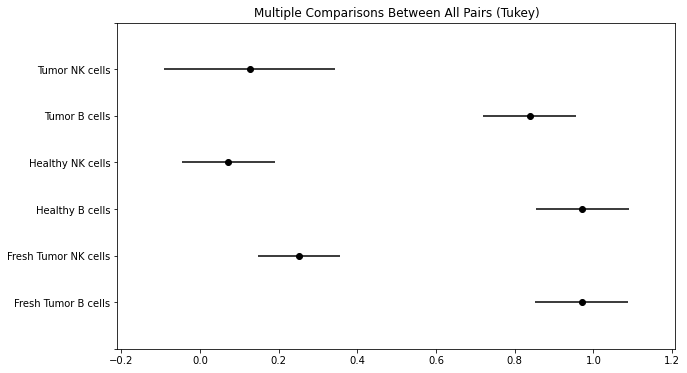

In [175]:
apply_tukey(Gene_MN = 'HLA-DRB5', Cell_Type = 'x', 
#Cell_Type = 'b', 
plot_show = 1, target_cluster = 1 ) 
tukey.summary()#pvalues[-1]

# `Dataframe From Tukey Test Result`

## Preprocessing

In [176]:
def nkk_b_ll(p_value = 0.05, target_cluster = 1): 
    global tukey_filtered_NK, tukey_filtered_B ,tukey_filtered,  nk_ll , b_ll , t_ll , NK_tukey , BB_tukey , TT_tukey, will_drop_nk , will_drop_b , nn, bb , tt
    nk_ll = {}
    b_ll = {}
    t_ll = {} 
    for j in ['B','NK', 'X']:
        if j == 'B': 
            for i in list(B_Total_Concatted.columns ):
                apply_tukey(Gene_MN = i, Cell_Type = j, plot_show = 0, target_cluster = target_cluster )
                b_ll[f'{i}'] = (tukey.pvalues[-1] ) 
        if j == 'NK': 
            for i in list(NK_Total_Concatted.columns ):
                apply_tukey(Gene_MN = i, Cell_Type = j, plot_show = 0, target_cluster = target_cluster )
                nk_ll[f'{i}'] = (tukey.pvalues[-1] ) 
        if j =='X': 
            for i in list(Total_Concatted[-5:].columns ):
                apply_tukey(Gene_MN = i, Cell_Type = j, plot_show = 0 , target_cluster = target_cluster)
                t_ll[f'{i}'] = ( tukey.pvalues[-1] ) 
        
                
    nn,bb,tt = pd.DataFrame.from_dict(nk_ll,orient='index'), pd.DataFrame.from_dict(b_ll,orient='index') , pd.DataFrame.from_dict(t_ll,orient='index')
    nn,bb, tt  = nn.T, bb.T , tt.T 
    nn.index, bb.index , tt.index = ['p value NK: Within Each Other'] ,['p value B: Within Each Other'] ,['p value: Between Tumor Cells']
    NK_tukey = pd.concat([NK_Total_Concatted, nn ], axis = 0 ) 
    BB_tukey = pd.concat([B_Total_Concatted, bb ], axis = 0 ) 
    TT_tukey = pd.concat([Total_Concatted[-5:], tt ], axis = 0 ) 

    will_drop_nk = [] 
    will_drop_b = [] 
    will_drop_t = [] 
    tt_dnk = NK_tukey.copy() 
    tt_db = BB_tukey.copy() 
    tt_t = TT_tukey.copy() 
    for k,l in zip([NK_tukey , BB_tukey, TT_tukey ],range(3)):      
        for i,j in zip((k.loc[ [k.index[-1] ],:] <= p_value ).iloc[0]  ,(k.loc[ [k.index[-1] ],:] <= p_value )):
            if i == False and l == 0:  
                will_drop_nk.append(j) 
            elif i == False and l ==1:
                will_drop_b.append(j) 
            elif i == False and l ==2:
                will_drop_t.append(j) 
    tukey_filtered_NK = tt_dnk.drop( columns = will_drop_nk )      
    tukey_filtered_B = tt_db.drop( columns = will_drop_b )    
    tukey_filtered = tt_t.drop( columns = will_drop_t )      



## Application

In [177]:
nkk_b_ll(p_value = 1)

/mnt/4AB6E404B6E3EE7F/Users/Ubuntu_2/Anaconda_3/envs/test_env17/lib/python3.8/site-packages/statsmodels/sandbox/stats/multicomp.py:1292: RuntimeWarning: divide by zero encountered in true_divide
  st_range = np.abs(meandiffs) / std_pairs #studentized range statistic
/mnt/4AB6E404B6E3EE7F/Users/Ubuntu_2/Anaconda_3/envs/test_env17/lib/python3.8/site-packages/statsmodels/sandbox/stats/multicomp.py:1292: RuntimeWarning: invalid value encountered in true_divide
  st_range = np.abs(meandiffs) / std_pairs #studentized range statistic



NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.


In [178]:
total_tukey = pd.concat( [  tukey_filtered_B[:-1], tukey_filtered_NK[:-1],tukey_filtered_B[-1:],tukey_filtered_NK[-1:],tukey_filtered[-1:] ], axis = 0 ) 


# `Result` 
## Tabel II Code: 1957 

In [179]:
pd.concat( [  total_tukey[:2],total_tukey[7:11], total_tukey[-4:] ], axis = 0 )['NKG7']

Healthy B cells                  0.000000
Healthy B cells                  0.039548
Tumor B cells                    0.644737
Tumor B cells                    0.000000
Healthy NK cells                 1.000000
Healthy NK cells                 1.000000
Tumor NK cells                   0.966667
p value B: Within Each Other     0.001000
p value NK: Within Each Other    0.900000
p value: Between Tumor Cells     0.817059
Name: NKG7, dtype: float64

---
---
# Gene Look Up By Tukey Test
## `Common Genes Which Are Expressed Significantly In Both B and NK Cells, From Healthy To Tumor`
## `Genes In The Presentation`
## `Genes Which Are In The Mail`

## Preprocessing

In [180]:
c_fp_NK_genes = tukey_filtered_NK.columns [  (tukey_filtered_NK.columns).isin( list(tukey_filtered_B.columns)  ) ] 
c_fp_B_genes = tukey_filtered_B.columns [  (tukey_filtered_B.columns).isin( list(tukey_filtered_NK.columns)  ) ] 
c_fp_NK_genes == c_fp_B_genes

ttt = total_tukey[c_fp_NK_genes] 


Filter_CW_NK = tukey_filtered_NK.columns [  (tukey_filtered_NK.columns).isin( cw_genes ) ] 
Filter_CW_B = tukey_filtered_B.columns [  (tukey_filtered_B.columns).isin( cw_genes  ) ] 

Filter_W_NK = tukey_filtered_NK.columns [  (tukey_filtered_NK.columns).isin( wanted_genes) ] 
Filter_W_B = tukey_filtered_B.columns [  (tukey_filtered_B.columns).isin( wanted_genes ) ] 

Filter_W2_NK = tukey_filtered_NK.columns [  (tukey_filtered_NK.columns).isin( wanted_genes_2 ) ] 
Filter_W2_B = tukey_filtered_B.columns [  (tukey_filtered_B.columns).isin( wanted_genes_2  ) ] 


CW_ttt = ttt.columns [ (ttt.columns).isin(cw_genes) ] 
W_ttt = ttt.columns [ (ttt.columns).isin(wanted_genes) ] 
W2_ttt = ttt.columns [ (ttt.columns).isin(wanted_genes_2) ] 


In [181]:
print( 'Filter_CW_NK',len(Filter_CW_NK) ,'\n' ,'Filter_CW_B', len(Filter_CW_B)  ) 

print( 'Filter_W_NK', len(Filter_W_NK) ,'\n', 'Filter_W_B', len(Filter_W_NK)   )  

print( 'Filter_W2_NK', len(Filter_W2_NK) ,'\n', 'Filter_W2_B', len(Filter_W2_NK)   )  

print( 'c_fp_genes_CW', len(c_fp_NK_genes) ,'\n', 'c_fp_genes_W',len(c_fp_B_genes)   )  

Filter_CW_NK 10 
 Filter_CW_B 10
Filter_W_NK 9 
 Filter_W_B 9
Filter_W2_NK 10 
 Filter_W2_B 10
c_fp_genes_CW 108 
 c_fp_genes_W 108


In [182]:
def f_one(target_row = 6, dataframe = ttt[CW_ttt]): 
    d = dataframe.copy()
    dp = []
    for i in list(d.columns) : 
        f, p = f_oneway( d[f'{i}'].iloc[target_row:target_row+3], d[f'{i}'].iloc[target_row+9:target_row + 12] ) 
        dp.append(p) 
    dp
    f, p = f_oneway( d.iloc[target_row:target_row+3], d.iloc[target_row+9:target_row+12] ) 
    temp = {}
    for i,j in zip(d.columns,range(len(p))):
        temp[f'{i}'] = p[j] 
    d2 = pd.DataFrame.from_dict(temp  ,orient= 'index').T
    d2.index = [f'p_value: Difference Of {list(d.index)[target_row][:3]}. Cells']
    return d2 
f_one(target_row = 6)     

/mnt/4AB6E404B6E3EE7F/Users/Ubuntu_2/Anaconda_3/envs/test_env17/lib/python3.8/site-packages/scipy/stats/stats.py:3650: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


CD74     NKG7     CD79A      TCF7  \
p_value: Difference Of Tum. Cells  0.116967  0.02397  0.000295  0.983448   

                                     S100A9    S100A8  CD3D  CD3E  LAT  CD3G  
p_value: Difference Of Tum. Cells  0.471431  0.726446   NaN   NaN  NaN   NaN

# `Result`
## Table III Code: 1958
`p value` at the ned of the tables stands for differences between Tumor B and Tumor NK Cells

In [183]:
print('CW Genes:', np.array(cw_genes),'\nCommon:', CW_ttt)

CW Genes: ['CD74' 'NKG7' 'CD79A' 'TCF7' 'S100A9' 'S100A8' 'CD3D' 'CD3E' 'LAT' 'CD3G'] 
Common: Index(['CD74', 'NKG7', 'CD79A', 'TCF7', 'S100A9', 'S100A8', 'CD3D', 'CD3E',
       'LAT', 'CD3G'],
      dtype='object')


In [184]:
df_cw = pd.concat( [ ttt[CW_ttt] 
, f_one(dataframe = ttt[CW_ttt]) 
  ] , axis = 0) 
df_cw = df_cw.sort_values(by=df_cw.index[-2], axis=1, ascending = True)   
df_cw.sort_index(axis=1) 

/mnt/4AB6E404B6E3EE7F/Users/Ubuntu_2/Anaconda_3/envs/test_env17/lib/python3.8/site-packages/scipy/stats/stats.py:3650: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


CD3D      CD3E      CD3G      CD74  \
Healthy B cells                    0.000000  0.000000  0.000000  1.000000   
Healthy B cells                    0.090395  0.107345  0.062147  1.000000   
Healthy B cells                    0.000000  0.005848  0.000000  1.000000   
Fresh Tumor B cells                0.012500  0.000000  0.012500  0.000000   
Fresh Tumor B cells                0.016393  0.000000  0.000000  0.000000   
Fresh Tumor B cells                0.000000  0.000000  0.000000  0.000000   
Tumor B cells                      0.000000  0.000000  0.000000  1.000000   
Tumor B cells                      0.000000  0.000000  0.000000  1.000000   
Tumor B cells                      0.000000  0.000000  0.000000  1.000000   
Healthy NK cells                   0.014085  0.464789  0.000000  0.915493   
Healthy NK cells                   0.033898  0.644068  0.000000  0.881356   
Healthy NK cells                   0.210526  0.894737  0.157895  0.921053   
Fresh Tumor NK cells               0.036932  0.000000  0.011364  0.000000   
Fresh Tumor NK cells               0.192982  0.000000  0.078947  0.000000   
Fresh Tumor NK cells               0.060606  0.000000  0.030303  0.000000   
Tumor NK cells                     0.000000  0.000000  0.000000  0.862500   
Tumor NK cells                     0.000000  0.000000  0.000000  0.849162   
Tumor NK cells                     0.000000  0.000000  0.000000  1.000000   
p value B: Within Each Other       0.768307  0.734055  0.770606  0.603234   
p value NK: Within Each Other      0.731672  0.041095  0.787150  0.066662   
p value: Between Tumor Cells       0.001288  0.025580  0.001000  0.001000   
p_value: Difference Of Tum. Cells       NaN       NaN       NaN  0.116967   

                                      CD79A       LAT      NKG7    S100A8  \
Healthy B cells                    0.995192  0.004808  0.000000  0.019231   
Healthy B cells                    0.994350  0.067797  0.039548  0.005650   
Healthy B cells                    1.000000  0.000000  0.005848  0.000000   
Fresh Tumor B cells                0.950000  0.000000  0.012500  0.000000   
Fresh Tumor B cells                0.934426  0.000000  0.000000  0.000000   
Fresh Tumor B cells                0.967742  0.000000  0.032258  0.032258   
Tumor B cells                      0.990099  0.000000  0.009901  0.019802   
Tumor B cells                      0.763158  0.000000  0.644737  0.000000   
Tumor B cells                      0.964286  0.000000  0.000000  0.000000   
Healthy NK cells                   0.042254  0.619718  1.000000  0.000000   
Healthy NK cells                   0.033898  0.491525  1.000000  0.000000   
Healthy NK cells                   0.078947  0.447368  0.973684  0.078947   
Fresh Tumor NK cells               0.000000  0.000000  0.988636  0.005682   
Fresh Tumor NK cells               0.013158  0.000000  0.934211  0.008772   
Fresh Tumor NK cells               0.000000  0.000000  0.994949  0.010101   
Tumor NK cells                     0.004167  0.000000  0.958333  0.004167   
Tumor NK cells                     0.011173  0.000000  1.000000  0.027933   
Tumor NK cells                     0.066667  0.000000  0.966667  0.000000   
p value B: Within Each Other       0.001000  0.725022  0.001000  0.877386   
p value NK: Within Each Other      0.233294  0.004549  0.900000  0.900000   
p value: Between Tumor Cells       0.001000  0.001000  0.817059  0.001000   
p_value: Difference Of Tum. Cells  0.000295       NaN  0.023970  0.726446   

                                     S100A9      TCF7  
Healthy B cells                    0.009615  0.019231  
Healthy B cells                    0.022599  0.175141  
Healthy B cells                    0.000000  0.000000  
Fresh Tumor B cells                0.000000  0.062500  
Fresh Tumor B cells                0.000000  0.000000  
Fresh Tumor B cells                0.000000  0.000000  
Tumor B cells                      0.019802  0.029703  
Tumor B cells                      0.052632  0.

In [185]:
print('W Genes:', np.array(wanted_genes),'\nCommon:', W_ttt)

W Genes: ['CD79A' 'NKG7' 'HLA-DRA' 'HLA-DPB1' 'HLA-DQB1' 'HLA-DPA1' 'HLA-DRB5'
 'HLA-DRB1' 'HLA-DMA'] 
Common: Index(['HLA-DRB5', 'HLA-DPA1', 'HLA-DMA', 'HLA-DQB1', 'HLA-DRA', 'HLA-DRB1',
       'HLA-DPB1', 'NKG7', 'CD79A'],
      dtype='object')


In [186]:
df_w = pd.concat( [ ttt[W_ttt] 
, f_one(dataframe = ttt[W_ttt]) 
  ] , axis = 0) 
df_w = df_w.sort_values(by=df_w.index[-2], axis=1, ascending = True)  
df_w.sort_index(axis=1) 

CD79A   HLA-DMA  HLA-DPA1  HLA-DPB1  \
Healthy B cells                    0.995192  0.870192  1.000000  1.000000   
Healthy B cells                    0.994350  0.898305  1.000000  1.000000   
Healthy B cells                    1.000000  0.888889  0.994152  1.000000   
Fresh Tumor B cells                0.950000  0.700000  1.000000  0.975000   
Fresh Tumor B cells                0.934426  0.836066  1.000000  0.983607   
Fresh Tumor B cells                0.967742  0.967742  1.000000  1.000000   
Tumor B cells                      0.990099  0.861386  0.970297  0.950495   
Tumor B cells                      0.763158  0.881579  0.986842  0.934211   
Tumor B cells                      0.964286  0.500000  0.642857  0.714286   
Healthy NK cells                   0.042254  0.042254  0.267606  0.253521   
Healthy NK cells                   0.033898  0.016949  0.271186  0.338983   
Healthy NK cells                   0.078947  0.210526  0.526316  0.473684   
Fresh Tumor NK cells               0.000000  0.110795  0.335227  0.411932   
Fresh Tumor NK cells               0.013158  0.157895  0.469298  0.425439   
Fresh Tumor NK cells               0.000000  0.146465  0.510101  0.525253   
Tumor NK cells                     0.004167  0.183333  0.420833  0.350000   
Tumor NK cells                     0.011173  0.027933  0.184358  0.150838   
Tumor NK cells                     0.066667  0.566667  0.900000  0.733333   
p value B: Within Each Other       0.001000  0.900000  0.032687  0.006925   
p value NK: Within Each Other      0.233294  0.765918  0.515026  0.234039   
p value: Between Tumor Cells       0.001000  0.630909  0.001414  0.001000   
p_value: Difference Of Tum. Cells  0.000295  0.073407  0.200658  0.071895   

                                   HLA-DQB1   HLA-DRA  HLA-DRB1  HLA-DRB5  \
Healthy B cells                    0.966346  1.000000  1.000000  0.985577   
Healthy B cells                    0.932203  1.000000  1.000000  0.971751   
Healthy B cells                    0.912281  1.000000  1.000000  0.959064   
Fresh Tumor B cells                0.950000  1.000000  0.987500  0.912500   
Fresh Tumor B cells                1.000000  1.000000  1.000000  1.000000   
Fresh Tumor B cells                1.000000  1.000000  1.000000  1.000000   
Tumor B cells                      0.950495  1.000000  1.000000  0.940594   
Tumor B cells                      0.973684  0.986842  1.000000  0.894737   
Tumor B cells                      0.714286  0.857143  0.928571  0.678571   
Healthy NK cells                   0.084507  0.000000  0.070423  0.014085   
Healthy NK cells                   0.084746  0.033898  0.050847  0.016949   
Healthy NK cells                   0.105263  0.236842  0.263158  0.184211   
Fresh Tumor NK cells               0.113636  0.178977  0.201705  0.142045   
Fresh Tumor NK cells               0.179825  0.333333  0.368421  0.289474   
Fresh Tumor NK cells               0.257576  0.272727  0.388889  0.287879   
Tumor NK cells                     0.229167  0.191667  0.466667  0.308333   
Tumor NK cells                     0.089385  0.089385  0.122905  0.061453   
Tumor NK cells                     0.566667  0.566667  0.900000  0.733333   
p value B: Within Each Other       0.549199  0.001000  0.900000  0.275723   
p value NK: Within Each Other      0.900000  0.900000  0.900000  0.900000   
p value: Between Tumor Cells       0.057347  0.001000  0.001000  0.001000   
p_value: Difference Of Tum. Cells  0.023569  0.011916  0.101153  0.090999   

                                       NKG7  
Healthy B cells                    0.000000  
Healthy B cells                    0.039548  
Healthy B cells                    0.005848  
Fresh Tumor B cells                0.012500  
Fresh Tumor B cells                0.000000  
Fresh Tumor B cells                0.032258  
Tumor B cells                      0.009901  
Tumor B cells                      0.644737  
Tumor B cells                      0.000000  
Healthy NK cells                  

In [187]:
print('W2 Genes:', np.array(wanted_genes_2),'\nCommon:', W2_ttt)


W2 Genes: ['H2-AA' 'CD74' 'CD79A' 'LY6D' 'CD19' 'PAX5' 'LYZ2' 'LAT' 'CD3D' 'TCF7'
 'CD3E' 'CD3G' 'EIF3F' 'S100A9' 'S100A8' 'RAB2A' 'TMEM160' 'NKG7' 'TYROBP'
 'ACTGL' 'CTSD' 'KLRDL' 'SERPINA3F'] 
Common: Index(['CD74', 'NKG7', 'CD79A', 'TCF7', 'S100A9', 'S100A8', 'CD3D', 'CD3E',
       'LAT', 'CD3G'],
      dtype='object')


In [189]:
df_w2 = pd.concat( [ ttt[W2_ttt] 
, f_one(dataframe = ttt[W2_ttt]) 
  ] , axis = 0)
df_w2 = df_w2.sort_values(by=df_w2.index[-2], axis=1, ascending = True)  
df_w2.sort_index(axis=1) 

/mnt/4AB6E404B6E3EE7F/Users/Ubuntu_2/Anaconda_3/envs/test_env17/lib/python3.8/site-packages/scipy/stats/stats.py:3650: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


CD3D      CD3E      CD3G      CD74  \
Healthy B cells                    0.000000  0.000000  0.000000  1.000000   
Healthy B cells                    0.090395  0.107345  0.062147  1.000000   
Healthy B cells                    0.000000  0.005848  0.000000  1.000000   
Fresh Tumor B cells                0.012500  0.000000  0.012500  0.000000   
Fresh Tumor B cells                0.016393  0.000000  0.000000  0.000000   
Fresh Tumor B cells                0.000000  0.000000  0.000000  0.000000   
Tumor B cells                      0.000000  0.000000  0.000000  1.000000   
Tumor B cells                      0.000000  0.000000  0.000000  1.000000   
Tumor B cells                      0.000000  0.000000  0.000000  1.000000   
Healthy NK cells                   0.014085  0.464789  0.000000  0.915493   
Healthy NK cells                   0.033898  0.644068  0.000000  0.881356   
Healthy NK cells                   0.210526  0.894737  0.157895  0.921053   
Fresh Tumor NK cells               0.036932  0.000000  0.011364  0.000000   
Fresh Tumor NK cells               0.192982  0.000000  0.078947  0.000000   
Fresh Tumor NK cells               0.060606  0.000000  0.030303  0.000000   
Tumor NK cells                     0.000000  0.000000  0.000000  0.862500   
Tumor NK cells                     0.000000  0.000000  0.000000  0.849162   
Tumor NK cells                     0.000000  0.000000  0.000000  1.000000   
p value B: Within Each Other       0.768307  0.734055  0.770606  0.603234   
p value NK: Within Each Other      0.731672  0.041095  0.787150  0.066662   
p value: Between Tumor Cells       0.001288  0.025580  0.001000  0.001000   
p_value: Difference Of Tum. Cells       NaN       NaN       NaN  0.116967   

                                      CD79A       LAT      NKG7    S100A8  \
Healthy B cells                    0.995192  0.004808  0.000000  0.019231   
Healthy B cells                    0.994350  0.067797  0.039548  0.005650   
Healthy B cells                    1.000000  0.000000  0.005848  0.000000   
Fresh Tumor B cells                0.950000  0.000000  0.012500  0.000000   
Fresh Tumor B cells                0.934426  0.000000  0.000000  0.000000   
Fresh Tumor B cells                0.967742  0.000000  0.032258  0.032258   
Tumor B cells                      0.990099  0.000000  0.009901  0.019802   
Tumor B cells                      0.763158  0.000000  0.644737  0.000000   
Tumor B cells                      0.964286  0.000000  0.000000  0.000000   
Healthy NK cells                   0.042254  0.619718  1.000000  0.000000   
Healthy NK cells                   0.033898  0.491525  1.000000  0.000000   
Healthy NK cells                   0.078947  0.447368  0.973684  0.078947   
Fresh Tumor NK cells               0.000000  0.000000  0.988636  0.005682   
Fresh Tumor NK cells               0.013158  0.000000  0.934211  0.008772   
Fresh Tumor NK cells               0.000000  0.000000  0.994949  0.010101   
Tumor NK cells                     0.004167  0.000000  0.958333  0.004167   
Tumor NK cells                     0.011173  0.000000  1.000000  0.027933   
Tumor NK cells                     0.066667  0.000000  0.966667  0.000000   
p value B: Within Each Other       0.001000  0.725022  0.001000  0.877386   
p value NK: Within Each Other      0.233294  0.004549  0.900000  0.900000   
p value: Between Tumor Cells       0.001000  0.001000  0.817059  0.001000   
p_value: Difference Of Tum. Cells  0.000295       NaN  0.023970  0.726446   

                                     S100A9      TCF7  
Healthy B cells                    0.009615  0.019231  
Healthy B cells                    0.022599  0.175141  
Healthy B cells                    0.000000  0.000000  
Fresh Tumor B cells                0.000000  0.062500  
Fresh Tumor B cells                0.000000  0.000000  
Fresh Tumor B cells                0.000000  0.000000  
Tumor B cells                      0.019802  0.029703  
Tumor B cells                      0.052632  0.

#
---

In [188]:
temp = []
for i in W_ttt:
  if i not in cw_genes and i not in wanted_genes_2:
    temp.append(i)
WC_ttt =  temp   

df_w = pd.concat( [ ttt[WC_ttt] 
, f_one(dataframe = ttt[WC_ttt]) 
  ] , axis = 0) 
df_w = df_w.sort_values(by=df_w.index[-2], axis=1, ascending = True)  
df_w.sort_index(axis=1) 

HLA-DMA  HLA-DPA1  HLA-DPB1  HLA-DQB1  \
Healthy B cells                    0.870192  1.000000  1.000000  0.966346   
Healthy B cells                    0.898305  1.000000  1.000000  0.932203   
Healthy B cells                    0.888889  0.994152  1.000000  0.912281   
Fresh Tumor B cells                0.700000  1.000000  0.975000  0.950000   
Fresh Tumor B cells                0.836066  1.000000  0.983607  1.000000   
Fresh Tumor B cells                0.967742  1.000000  1.000000  1.000000   
Tumor B cells                      0.861386  0.970297  0.950495  0.950495   
Tumor B cells                      0.881579  0.986842  0.934211  0.973684   
Tumor B cells                      0.500000  0.642857  0.714286  0.714286   
Healthy NK cells                   0.042254  0.267606  0.253521  0.084507   
Healthy NK cells                   0.016949  0.271186  0.338983  0.084746   
Healthy NK cells                   0.210526  0.526316  0.473684  0.105263   
Fresh Tumor NK cells               0.110795  0.335227  0.411932  0.113636   
Fresh Tumor NK cells               0.157895  0.469298  0.425439  0.179825   
Fresh Tumor NK cells               0.146465  0.510101  0.525253  0.257576   
Tumor NK cells                     0.183333  0.420833  0.350000  0.229167   
Tumor NK cells                     0.027933  0.184358  0.150838  0.089385   
Tumor NK cells                     0.566667  0.900000  0.733333  0.566667   
p value B: Within Each Other       0.900000  0.032687  0.006925  0.549199   
p value NK: Within Each Other      0.765918  0.515026  0.234039  0.900000   
p value: Between Tumor Cells       0.630909  0.001414  0.001000  0.057347   
p_value: Difference Of Tum. Cells  0.073407  0.200658  0.071895  0.023569   

                                    HLA-DRA  HLA-DRB1  HLA-DRB5  
Healthy B cells                    1.000000  1.000000  0.985577  
Healthy B cells                    1.000000  1.000000  0.971751  
Healthy B cells                    1.000000  1.000000  0.959064  
Fresh Tumor B cells                1.000000  0.987500  0.912500  
Fresh Tumor B cells                1.000000  1.000000  1.000000  
Fresh Tumor B cells                1.000000  1.000000  1.000000  
Tumor B cells                      1.000000  1.000000  0.940594  
Tumor B cells                      0.986842  1.000000  0.894737  
Tumor B cells                      0.857143  0.928571  0.678571  
Healthy NK cells                   0.000000  0.070423  0.014085  
Healthy NK cells                   0.033898  0.050847  0.016949  
Healthy NK cells                   0.236842  0.263158  0.184211  
Fresh Tumor NK cells               0.178977  0.201705  0.142045  
Fresh Tumor NK cells               0.333333  0.368421  0.289474  
Fresh Tumor NK cells               0.272727  0.388889  0.287879  
Tumor NK cells                     0.191667  0.466667  0.308333  
Tumor NK cells                     0.089385  0.122905  0.061453  
Tumor NK cells                     0.566667  0.900000  0.733333  
p value B: Within Each Other       0.001000  0.900000  0.275723  
p value NK: Within Each Other      0.900000  0.900000  0.900000  
p value: Between Tumor Cells       0.001000  0.001000  0.001000  
p_value: Difference Of Tum. Cells  0.011916  0.101153  0.090999

In [189]:
total_wg = wanted_genes_2 
for i in cw_genes:
    if i not in wanted_genes_2:
        total_wg.append(i)
WT_ttt = ttt.columns [ (ttt.columns).isin(total_wg) ] 

df_wT = pd.concat( [ ttt[WT_ttt] 
, f_one(dataframe = ttt[WT_ttt]) 
  ] , axis = 0)
df_wT = df_wT.sort_values(by=df_wT.index[-2], axis=1, ascending = True)  
df_wT.sort_index(axis=1) 


/mnt/4AB6E404B6E3EE7F/Users/Ubuntu_2/Anaconda_3/envs/test_env17/lib/python3.8/site-packages/scipy/stats/stats.py:3650: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


CD3D      CD3E      CD3G      CD74  \
Healthy B cells                    0.000000  0.000000  0.000000  1.000000   
Healthy B cells                    0.090395  0.107345  0.062147  1.000000   
Healthy B cells                    0.000000  0.005848  0.000000  1.000000   
Fresh Tumor B cells                0.012500  0.000000  0.012500  0.000000   
Fresh Tumor B cells                0.016393  0.000000  0.000000  0.000000   
Fresh Tumor B cells                0.000000  0.000000  0.000000  0.000000   
Tumor B cells                      0.000000  0.000000  0.000000  1.000000   
Tumor B cells                      0.000000  0.000000  0.000000  1.000000   
Tumor B cells                      0.000000  0.000000  0.000000  1.000000   
Healthy NK cells                   0.014085  0.464789  0.000000  0.915493   
Healthy NK cells                   0.033898  0.644068  0.000000  0.881356   
Healthy NK cells                   0.210526  0.894737  0.157895  0.921053   
Fresh Tumor NK cells               0.036932  0.000000  0.011364  0.000000   
Fresh Tumor NK cells               0.192982  0.000000  0.078947  0.000000   
Fresh Tumor NK cells               0.060606  0.000000  0.030303  0.000000   
Tumor NK cells                     0.000000  0.000000  0.000000  0.862500   
Tumor NK cells                     0.000000  0.000000  0.000000  0.849162   
Tumor NK cells                     0.000000  0.000000  0.000000  1.000000   
p value B: Within Each Other       0.768307  0.734055  0.770606  0.603234   
p value NK: Within Each Other      0.731672  0.041095  0.787150  0.066662   
p value: Between Tumor Cells       0.001288  0.025580  0.001000  0.001000   
p_value: Difference Of Tum. Cells       NaN       NaN       NaN  0.116967   

                                      CD79A       LAT      NKG7    S100A8  \
Healthy B cells                    0.995192  0.004808  0.000000  0.019231   
Healthy B cells                    0.994350  0.067797  0.039548  0.005650   
Healthy B cells                    1.000000  0.000000  0.005848  0.000000   
Fresh Tumor B cells                0.950000  0.000000  0.012500  0.000000   
Fresh Tumor B cells                0.934426  0.000000  0.000000  0.000000   
Fresh Tumor B cells                0.967742  0.000000  0.032258  0.032258   
Tumor B cells                      0.990099  0.000000  0.009901  0.019802   
Tumor B cells                      0.763158  0.000000  0.644737  0.000000   
Tumor B cells                      0.964286  0.000000  0.000000  0.000000   
Healthy NK cells                   0.042254  0.619718  1.000000  0.000000   
Healthy NK cells                   0.033898  0.491525  1.000000  0.000000   
Healthy NK cells                   0.078947  0.447368  0.973684  0.078947   
Fresh Tumor NK cells               0.000000  0.000000  0.988636  0.005682   
Fresh Tumor NK cells               0.013158  0.000000  0.934211  0.008772   
Fresh Tumor NK cells               0.000000  0.000000  0.994949  0.010101   
Tumor NK cells                     0.004167  0.000000  0.958333  0.004167   
Tumor NK cells                     0.011173  0.000000  1.000000  0.027933   
Tumor NK cells                     0.066667  0.000000  0.966667  0.000000   
p value B: Within Each Other       0.001000  0.725022  0.001000  0.877386   
p value NK: Within Each Other      0.233294  0.004549  0.900000  0.900000   
p value: Between Tumor Cells       0.001000  0.001000  0.817059  0.001000   
p_value: Difference Of Tum. Cells  0.000295       NaN  0.023970  0.726446   

                                     S100A9      TCF7  
Healthy B cells                    0.009615  0.019231  
Healthy B cells                    0.022599  0.175141  
Healthy B cells                    0.000000  0.000000  
Fresh Tumor B cells                0.000000  0.062500  
Fresh Tumor B cells                0.000000  0.000000  
Fresh Tumor B cells                0.000000  0.000000  
Tumor B cells                      0.019802  0.029703  
Tumor B cells                      0.052632  0.

In [195]:
ttt = ttt.sort_values(by=ttt.index[-1], axis=1, ascending = False)  
print(ttt.columns[:20])
ttt

Index(['SWAP70', 'BCL11A', 'RHOH', 'CXCR4', 'MZB1', 'HVCN1', 'SERPINA1',
       'CCL4', 'DUSP2', 'TNFAIP3', 'IL32', 'CD8A', 'CREM', 'CD83', 'CXCL8',
       'ETV6', 'RNASE6', 'CD40', 'LCK', 'FKBP11'],
      dtype='object')


SWAP70    BCL11A      RHOH     CXCR4  \
Healthy B cells                0.764423  0.360577  0.658654  0.658654   
Healthy B cells                0.796610  0.338983  0.536723  0.480226   
Healthy B cells                0.754386  0.403509  0.730994  0.742690   
Fresh Tumor B cells            0.550000  0.000000  0.000000  0.000000   
Fresh Tumor B cells            0.524590  0.000000  0.000000  0.000000   
Fresh Tumor B cells            0.483871  0.000000  0.000000  0.000000   
Tumor B cells                  0.000000  0.000000  0.000000  0.000000   
Tumor B cells                  0.000000  0.000000  0.000000  0.000000   
Tumor B cells                  0.000000  0.000000  0.000000  0.000000   
Healthy NK cells               0.070423  0.000000  0.169014  0.056338   
Healthy NK cells               0.050847  0.000000  0.237288  0.288136   
Healthy NK cells               0.184211  0.026316  0.263158  0.315789   
Fresh Tumor NK cells           0.036932  0.000000  0.000000  0.000000   
Fresh Tumor NK cells           0.078947  0.000000  0.000000  0.000000   
Fresh Tumor NK cells           0.050505  0.000000  0.000000  0.000000   
Tumor NK cells                 0.000000  0.000000  0.000000  0.000000   
Tumor NK cells                 0.000000  0.000000  0.000000  0.000000   
Tumor NK cells                 0.000000  0.000000  0.000000  0.000000   
p value B: Within Each Other   0.001000  0.001000  0.002905  0.010018   
p value NK: Within Each Other  0.324096  0.763594  0.010755  0.254347   
p value: Between Tumor Cells   0.900000  0.900000  0.900000  0.900000   

                                   MZB1     HVCN1  SERPINA1      CCL4  \
Healthy B cells                0.331731  0.846154  0.000000  0.038462   
Healthy B cells                0.293785  0.672316  0.000000  0.005650   
Healthy B cells                0.251462  0.847953  0.000000  0.017544   
Fresh Tumor B cells            0.150000  0.375000  0.037500  0.212500   
Fresh Tumor B cells            0.180328  0.426230  0.098361  0.196721   
Fresh Tumor B cells            0.096774  0.709677  0.032258  0.322581   
Tumor B cells                  0.267327  0.772277  0.009901  0.118812   
Tumor B cells                  0.171053  0.578947  0.013158  0.868421   
Tumor B cells                  0.178571  0.428571  0.000000  0.107143   
Healthy NK cells               0.014085  0.070423  0.000000  0.845070   
Healthy NK cells               0.033898  0.033898  0.000000  0.779661   
Healthy NK cells               0.052632  0.184211  0.000000  0.263158   
Fresh Tumor NK cells           0.150568  0.048295  0.025568  0.980114   
Fresh Tumor NK cells           0.096491  0.061404  0.026316  0.881579   
Fresh Tumor NK cells           0.141414  0.055556  0.065657  1.000000   
Tumor NK cells                 0.016667  0.058333  0.016667  0.895833   
Tumor NK cells                 0.000000  0.083799  0.000000  0.877095   
Tumor NK cells                 0.000000  0.033333  0.000000  1.000000   
p value B: Within Each Other   0.129412  0.492981  0.899190  0.001000   
p value NK: Within Each Other  0.524209  0.900000  0.900000  0.649143   
p value: Between Tumor Cells   0.900000  0.900000  0.900000  0.900000   

                                  DUSP2   TNFAIP3  ...      CD38      CD14  \
Healthy B cells                0.360577  0.197115  ...  0.129808  0.000000   
Healthy B cells                0.694915  0.401130  ...  0.073446  0.005650   
Healthy B cells                0.783626  0.269006  ...  0.128655  0.000000   
Fresh Tumor B cells            0.000000  0.000000  ...  0.087500  0.000000   
Fresh Tumor B cells            0.000000  0.000000  ...  0.196721  0.032787   
Fresh Tumor B cells            0.000000  0.000000  ...  0.225806  0.032258   
Tumor B cells                  0.396040  0.000000  ...  0.059406  0.019802   
Tumor B cells                  0.921053  0.000000  ...  0.131579  0.065789   
Tumor B cells                  0.285714  0.000000  ...  0.071429  0.000000   
Healthy NK cells               0.295775

In [196]:
ttt = ttt.sort_values(by=ttt.index[-1], axis=1, ascending = True)  
print(ttt.columns[:20])
ttt 

Index(['HLA-DRB5', 'PLSCR1', 'CD2', 'HLA-DPB1', 'FOXP1', 'LAT', 'CD3G',
       'HLA-DRA', 'CD74', 'S100B', 'CD247', 'IFIT3', 'HLA-DRB1', 'VCAN',
       'RASGRP2', 'BIRC3', 'CSF3R', 'HLA-DQA1', 'S100A8', 'CD79A'],
      dtype='object')


HLA-DRB5    PLSCR1       CD2  HLA-DPB1  \
Healthy B cells                0.985577  0.062500  0.000000  1.000000   
Healthy B cells                0.971751  0.124294  0.073446  1.000000   
Healthy B cells                0.959064  0.099415  0.000000  1.000000   
Fresh Tumor B cells            0.912500  0.000000  0.012500  0.975000   
Fresh Tumor B cells            1.000000  0.000000  0.000000  0.983607   
Fresh Tumor B cells            1.000000  0.000000  0.032258  1.000000   
Tumor B cells                  0.940594  0.049505  0.000000  0.950495   
Tumor B cells                  0.894737  0.171053  0.000000  0.934211   
Tumor B cells                  0.678571  0.107143  0.000000  0.714286   
Healthy NK cells               0.014085  0.225352  0.436620  0.253521   
Healthy NK cells               0.016949  0.118644  0.559322  0.338983   
Healthy NK cells               0.184211  0.210526  0.526316  0.473684   
Fresh Tumor NK cells           0.142045  0.000000  0.494318  0.411932   
Fresh Tumor NK cells           0.289474  0.000000  0.605263  0.425439   
Fresh Tumor NK cells           0.287879  0.000000  0.540404  0.525253   
Tumor NK cells                 0.308333  0.100000  0.000000  0.350000   
Tumor NK cells                 0.061453  0.089385  0.000000  0.150838   
Tumor NK cells                 0.733333  0.200000  0.000000  0.733333   
p value B: Within Each Other   0.275723  0.084705  0.787276  0.006925   
p value NK: Within Each Other  0.900000  0.221859  0.004004  0.234039   
p value: Between Tumor Cells   0.001000  0.001000  0.001000  0.001000   

                                  FOXP1       LAT      CD3G   HLA-DRA  \
Healthy B cells                0.000000  0.004808  0.000000  1.000000   
Healthy B cells                0.000000  0.067797  0.062147  1.000000   
Healthy B cells                0.000000  0.000000  0.000000  1.000000   
Fresh Tumor B cells            0.000000  0.000000  0.012500  1.000000   
Fresh Tumor B cells            0.000000  0.000000  0.000000  1.000000   
Fresh Tumor B cells            0.000000  0.000000  0.000000  1.000000   
Tumor B cells                  0.495050  0.000000  0.000000  1.000000   
Tumor B cells                  0.565789  0.000000  0.000000  0.986842   
Tumor B cells                  0.392857  0.000000  0.000000  0.857143   
Healthy NK cells               0.000000  0.619718  0.000000  0.000000   
Healthy NK cells               0.000000  0.491525  0.000000  0.033898   
Healthy NK cells               0.000000  0.447368  0.157895  0.236842   
Fresh Tumor NK cells           0.000000  0.000000  0.011364  0.178977   
Fresh Tumor NK cells           0.000000  0.000000  0.078947  0.333333   
Fresh Tumor NK cells           0.000000  0.000000  0.030303  0.272727   
Tumor NK cells                 0.204167  0.000000  0.000000  0.191667   
Tumor NK cells                 0.173184  0.000000  0.000000  0.089385   
Tumor NK cells                 0.366667  0.000000  0.000000  0.566667   
p value B: Within Each Other   0.001000  0.725022  0.770606  0.001000   
p value NK: Within Each Other  0.001000  0.004549  0.787150  0.900000   
p value: Between Tumor Cells   0.001000  0.001000  0.001000  0.001000   

                                   CD74     S100B  ...     TRBC2     IL2RB  \
Healthy B cells                1.000000  0.000000  ...  0.663462  0.000000   
Healthy B cells                1.000000  0.000000  ...  0.587571  0.011299   
Healthy B cells                1.000000  0.000000  ...  0.660819  0.000000   
Fresh Tumor B cells            0.000000  0.000000  ...  0.000000  0.000000   
Fresh Tumor B cells            0.000000  0.000000  ...  0.000000  0.000000   
Fresh Tumor B cells            0.000000  0.000000  ...  0.000000  0.000000   
Tumor B cells                  1.000000  0.000000  ...  0.000000  0.019802   
Tumor B cells                  1.000000  0.013158  ...  0.000000  0.526316   
Tumor B cells                  1.000000  0.000000  ...  0.000000  0.071429   
Healthy NK cells               0.9154

---

## `Break Point 10`

In [192]:
break_command = break_command # +1 # To Move On Add 1 To `break_command`

while break_command in [10]:  
    sys.exit()  

SystemExit: 

/mnt/4AB6E404B6E3EE7F/Users/Ubuntu_2/Anaconda_3/envs/test_env17/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3425: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


## Save Annotated Data

In [ ]:
adata.write('data_annotated.h5ad') 
sys.exit() 

SystemExit: 

/mnt/4AB6E404B6E3EE7F/Users/Ubuntu_2/Anaconda_3/envs/test_env17/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3425: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)



# Finished
---
---

---
---
.:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:.
# `Gene Marker Sections`
### This section's variables & functions are already loaded in the `Reading Dataset` part
### These sections are added to here for only quick look; otherwise you may by pass it.
---
---

# Gene Markers Section
`Outline:`

* Gene Marker List In The Mail

* Gene Markers From https://panglaodb.se

* Table Of Number Of Gene Markers 
.
---
## You can also call them as they already introduced from `gene_markers`
## However, if you want, you can change options of it from here and redefine. 

# `*` Results Show Arranging
### `Decide` Whether To Show Results
### `result_show_GM == 2` Not By Passing This Section
### `result_show_GM == 1` Means Show Results
### `result_show_GM == 0` Means Do Not Show Results

In [ ]:
result_show_GM = 0

---
---
.
# Gene Marker List From `The Mail` Part I
## Define Dataframe Of Gene Marker List
### Tasks:
* `Define Your Dataset Directory`

* `Choose your OS`

## Setup Module/s
### xlrd & openpyxl
(If needed)

In [ ]:
#conda install xlrd

In [ ]:
#conda install openpyxl

## Defining Gene Marker List
### Tasks:
* `Define Your Dataset Directory`

* `Choose your OS`

In [ ]:
if result_show_GM == 2:
    # Windows 
    #inside = r'C:\Users\Asus\Desktop\Internship File' 
    #excel_file = nameD(inside) 
    # Ubuntu 
    inside = r'/mnt/4AB6E404B6E3EE7F/Users/Asus/Desktop/Internship File/' 
    excel_file = nameD(inside) 

    df = pd.read_excel(excel_file+'/Core_File.xlsx', sheet_name='Gene Marker List',header=1) # can also index sheet by name or fetch all sheets 
    Gene_Marker_List = df[['Lineage ', 'Gene name ']]  
    Gene_Marker_List.columns =['Lineage', 'Gene_Names'] 

# Result

In [ ]:
if result_show_GM == 1:
    print(Gene_Marker_List)
else:
    pass

---
.
# Gene Marker List From `The Mail` Part II

## Finding common genes between main data and gene marker list

### Defining Dataframe Of Common Genes

In [ ]:
if result_show_GM == 2:
    common =[] 
    for i in Gene_Marker_List['Gene_Names']: 
        if i in adata.var.index: 
            common.append(i) 
    common 
    commonD = pd.DataFrame(columns=['Lineage', 'Gene_Names'] ) 
    for i,j in zip(Gene_Marker_List['Gene_Names'], Gene_Marker_List['Lineage']): 
        if i in common :
            dictD = { 'Gene_Names': i, 'Lineage': j } #commonD.append(pd.DataFrame({'Gene name ': i, "Lineage ": j })) 
            #print(dictD)
            commonD = commonD.append(dictD,ignore_index=True) 

### Arranging Column Names

In [ ]:
if result_show_GM == 2:
    commonD.columns =['cell type','official gene symbol']
    commonD = pd.concat([commonD['official gene symbol'], commonD['cell type'] ],axis=1)

### Arranging Index Names

In [ ]:
if result_show_GM == 2:
    commonD = commonD.rename(index={'NK cell':'NK cells','B cell':'B cells'}) 

In [ ]:
if result_show_GM == 2:
    commonD 

# Result

In [ ]:
if result_show_GM == 1:
    print(commonD[:3])
else:
    pass

---
# Gene Marker List From `The Mail` Part III
## Numbers of Total Markers Of `The Mail` & Markers in `adata`
* Names of columns of different gene markers are fixed for compatbility with Gene Markers from https://panglaodb.se 

* Table of total marker of genes in `the mail` and common ones in `adata`

### Setup Module/s

In [ ]:
if result_show_GM == 2:
    from collections import Counter

### Total Markers

In [ ]:
if result_show_GM == 2:
    Gene_Marker_List['Lineage']
    #Gene_Marker_List['Lineage'].Lineage.replace(['NK cell', 'B cell'], ['NK cells', 'B cells'], inplace=True)

    Gene_Marker_List = Gene_Marker_List.replace('NK cell','NK cells')

    Gene_Marker_List = Gene_Marker_List.replace('B cell','B cells')
        

In [ ]:
if result_show_GM == 2:
    count = Counter(Gene_Marker_List['Lineage'])
    Total_Gene_Marker_In_Mail = pd.DataFrame.from_dict((count) , orient='index')
    Total_Gene_Marker_In_Mail.columns = ['Total Markers of Genes In Mail']

### Number of Common Markers In `adata`

In [ ]:
if result_show_GM == 2:
    count = Counter(commonD['cell type'])
    commondDN = pd.DataFrame.from_dict((count) , orient='index', columns=['Common Markers W `adata`'] )  #columns= ['Common Markers W `adata`','a'])#
    commondDN 

### Table of Markers In Mail & `adata`

In [ ]:
if result_show_GM == 2:
    Number_of_Genes_Mail = pd.concat([Total_Gene_Marker_In_Mail,commondDN], axis=1)

# Result

In [ ]:
if result_show_GM == 1:
    print(Number_of_Genes_Mail)
else:
    pass

---
---
.
# Gene Markers From `https://panglaodb.se` Part I
## Define Dataframe Of Gene Marker List
### Tasks:
* `Define Your Dataset Directory`

* `Choose your OS`

* `Threshold Deciding`

## Part I
## Defining Gene Marker List
* `Define Your Dataset Directory`
* `Choose your OS`


### Defining
### Tasks:
`Define Your Dataset Directory`

`Choose your OS`

In [ ]:
if result_show_GM == 2:
    # Windows
    # inside = r'/mnt/4AB6E404B6E3EE7F/Users/Asus/Desktop/Internship File/data/Markers' 
    # file_path_y = nameD(inside) 
    # Ubuntu
    inside = r'/mnt/4AB6E404B6E3EE7F/Users/Asus/Desktop/Internship File/data/Markers' 
    file_path_y = nameD(inside) 

In [ ]:
if result_show_GM == 2:
    gene_list = pd.read_csv( file_path_y + '/B cells/PanglaoDB_markers_27_Mar_2020.tsv', delimiter="\t" ) 


In [ ]:
if result_show_GM == 2:
    len(np.unique(gene_list['cell type']))

## Part II
## Subsetting the Gene Marker Dataset
As this gene marker dataset consist of various genes from different cell types in different features, we need to filter out
### Task/s:
* `Threshold Deciding`

### Gene Marker Dataframe

In [ ]:
if result_show_GM == 2:
    gene_list[:3] 

### Arranging Threshold

In [ ]:
if result_show_GM == 2:
    gene_list['ubiquitousness index']

### Threshold Decider

In [ ]:
if result_show_GM == 2:
    a = pd.Series(gene_list['ubiquitousness index'])
    fig, ax = plt.subplots(figsize =(10, 7))
    ax.hist(a, bins=1000)
    # Show plot
    plt.show()

In [ ]:
if result_show_GM == 2:
    b = pd.Series(gene_list['sensitivity_human'])
    fig, ax = plt.subplots(figsize =(10, 7))
    ax.hist(b, bins=100)
    # Show plot
    plt.show()

### Threshold Decided
### Task/s:
`Threshold Deciding`

In [ ]:
if result_show_GM == 2:
    Threshold_U = 0.01
    Threshold_S = 0.05
    gene_list = gene_list[gene_list['ubiquitousness index'] >= Threshold_U]
    gene_list = gene_list[gene_list['sensitivity_human'] >= Threshold_S]
    df = pd.concat([ gene_list['official gene symbol'],  gene_list['organ'], gene_list['cell type'], gene_list['sensitivity_human']], axis= 1)#.dropna()

# Result

In [ ]:
if result_show_GM == 1:
    print(df)
else:
    pass

- - - 
.
# Gene Markers From `https://panglaodb.se` Part II
## Define Dataframe of Subsetted Gene Markers Of Selected Cell Types
### Tasks: 
* `Subsetting Gene Markers According to Cell Types You Would Like To Investigate From This Marker Dataset`

* `Selecting Cell Types You Would Like To Investigate From This Marker Dataset`

## Getting Gene Markers Of Target Cell Types (Dataframes)
### Task/s:
`Subsetting Gene Markers According to Cell Types You Would Like To Investigate From This Marker Dataset`

### Defining Subsets Of Gene Markers Of Cell Types Of Interest Part I

In [ ]:
if result_show_GM == 2:
    b_gene_markers = df[df['cell type'] == 'B cells']
    b_memory_gene_markers = df[df['cell type'] == 'B cells naive']
    b_naive_gene_markers = df[df['cell type'] == 'B cells memory']
    d_gene_markers = df[df['cell type'] == 'Dendritic cells']
    iNKT_gene_markers = df[df['cell type'] == 'Natural killer T cells']
    mega_gene_markers = df[df['cell type'] == 'Megakaryocytes']
    mono_gene_markers = df[df['cell type'] == 'Monocytes']
    nk_gene_markers = df[df['cell type'] == 'NK cells']
    t_gene_markers = df[df['cell type'] == 'T cells']
    t_helper_gene_markers = df[df['cell type'] == 'T helper cells']
    t_memory_gene_markers = df[df['cell type'] == 'T memory cells']

### Defining Subsets Of Gene Markers Of Cell Types Of Interest Part II
`Subsetting Gene Markers According to Cell Types You Would Like To Investigate From This Marker Dataset`

In [ ]:
if result_show_GM == 2:
    markers_1 = [b_gene_markers, nk_gene_markers,b_memory_gene_markers ,b_naive_gene_markers,iNKT_gene_markers ,t_gene_markers ,t_helper_gene_markers ,t_memory_gene_markers ]
    markers_2 = [d_gene_markers ,mega_gene_markers ,mono_gene_markers] 
    markers = markers_1 + markers_2

## Getting Gene Markers Of Target Cell Types (Subsetted Names)
### Task/s:
`Selecting Cell Types You Would Like To Investigate From This Marker Dataset`

### Selecting Cell Types

In [ ]:
if result_show_GM == 2:
    cell_type_of_interest_1 = ['B cells', 'NK cells', 'B cells memory','B cells naive', 'Natural killer T cells', 'T cells','T helper cells','T memory cells'] 
    cell_type_of_interest_2 = ['Dendritic cells','Megakaryocytes','Monocytes'] 

    cell_type_of_interest = cell_type_of_interest_1 + cell_type_of_interest_2 

In [ ]:
if result_show_GM == 2:
    def cell_type_selection(number=8):
        global cell_type_of_interest
        cell_type_of_interest = cell_type_of_interest[:number]

### Defining Dataframe of Cell Types of Interests

In [ ]:
if result_show_GM == 2:
    df_database = df[ df['cell type'].isin(cell_type_of_interest) ]  

    len(df_database),df_database[:3]

# Result

In [ ]:
if result_show_GM == 1:
    print(df_database[df_database['cell type'] == 'NK cells'][:3])
else:
    pass

---
.
# Gene Markers From `https://panglaodb.se` Part III
## Finding Common Genes From The Subsetted Dataframe With `adata`

### Defining Dataframe Of Common Gene Markers Of Selected Cell Types

In [ ]:
if result_show_GM == 2:
    common =[] 
    for i in df_database['official gene symbol']: # i = b_gene_markers
        if i in adata.var_names: #if i not in adata.var_names:
            common.append(i)

    #df_common = df[ df['official gene symbol'].isin(common) ]  
    df_common = df_database[ df_database['official gene symbol'].isin(common) ]  

    df_common,len(df_common) 

# Result

In [ ]:
if result_show_GM == 1:
    print(df_common)
else:
    pass

---
# Gene Markers From `https://panglaodb.se` Part IV
## Numbers of Total Markers & Markers in `adata`
* Table of total marker of genes in `panglaodb` and common ones in `adata`

## Setup

### Creating Dataframe

In [ ]:
if result_show_GM == 2:
    gl = [] 
    gc = [] 
    for i,j in zip(markers,cell_type_of_interest): 
        gl.append(len(i['cell type'])) 
        gc.append(len(df_common[df_common['cell type']==j])) 
    dataDict = {'Total Markers':gl, 'Markers in `adata`': gc} 
    Number_of_Genes = pd.DataFrame(data = dataDict,index= cell_type_of_interest ) 

# Result

In [ ]:
if result_show_GM == 1:
    print(Number_of_Genes)
else:
    pass

## Collecting Count Of All Markers In One Table

In [ ]:
if result_show_GM == 2:
    The_Table = pd.concat([Number_of_Genes,Number_of_Genes_Mail], axis =1) 

---
---
# Table Of All Markers 
### `Result of All Markers In Numbers`

In [ ]:
if result_show_GM == 1:
    print(The_Table)
else:
    pass

---
---
# Define Combined Gene Markers From Selected Cell Types
## Task/s:
* `Selecting Cell Types Which Are Interested In`

## Preparing Gene Markers From `The Mail`

### Creating List From `commonD`

In [ ]:
if result_show_GM == 2:
    commonD_L = [] 
    commonD_D = pd.DataFrame() 
    for i in pd.unique(commonD['cell type']): 
        genes = commonD[ commonD['cell type']== f'{i}' ]['official gene symbol'] 
        types = commonD[ commonD['cell type']== f'{i}' ]['cell type'] 
        df = pd.DataFrame( data=[genes,types] ) 
        commonD_L.append(pd.DataFrame(df.T))
        commonD_D = pd.concat([commonD_D,df.T],axis=1)

In [ ]:
if result_show_GM == 2:
    commonD_D['cell type']

## Collecting All Gene Markers In Marker Total `The Mail` + `https://panglaodb.se`
### Selecting Cell Types & Selected Gene Markers

In [ ]:
if result_show_GM == 2:
    def new_cells_nd_markers(sensivity = 0.01):
        global selected_markers 
        global selected_cell_types
        global df_common
        cell_types_in_adata_from_panglaodb = pd.unique(df_common['cell type'])
        ctap = []
        for i,j in zip(markers,range(len(markers))) :
            if pd.unique(i['cell type']) in cell_types_in_adata_from_panglaodb:
                ctap.append(j)

        df_common = df_common[df_common['sensitivity_human'] > sensivity]
        common_markers_of_panglaodb = []        
        for i in cell_types_in_adata_from_panglaodb:
            #print(common_markers_of_panglaodb)
            common_markers_of_panglaodb.append( df_common[df_common['cell type']== i ] )
        #print(type(common_markers_of_panglaodb))
        #print(len(common_markers_of_panglaodb))
        #print(common_markers_of_panglaodb[0]) 

        selected_markers = common_markers_of_panglaodb    
        selected_cell_types = list(cell_types_in_adata_from_panglaodb) 

        cell_types_of_commonD = list(pd.unique(commonD['cell type'])) 
        for i,j in zip(range(0,len(cell_types_of_commonD)),cell_types_of_commonD): 
            if j in selected_cell_types:
                common_markers_of_panglaodb
                
            #print(i) 
            selected_markers.append(commonD_L[i]) 
            selected_cell_types.append(j) 

### Applying Selecting Markers

In [ ]:
if result_show_GM == 2:
    new_cells_nd_markers() # selected_markers &  selected_cell_types

# Result

In [ ]:
if result_show_GM == 0:
    print(selected_markers[0][:3])
else:
    pass

In [ ]:
if result_show_GM == 1:
    print(selected_cell_types)
else:
    pass

---
---
---
# `Section Of Ranked Functions`
### This section's variables & functions are already loaded in the "Importing & Applying `ranked_functions`" part
### These sections are added to here for only quick look; otherwise you may by pass it.
---
---
.:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:.
# Introduction Of Rank Functions
.:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:.
## Part I: 
### Definitions of Cell Types, `score_value`, Gene Markers
`Task/s:`
* Subsetting / Defining; Cell Types, `score_value` & Gene Markers
## Part II: 
### Function To Provide Cell Type Classified Dataframe Of Target Cluster In Respect To Ranked Value Which Is Given: 
* `clustered_ranked_genes`
## Part III
## Filter Out Genes Which Does Not Exist In At Least One Another
* `filter_crg`
## Part IV: 
### Function To Create Dictionary Which Consists Of All Cell Type Classified Dataframes Of The Clusters In Respect To Ranked Value
* `crg_dict_total`
## Part V: 
### Subsetting Dictionary Of Target Cluster To Investigate
* `target_genes_of_cluster`
## Part VI
### Creating List From Dictionary Of Targeted Ranked Genes of Clusters `(For Timing)`  


---
# Switch For By Passing & Results
### `Decide` Whether To Show Results
### `result_show_IORF == 2` Means Execute All
### `result_show_IORF == 1` Means Show Results
### `result_show_IORF == 0` Means Do Not Show Results
Note: `result_final_show_IORF` works in same principle, but it takes so much more time, so it is divided.

In [ ]:
result_show_IORF = 0
result_final_show_IORF = 0

---
# Rank Functions Part I
## Task/s:
* `Selecting Cell Types`  &  `Selecting Marker Genes`
* Defining `score_value`
* Defining `quantile_value`

## Selecting Cell Types & Selected Gene Markers


In [ ]:
if result_show_IORF == 2:
    cell_type_selection_manual = 0

In [ ]:
if result_show_IORF == 2:
    new_cells_nd_markers() 
    c_tp(stct) 

In [ ]:
if result_show_IORF == 2:
    if cell_type_selection_manual == 1:
        c_tp(stct) # Selecting Target Cell Types & Provides `Target_Cell_Types`
    else:
        Target_Cell_Types = selected_cell_types 

## Subsetting Cell Types Of Interested

### Cell Types In Our Portfolio

In [ ]:
if result_show_IORF == 1 or result_show_IORF == 2:
    print(selected_cell_types) 

### Define Which Cell Types You Would Like To Inspect

In [ ]:
if result_show_IORF == 1 or result_show_IORF == 2:
    selected_cell_types = selected_cell_types[:]  
    selected_markers = selected_markers[:] 

## Defining `score_value`

In [ ]:
if result_show_IORF == 2:
    score_value = 0.1

## Defining `quantile_value`

In [ ]:
if result_show_IORF == 2:
    quantile_value = 0.9

# Result
### Cell Types Which Is Going To Be Analyzed

In [ ]:
if result_show_IORF == 1 or result_show_IORF == 2:
    print(selected_cell_types, score_value)
else:
    pass

---
# Rank Functions Part II
## Function To Provide Cell Type Classified Dataframe Of Target Cluster In Respect To Ranked Value Which Is Given: 
### Function: `clustered_ranked_genes`

## Main Function

In [ ]:
if result_show_IORF == 2:
    def clustered_ranked_genes(r_key =rank_value, Cluster_Number = '0', score = score_value, quantile = quantile_value): 

        df_RD = sc.get.rank_genes_groups_df(adata, group=Cluster_Number,key= r_key) 
        df_RDS = df_RD[df_RD['scores']> score_value]
        df_RDS = df_RDS[df_RDS['scores'] > np.quantile(df_RDS['scores'], quantile)] 

        R_common = pd.DataFrame()
        R_c_list = [] 
        
        for i,n in zip(selected_markers,selected_cell_types):  
            # b cell gene markers
            for j,k in zip(i['official gene symbol'], i['cell type']):
                # j: b` gene marker 
                # k: cell type
                if j in list(df_RDS['names']): 
                    R_c_list.append(j) 
                    #print('i',i['official gene symbol'],'\nj',j)
                    #print('j',j,'k',k)
            R_common[n] = pd.Series(R_c_list, dtype='object')
            R_c_list = [] 
        
        # Dropping `NaN`
        will_drop = []
        for i,j in zip(R_common,range(len(R_common.columns))):
            if pd.isna(R_common.iloc[0,j]) == True:
                will_drop.append(i)
        R_common.drop(columns = will_drop, inplace=True)        
        
        return R_common 

# Result
`e.g.: r_key = rank_value, Cluster_Number = '0', score = 0`

In [ ]:
if result_show_IORF == 1 or result_show_IORF == 2:
    print(clustered_ranked_genes(r_key = rank_value, Cluster_Number = '0', score = score_value)[:]) #[['B cells','B cells naive']]
else:
    pass

---
.
# Rank Function Part III `(!)`
## Filter Out Genes Which Does Not Exist In At Least One Another
### Function: `filter_crg`

## Main Function

In [ ]:
if result_show_IORF == 2:
    def filter_crg(dataframe):
        filtering_crg = dataframe.copy()
        for i,n_i in zip(dataframe,range(0,len(dataframe.columns))):
            # print('i',i)
            temp_genes = dataframe[f'{i}'] 
            n_g_series = [] 
            for g,n_g in zip(temp_genes,range(0,len(temp_genes))):  
                #print('temp_genes:', list(temp_genes), '\n------\nlen(temp_genes)', len(temp_genes))
                #print('----\ni',i,'\ni_n',n_i,'\ng',g,'\nn_g',n_g)
                if True not in list(filtering_crg.drop( columns = [f'{i}'], inplace = False ).isin([g]).any()):
                    filtering_crg.iloc[n_g,n_i] = float("nan")
                #print(dcc) 
        return filtering_crg

# Result

In [ ]:
if result_show_IORF == 1 or result_show_IORF == 2:
    print(filter_crg(clustered_ranked_genes(r_key = rank_value, Cluster_Number = '0', score = score_value)))
else:
    pass

---
# Rank Functions Part IV
## Function To Create Dictionary Which Consists Of All Cell Type Classified Dataframes Of The Clusters In Respect To Ranked Value
### Function: `crg_dict_total`
## `Task/s:`
#
* `Optional: `User Can Deactivate `filtering_crg` by changing value of `Filter` to 1 or 0 (Default is Filter == 1 which means on)

## Filter On/Off `(Deciding Part)`
`Filter == 1` means filter is on

`Filter == 0` means filter is off

In [ ]:
if result_show_IORF == 2:
    Filter = 0

## Main Function

In [ ]:
if result_show_IORF == 2:
    def crg_dict_total(rank_gene_type=rank_value, number_of_cluster_in_ranked= The_Number_Of_Clusters): #  ,WantedCellTypes = Wanted_Cell_Types

        cr_dict = {} 
        for i in range(0, number_of_cluster_in_ranked): 

            #WantedCellTypes = clustered_ranked_genes(r_key = rank_value, Cluster_Number = f'{i}', score = score_value).columns  
            if Filter == 1:
                cr_dict[f'{i}'] = filter_crg(clustered_ranked_genes(r_key = rank_gene_type, Cluster_Number = f'{i}', score = score_value) )#[['B cells', 'B cells naive', 'NK cells']]   
                
            elif Filter == 0:
                cr_dict[f'{i}'] = clustered_ranked_genes(r_key = rank_gene_type, Cluster_Number = f'{i}', score = score_value)#[['B cells', 'B cells naive', 'NK cells']]   
        return cr_dict 

# Result

In [ ]:
if result_show_IORF == 1 or result_show_IORF == 2:
    print(crg_dict_total(rank_gene_type=rank_value, number_of_cluster_in_ranked= The_Number_Of_Clusters))
else:
    pass

---
# Rank Functions Part V
## Subsetting Dictionary Of Target Cluster Focusing The `selected_cell_types` To Investigate
### Function: `target_genes_of_cluster`

## Main Function

In [ ]:
if result_show_IORF == 2:
    selected_cell_types = Target_Cell_Types

In [ ]:
if result_show_IORF == 2:
    def target_genes_of_cluster(cluster_number=0, rank_gene_type=rank_value, 
    number_of_cluster_in_ranked= The_Number_Of_Clusters): # WantedCellTypes = Wanted_Cell_Types
        #selected_cell_types = clustered_ranked_genes(r_key =rank_value, Cluster_Number = f'{cluster_number}', score = score_value).columns 
        #selected_cell_types = ['B cells', 'B cells naive', 'NK cells']
        
        target ={}  
        for j in selected_cell_types: 
            try:
                l = list((crg_dict_total(rank_gene_type=rank_value, 
            number_of_cluster_in_ranked= The_Number_Of_Clusters )[f'{cluster_number}'])[f'{j}'].dropna()) # WantedCellTypes = WantedCellTypes
            except:
                continue
            while 'NaN' in l: 
                l.remove('NaN') 
            target[f'{j}'] = l 
        return target        

# Result

In [ ]:
if result_show_IORF == 1 or result_show_IORF == 2:
    print(target_genes_of_cluster(cluster_number = 0 , rank_gene_type=rank_value, number_of_cluster_in_ranked= The_Number_Of_Clusters))
else:
    pass

---
# Rank Functions Part VI
## Creating List From Dictionary Of Targeted Ranked Genes of Clusters `(For Saving Time)`  
### Function: `f_tgc_l`

## Main Function

In [ ]:
if result_show_IORF == 2:
    def f_tgc_l():
        tgc_l = [] 
        for cluster_n in range(0,The_Number_Of_Clusters): 
            temp = ["tg_of_cluster %s" %cluster_n] 
            temp = target_genes_of_cluster(cluster_number = cluster_n,
            rank_gene_type = rank_value, 
            number_of_cluster_in_ranked = The_Number_Of_Clusters) # WantedCellTypes = Wanted_Cell_Types 
            tgc_l.append(temp) 
        return tgc_l

# Result

In [ ]:
if result_show_IORF == 1 or result_final_show_IORF == 2:
    tgc_list = f_tgc_l()    
    print(tgc_list[0] )
else:
    pass

---
# Rank Function One In All

In [ ]:
def clustered_all_dict(r_base_key =rank_value,Cluster_Number = None, score_number = 1, quantile_number = 0.9,dropna = 1):
    marker_dict = clustered_ranked_genes(r_key =r_base_key, Cluster_Number = None, score = score_number, quantile = quantile_number) 
    global All_Dict

    if dropna==1:
        temp_dict = marker_dict.dropna()
    else: 
        temp_dict = marker_dict

    temp_dict = temp_dict.to_dict('records')

    from collections import defaultdict
    new_dict = defaultdict(list)

    for d in temp_dict: 
        for key, value in d.items():
            new_dict[key].append(value)

    All_Dict = dict(new_dict)
    return All_Dict



---
---
# `Extra Section`
---
---
.
# `Example Case`
# Creating Dataframes For Ranked Genes Of The Clusters Of The Defined Optimum `rank_value` 


# Switch For By Pass This Example
* `switch_for_example` = 1 means show the results
* `switch_for_example` = 0 means by passing

In [ ]:
switch_for_example = 0

### Printing `The_Number_Of_Clusters`

In [ ]:
if switch_for_example == 1:
    print(The_Number_Of_Clusters)   

## Defining A Dataframe For All Clusters In Respect to `r_key` and `Cluster Numbers`

### Define `number_of_wanted_genes`

In [ ]:
if switch_for_example == 1:
    number_of_wanted_genes = 15

### Define The Dataframe: `df_ranked`

In [ ]:
if switch_for_example == 1:
    df_ranked = pd.DataFrame() 
    adata.var['g_symbols'] = adata.var.index 
    for i in range(0,The_Number_Of_Clusters): 
        df_ranked[f'Cluster {i}'] = pd.Series(sc.get.rank_genes_groups_df(adata, group=f'{i}', key = rank_value ,gene_symbols='g_symbols')['names'][:number_of_wanted_genes] )

# Result

In [ ]:
if switch_for_example == 1:
    df_ranked[:2]   

#
---
.
# `Example Case`
# Creating Cell Type Specificed Dataframe Of Ranked Genes For A Selected Cluster In Respec To `rank_value`
### `In This Example Cluster Number:` 0

### Basic Dataframe of Ranked Genes For Selected Group

In [ ]:
if switch_for_example == 1:
    df_RD = sc.get.rank_genes_groups_df(adata, group='0',key= rank_value)

These genes belong to cluster number in the group: `0`

In [ ]:
if switch_for_example == 1:
    df_RD[:3]#,df_RD[-3:]

### Umap

In [ ]:
if switch_for_example == 1:
    rcParams['figure.figsize'] = 5,5
    sc.pl.umap(adata, color=df_RD['names'][:4], #plot categorical values
            add_outline=True, #black outline on all cells
            legend_loc='on data', #plot cluster ID on data
            legend_fontsize=12, 
            legend_fontoutline=2,
            frameon=True,
            #title='clustering of cells', 
            palette='Set2' #use a colorbrewer scheme for categorical data
            )

### Deciding Threshold For `score_value`

In [ ]:
if switch_for_example == 1:
    df_RD[df_RD['scores']>0]['scores'].plot.hist(bins=1000)

### Subsetting Genes Which Has Higher Score Than 1 & Applying Quantile

In [ ]:
if switch_for_example == 1:
    df_RDS = df_RD[df_RD['scores']> 1]
    df_RDS = df_RDS[df_RDS['scores'] > np.quantile(df_RDS['scores'], 0.5)] 

## Creating Dataframe For The Ranked Genes Of Selected Cluster In Respect To Cell Type

### Defining Dataframe

In [ ]:
if switch_for_example == 1:
    R_common = pd.DataFrame()
    R_c_list = [] 
    for i in selected_markers:
        for j,k in zip(i['official gene symbol'],i['cell type']):
            if j in list(df_RDS['names']): 
                R_c_list.append(j)
                #print('i',i['official gene symbol'],'\nj',j)
                #print('j',j,'k',k)
        R_common[f'{k}'] = pd.Series(R_c_list,dtype='object')
        R_c_list = []
    #R_common.columns = cell_type_of_interest_1 

# Result

In [ ]:
if switch_for_example == 1:
    R_common[:3] 